In [1]:
%pip install mplcyberpunk
%pip install ruts
%pip install shap
%pip install pymystem3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install slovnet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install evaluate
%pip install rouge_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install crosslingual-coreference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.2/594.2 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.2/463.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [4]:
%pip install spacy
%pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 1.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import mplcyberpunk
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from pymystem3 import Mystem
from tqdm import tqdm
import csv

from ruts import BasicStats, ReadabilityStats, DiversityStats
from dataclasses import dataclass, field
from typing import List

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

from navec import Navec
from slovnet import NER, Morph
from razdel import sentenize, tokenize

from evaluate import load

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
plt.style.use("cyberpunk")

## **Preprocessing**

In [157]:
out_df = pd.DataFrame()

In [159]:
out_df['text'] = ["""Президент США Джо Байден подписал документ о запрете на заход в американские порты для морских судов, связанных с Россией. Документ опубликован на сайте официального реестра правовых документов. На сайте Белого дома указ будет опубликован завтра, 17 апреля.

В тексте документа говорится, что запрет продлевается в связи с продолжающимися боевыми действиями на Украине. Документ, опубликованный в базе регистра, является уведомлением о подписании акта, которое будет направлено в Конгресс США.

Запрет на заход в американские порты для связанных с Россией судов ввели 21 апреля 2022 года. Исключениями являются суда с исходными материалами, специальными ядерными или побочными ядерными продуктами, которые не могут приобретаться у альтернативных поставщиков.""",
              """Организация Объединенных Наций (ООН) не обладает криминалистическими возможностями и мандатом, чтобы определять, кто конкретно обстреливает Запорожскую атомную электростанцию (АЭС). Об этом заявил официальный представитель генсека организации Антониу Гутерриша Стефан Дюжаррик, передает РИА Новости.

«У нас нет криминалистических возможностей, чтобы сообщать об этих ударах. Нет их и у [Международного агентства по атомной энергии] МАГАТЭ», — заявил он.

Ранее эксперты МАГАТЭ подтвердили не менее трех прямых попаданий по ЗАЭС впервые с ноября 2022 года.

Глава МАГАТЭ Рафаэль Гросси заявил, что агентство не планирует скрывать сведения о чьей-либо причастности к обстрелам Запорожской АЭС. При этом он добавил, что МАГАТЭ будет сообщать о чем-либо, только когда будут свидетельства.""",
             """Житель США более девяти минут удерживал работающую газонокосилку на подбородке и побил мировой рекорд. Об этом сообщает UPI.

Дэвид Раш из штата Айдахо стремится стать обладателем наибольшего количества рекордов Гиннесса. Около четырех лет назад он попытался установить очередной рекорд и как можно дольше удерживать работающую газонокосилку на подбородке. Мужчина смог безостановочно держать машину на лице 3 минуты 52 секунды. Однако результаты были аннулированы из-за того, что в косилке не было травосборника.

За это время его опередил другой многократный рекордсмен Книги рекордов Гиннесса, Ашрита Фурман. Его результат составил 7 минут 2 секунды. Однако недавно Раш предпринял вторую попытку и установил новое достижение — 9 минут 17 секунд. Благодаря этому к настоящему времени ему удалось стать обладателем 165 мировых рекордов.

Ранее сообщалось, что девятилетняя Аршиа Госвами из Индии, которую называют самой сильной девочкой Азии, побила собственный рекорд и подняла штангу весом 75 килограммов. Девочка прославилась тем, что занимается тяжелой атлетикой — в частности, становой тягой.""",
             """Жительница Васильевского острова умерла в больнице в возрасте 45 лет. В коме она оказалась после того, как ее сбил ретротрамвай «Довлатов».

О смерти женщины «Фонтанке» сообщил ее супруг 16 апреля. «Сегодня в 20:15 она не смогла с этим справиться. Она умерла», — поделился Денис. «Да, увы, это так. Все эти дни врачи боролись за ее жизнь и делали все возможное для ее спасения», — подтвердил смерть пациентки источник, знакомый с ходом ее лечения.

У петербурженки есть 22-летняя дочь.

Трамвай сбил пешеходов на Наличной улице 12 апреля. Травмы получили двое мужчин, но оба быстро выписались, и 45-летняя женщина. В Мариинскую больницу ее привезли без сознания, с серьезной травмой головы.""", 
             """По данным билайна, помимо Пушкинского и Кировского в топ 5 по количеству трафика на одного абонента вошли Выборгский, Калининский, а также Курортный районы. Знаменитые историческими кварталами Адмиралтейский, Центральный и Петроградский районы, напротив, оказались в конце списка по тому же показателю.

Если говорить о суммарном трафике проводного интернета за год, то здесь в ТОП-5 оказались Невский, Кировский, Фрунзенский, Приморский и Василеостровский районы. Так, только жители Невского района за год использовали более 11 миллионов Гб домашнего интернета.

Петербуржцы стали чаще пользоваться интернетом с домашнего компьютера или через Wi-Fi роутеры. По сравнению с 2022 годом, в 2023-м трафик проводного интернета в Петербурге вырос более чем на 20%. В среднем за месяц один клиент билайна использовал около 340 Гб. Этого может быть достаточно, чтобы посмотреть около 600 серий фильмов продолжительностью по 45 минут.

Чтобы пользоваться домашним интернетом билайна могли ещё больше петербуржцев, компания активно «заходит» в новые дома. Так, за последнее время возможность подключиться к услугам связи появилась у жителей восьми тысяч квартир в ЖК «Солнечный город» и ЖК «Солнечный город. Резиденции» в Красносельском районе.

В рамках «Тарифа UP» билайн дает своим клиентам возможность использовать комфортное количество домашнего интернета, смотреть ТВ, а также качать Гб мобильного интернета. У горожан есть возможность экономить и платить за услуги по одному счету. С подпиской «Все для семьи» абоненты могут объединить своих близких в одну группу, чтобы делиться с ними минутами и гигабайтами. Это повышает уровень безопасности, поскольку родные всегда на связи: подписка позволяет контролировать остаток на счёте у детей и пожилых родственников.""",
             """Сильные ливни обрушились на города Дубай и Оман, приводя к разрушительному наводнению и ставя под угрозу жизни местных жителей. Несколько людей уже погибли в результате стихийного бедствия, а множество других оказались без крова и имущества.

В Дубае, одном из самых развитых и процветающих городов на Ближнем Востоке, ливни вызвали хаос и панику. Воды быстро поднялись и затопили улицы, дома и автомобили. Местные власти срочно объявили о состоянии чрезвычайности и призвали жителей оставаться в закрытых помещениях до улучшения погодных условий.

Следственные органы уже начали расследование, чтобы выяснить причины и обстоятельства этого стихийного бедствия. Предварительные данные указывают на экстремально высокую интенсивность дождя, превышающую нормы для этого времени года. Однако эксперты отмечают, что изменение климата и увеличение экстремальных погодных явлений становится все более обычным в регионе.

В Омане ситуация также оказалась критической, когда огромные водные потоки затопили множество домов и улиц, вызвав разрушения и панику среди местных жителей. Правительство Омана уже приняло меры по эвакуации и оказанию помощи пострадавшим.

Международное сообщество выразило свою солидарность с пострадавшими городами и оказало гуманитарную помощь для оказания необходимой поддержки и помощи пострадавшим. Организации по борьбе с бедствиями также включились в усилия по ликвидации последствий наводнений и оказанию помощи населению.

Несмотря на страшные последствия, местные жители проявляют солидарность и силу духа, помогая друг другу в этой трудной ситуации. Спасательные службы работают круглосуточно, чтобы обеспечить безопасность и помощь всем, кто оказался в беде.

Такие стихийные бедствия напоминают о неотложной необходимости принятия мер по борьбе с изменением климата и подготовке к экстремальным погодным условиям. Международное сообщество должно объединить свои усилия, чтобы предотвратить подобные трагедии в будущем и обеспечить безопасность и благополучие для всех.""",
             """Сегодня на заседании правительства Российской Федерации было предложено установить минимальный размер оклада на уровне МРОТ (минимальный размер оплаты труда). Это решение вызвано необходимостью повышения уровня жизни работников и сокращения социальной неравенности в стране.

Предлагаемая мера будет способствовать улучшению экономической ситуации многих граждан, особенно тех, кто занимается низкооплачиваемым трудом. Установление минимального размера оклада на уровне МРОТ позволит гарантировать работникам достойную оплату труда и социальную защиту.

МРОТ – это минимальный размер оплаты труда, установленный государством. Он является нижней границей, которую работодатели обязаны выплачивать своим сотрудникам за выполнение трудовых обязанностей. В настоящий момент МРОТ составляет 12 792 рубля в месяц.

Если предложение будет одобрено, то МРОТ увеличится до 20 000 рублей. Это будет означать более чем 50% повышение минимального размера оклада. Такое решение позволит работникам получать более справедливую и достойную оплату труда, что в свою очередь повлияет на улучшение их качества жизни.

Однако, установление МРОТ на уровне 20 000 рублей может вызвать определенные сложности для малых и средних предприятий. Они могут столкнуться с финансовыми трудностями и вынуждены будут искать способы снижения издержек. Поэтому, возможно, потребуется разработка комплексных мер поддержки и содействия для таких предприятий.

Окончательное решение по данному вопросу будет принято после проведения обсуждения и анализа возможных последствий. Решение о повышении МРОТ до уровня 20 000 рублей может стать важным шагом в повышении социальной защиты работников и улучшении их жизненного уровня.""",
             """Лето – это время ярких впечатлений, волнующих приключений и незабываемых встреч. В этом году мое лето было наполнено разнообразными событиями, которые я с радостью поделюсь с вами.

С самого начала лета я решил, что проведу его насыщенно и запоминающе. Первым моим приключением стала поездка на море с семьей. Долгожданный отдых на пляже, купание в море, веселые игры на берегу – все это сделало наше путешествие незабываемым. Я не только отдохнул душой и телом, но и насладился прекрасными моментами с близкими.

Помимо морского отдыха, я также посетил летний лагерь, где провел незабываемые две недели в компании новых друзей. Мы устраивали веселые конкурсы, занимались спортом, изучали интересные науки и проводили время на свежем воздухе. Этот лагерь стал для меня не только возможностью расширить круг общения, но и научиться чему-то новому.

Кроме того, лето – время для саморазвития. Я решил освоить новое хобби – игру на гитаре. Ежедневные занятия помогли мне не только улучшить музыкальные навыки, но и научили терпению и настойчивости.

Но самым ярким событием лета стала моя поездка за границу. Я отправился в путешествие по Европе, где посетил несколько стран, познакомился с их культурой и историей, насладился красотой старинных городов и пейзажей. Это было незабываемое приключение, которое надолго останется в моей памяти.

Таким образом, мое лето было насыщенным и разнообразным. Я провел его с пользой, наслаждаясь каждым моментом и запоминая каждое приключение. Лето – это время для отдыха, саморазвития и новых открытий, и я благодарен за возможность провести его так ярко и насыщенно.""", 
             """Тема "детекция сгенерированного текста на русском языке" имеет высокую актуальность в современном информационном обществе, особенно в контексте развития и использования искусственного интеллекта, а также с учетом распространения и влияния генеративных моделей, таких как GPT (Generative Pre-trained Transformer).

С развитием технологий искусственного интеллекта возникает необходимость в разработке методов и инструментов для обнаружения и классификации сгенерированных текстов. Это становится актуальным в контексте борьбы с дезинформацией, фейками и манипуляциями в сети, а также для обеспечения безопасности и надежности информации, передаваемой через различные коммуникационные каналы.

Применение алгоритмов машинного обучения и анализа текстов позволяет разрабатывать системы, способные автоматически определять характеристики сгенерированных текстов, такие как стиль, грамматика, семантика и логика. Такие системы могут быть интегрированы в социальные сети, новостные порталы, платформы онлайн-торговли и другие онлайн-ресурсы с целью предотвращения распространения ложной информации.

Детекция сгенерированных текстов на русском языке также имеет важное значение для защиты авторских прав и борьбы с плагиатом, особенно в области научных исследований, журналистики и литературы. Эффективные методы детекции могут помочь выявлять несанкционированное использование текстов и предотвращать незаконное копирование.

Таким образом, исследования в области детекции сгенерированных текстов на русском языке имеют важное практическое значение и вносят свой вклад в обеспечение информационной безопасности, защиту интеллектуальной собственности и поддержание доверия к информации в цифровом мире.""", 
             """В свете недавних напряженных событий на геополитической арене возникают серьезные опасения относительно возможного развития ядерной угрозы. Международные аналитики и политические эксперты предупреждают о растущих рисках вспыхновения ядерной войны, которая может нанести необратимый ущерб всему человечеству.

Напряжение между некоторыми крупными державами, такими как Соединенные Штаты, Россия, Китай и другие, достигло критической точки из-за споров по различным вопросам, включая территориальные претензии, военные действия и экономическую конкуренцию. Это создает нестабильную ситуацию, в которой дипломатические каналы связи становятся все менее эффективными, а риск ошибки или недопонимания растет.

Эксперты предупреждают, что даже ограниченное вооруженное столкновение между ядерными державами может привести к катастрофическим последствиям для всего мира. Ядерная война не только разрушит экономики и инфраструктуру, но и принесет неизмеримые потери в человеческих жизнях и окружающей среде. Ее последствия будут ощущаться не только в течение десятилетий, но и в течение столетий, оставляя наследие страха и разрушения для будущих поколений.

Международное сообщество призывает к нарастающему диалогу, сотрудничеству и урегулированию конфликтов в целях предотвращения ядерной катастрофы. Страны всего мира должны объединить свои усилия для разработки стратегий разоружения, доверия и мирного урегулирования споров, прежде чем будет слишком поздно.

Пока мир берется за решение этой угрозы, настоятельно рекомендуется обращать внимание на сигналы предупреждения и активно поддерживать усилия по сохранению мира и безопасности на нашей планете.""", 
             """Атрибуционные исследования – это процесс выявления и анализа атрибутов или характеристик объектов, событий или явлений с целью определения их происхождения, причин и последствий. Этот подход широко используется в различных областях, включая социальные науки, психологию, криминалистику, кибербезопасность и др.

В контексте кибербезопасности атрибуционные исследования играют важную роль в выявлении и идентификации хакерских атак, киберпреступлений и других киберугроз. Эти исследования включают анализ таких атрибутов, как использованные инструменты и техники, цели атаки, характеристики используемых программных и аппаратных средств, а также поведенческие особенности злоумышленников.

Важным аспектом атрибуционных исследований в кибербезопасности является выявление атакующих сторон, их мотивации и идентификация конкретных хакерских группировок или государственных акторов, стоящих за киберугрозами. Это позволяет принимать целенаправленные меры по защите информационных систем и предотвращению будущих атак.

Однако атрибуция в кибербезопасности часто является сложным и многоэтапным процессом, требующим не только технических знаний, но и понимания геополитического контекста, социокультурных особенностей и мотиваций потенциальных атакующих. Более того, атрибуция может быть затруднена из-за использования злоумышленниками технических средств для сокрытия своей истинной идентичности и маскировки следов своей деятельности.

Тем не менее, развитие методов и технологий в области кибербезопасности продолжает совершенствовать возможности атрибуционных исследований, что способствует более эффективной защите информационных систем и сетей от киберугроз.""", 
             """Духовные искания Пьера Безухова

В романе Льва Толстого "Война и мир" один из ключевых персонажей, Пьер Безухов, предстает перед нами как человек, чья жизнь становится своего рода поиском смысла и истины. Его духовные искания пронизывают всю суть его существования и неразрывно связаны с поиском самого себя и своего места в мире.

С самого начала повествования Пьер предстает перед нами как человек, чувствующий себя чужим и непонятым в обществе. Его внешний облик, несоответствующий общепринятым стандартам, его внутренние конфликты и сомнения создают образ неконформиста, который стремится к чему-то большему, чем просто материальное благополучие или общественное признание.

Одним из важных моментов в духовном пути Пьера является его встреча с масонами. Вступив в их ряды, он надеется найти ответы на свои вопросы о смысле жизни и человеческой судьбы. Однако и здесь он ощущает разочарование и неудовлетворенность, понимая, что истина не может быть просто дарована человеку, она должна быть обретена им самостоятельно.

Духовные искания Пьера достигают своего апогея в момент его внутреннего преображения на поле битвы в Бородинском сражении. В этот момент он осознает, что истинное счастье и свобода заключаются не во владении материальными богатствами или общественным признанием, а в понимании своего места в мире и принятии самого себя таким, какой он есть. Это осознание меняет его взгляд на жизнь и делает его более смиренным и мудрым.

В конечном итоге духовные искания Пьера Безухова приводят его к осознанию главной истины – истинное счастье находится в любви, сострадании и духовном развитии. Он обретает внутренний покой и гармонию, понимая, что только через духовное совершенствование можно найти истинное смысл своего существования.

Таким образом, духовные искания Пьера Безухова являются важным мотивом в романе "Война и мир", отражая глубокие философские размышления автора о смысле жизни, человеческом существовании и пути к духовному просветлению. В этом поиске каждый читатель может найти отклик на свои собственные внутренние вопросы и сомнения, делая этот роман вечным и универсальным шедевром.""", 
             """Глава 1: Введение в философию языка Python

В мире программирования существует множество языков программирования, каждый из которых имеет свою собственную философию и принципы. Однако, среди них, Python выделяется особенным образом своей простотой, элегантностью и удобством использования. В этой главе мы погрузимся в мир философии языка Python и рассмотрим его основные принципы.

Простота и ясность

Одним из главных принципов философии Python является простота и ясность кода. Python стремится к тому, чтобы код был легко читаемым и понятным как самим программистам, так и другим участникам проекта. Это достигается за счет использования понятного синтаксиса и минимизации необходимости в избыточных конструкциях.

Красивое лучше, чем уродливое

Python поощряет разработчиков к созданию красивого и элегантного кода. В языке Python выражение "Pythonic" используется для описания кода, который не только работает, но и написан в соответствии с принципами и стилем языка. Красивый код проще поддерживать, модифицировать и сопровождать в долгосрочной перспективе.

Явное лучше, чем неявное

Python старается быть явным и недвусмысленным в своем поведении. Это означает, что предпочтение отдается явным конструкциям и четкому выражению намерений программиста. В Python часто лучше явно указать, что происходит в коде, даже если это может привести к некоторому повторению кода, чем скрыть намерения за слишком умными и неочевидными конструкциями.

Простота лучше, чем сложность

Философия Python нацелена на минимизацию сложности и избегание излишней абстракции. Программисты Python стремятся к созданию кода, который легко понять и который решает задачу без излишней сложности и избыточности. Это делает язык Python превосходным выбором для разработки как небольших, так и крупных проектов.

В этой главе мы кратко рассмотрели основные принципы философии языка Python. В следующих главах мы более подробно рассмотрим каждый из этих принципов и увидим, как они применяются на практике при разработке программ на Python.""", 
             """С развитием больших языковых моделей люди начали все чаще применять их для решения разного рода задач. Чем более качественный результат генерации предлагает модель, тем сложнее идентифицировать характер его возникновения.  В то же время наряду с полезным и нужным применением языковых моделей, многие люди начинают использовать их в корыстных и незаконных целях. Например, дезинформируют или вводят в заблуждение читателей СМИ, создают с их помощью тексты учебных и научных работ. Именно поэтому в эпоху быстрого распространения информации обнаружение нейронного текста крайне важно. Решение данной задачи даст возможность отличать текст, созданный человеком и искусственным интеллектом, таким образом способствуя повышению уровня информированности людей и позволяя им принимать более осознанные решения относительно надежности и достоверности информации, которую они воспринимают. """]

In [16]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes


In [198]:
different_themes_df.dropna(axis=0, inplace=True)
different_themes_df.reset_index(inplace=True, drop=True)

In [199]:
equal_themes_df.head()

topic  \
0              Серебренникова увезли на допрос в ГСУ   
1  «Дом с башенкой» на Пяти углах освободили от в...   
2  «Дом надежды на Горе» отметит день рождения бо...   
3  Суд проверит законность ареста имущества скуль...   
4  СМИ: Академик Фортов госпитализирован, вместо ...   

                                  human-written text  \
0  Режиссер Кирилл Серебренников из своей квартир...   
1  С фасада Дома купца Иоффа, более известного ка...   
2  Межрегиональный Фонд «Центр реабилитации «Дом ...   
3  Мосгорсуд проверит законность ареста имущества...   
4  Действующий президент РАН Владимир Фортов нахо...   

                                              prompt  \
0  Напиши новостной человекоподобный текст по дан...   
1  Напиши новостной человекоподобный текст по дан...   
2  Напиши новостной человекоподобный текст по дан...   
3  Напиши новостной человекоподобный текст по дан...   
4  Напиши новостной человекоподобный текст по дан...   

                                         neural text  
0  Вчера известного режиссера Кирилла Серебренник...  
1  Вчера вечером в историческом центре города на ...  
2  «Дом надежды на Горе» отметит свой день рожден...  
3  Верховный суд объявил о намерении провести рас...  
4  По последним сообщениям СМИ, выдающийся россий...

In [200]:
different_themes_df.head()

topic  \
0  Кремль ответил на сообщения об отдыхе губернат...   
1  Пятеро рабочих в Москве погибли от испарений в...   
2                           Ай да долг, да под арест   
3  Саакашвили попросил у Украины политического уб...   
4  ЗакС рассмотрит кандидатуру Анны Митяниной на ...   

                                  human-written text  \
0  У Кремля нет позиции по поводу отдыха чиновник...   
1  Пять человек погибли в канализационном коллект...   
2  Скандально известный бренд областной недвижимо...   
3  Бывший президент Грузии, экс-губернатор Одесск...   
4  Губернатор Петербурга Георгий Полтавчено внес ...   

                                              prompt  \
0  Напиши новостной человекоподобный текст по дан...   
1  Напиши новостной человекоподобный текст по дан...   
2  Напиши новостной человекоподобный текст по дан...   
3  Напиши новостной человекоподобный текст по дан...   
4  Напиши новостной человекоподобный текст по дан...   

                                         neural text  
0  Вчера известного режиссера Кирилла Серебренник...  
1  Вчера вечером в историческом центре города на ...  
2  «Дом надежды на Горе» отметит свой день рожден...  
3  Верховный суд объявил о намерении провести рас...  
4  По последним сообщениям СМИ, выдающийся россий...

In [19]:
equal_themes_df_essay = pd.read_csv('essays/academic_essays.csv', encoding='utf-8')

In [20]:
equal_themes_df_blogs = pd.read_csv('blogs_sample/blogs_sample_with_equal_themes.csv', encoding='utf-8')

equal_themes_df_blogs.dropna(axis=0, inplace=True)
equal_themes_df_blogs.reset_index(inplace=True, drop=True)

In [21]:
lengths_human_texts_essay = [len(text.split(' ')) for text in equal_themes_df_essay['human-written text']]
lengths_neural_texts_essay = [len(text.split(' ')) for text in equal_themes_df_essay['neural text']]
np.mean(lengths_human_texts_essay), np.mean(lengths_neural_texts_essay)

(754.4262626262627, 347.55488215488214)

In [22]:
lengths_human_texts_blogs = [len(text.split(' ')) for text in equal_themes_df_blogs['text']]
lengths_neural_texts_blogs = [len(text.split(' ')) for text in equal_themes_df_blogs['neural text']]
np.mean(lengths_human_texts_blogs), np.mean(lengths_neural_texts_blogs)

(718.9501231527094, 346.253078817734)

In [23]:
equal_themes_df_news = pd.read_csv('news_sample/news_sample_with_equal_themes.csv', encoding='utf-8')

In [24]:
lengths_human_texts_news = [len(text.split(' ')) for text in equal_themes_df_news['human-written text']]
lengths_neural_texts_news = [len(text.split(' ')) for text in equal_themes_df_news['neural text']]
np.mean(lengths_human_texts_news), np.mean(lengths_neural_texts_news)

(224.1410537870472, 235.9165751920966)

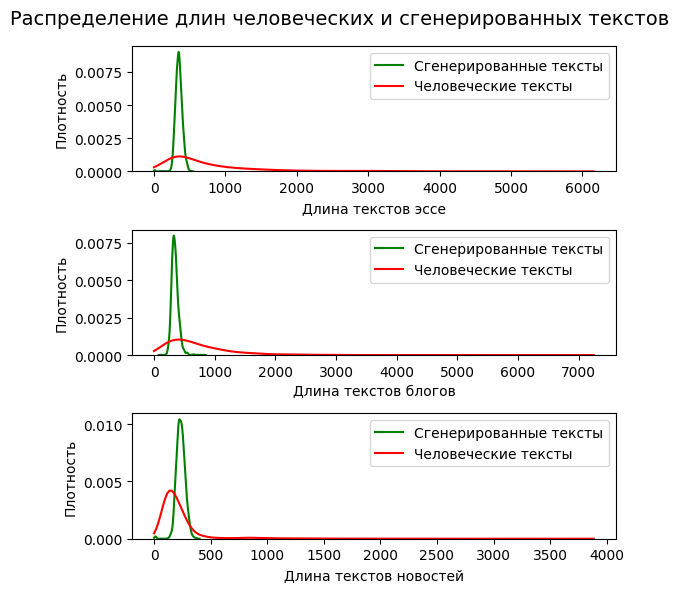

In [28]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

plt.subplot(3, 1, 1)  # Two rows, one column, second subplot
sns.kdeplot(lengths_neural_texts_essay, color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(lengths_human_texts_essay, color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Длина текстов эссе')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса SMOG', fontsize=14)

plt.subplot(3, 1, 2)  # Two rows, one column, second subplot
sns.kdeplot(lengths_neural_texts_blogs, color='green', label='Сгенерированные тексты')
sns.kdeplot(lengths_human_texts_blogs, color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Длина текстов блогов')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса LIX', fontsize=14)

plt.subplot(3, 1, 3)  # Two rows, one column, second subplot
sns.kdeplot(lengths_neural_texts_news, color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(lengths_human_texts_news, color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Длина текстов новостей')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса удобочитаемости', fontsize=14)
plt.suptitle('Распределение длин человеческих и сгенерированных текстов', fontsize=14)

plt.tight_layout()
plt.show()

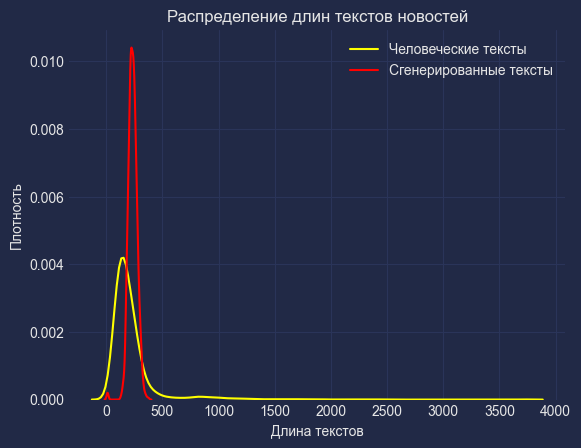

In [202]:
# Добавить clip
sns.kdeplot(lengths_human_texts, color='yellow', label='Человеческие тексты')
sns.kdeplot(lengths_neural_texts, color='red', label='Сгенерированные тексты')
plt.xlabel('Длина текстов')
plt.ylabel('Плотность')
plt.title('Распределение длин текстов новостей')
plt.legend()
plt.savefig('news_lengths_distribution')
plt.show()

In [203]:
class DatasetPreprocessor:
    def __init__(self, dataframe, source: str, target: str):
        self.df = dataframe
        self.source_column = source
        self.target_column = target

    def analyse_dataset(self):
        print(self.df.head())
        print(self.df.info())
        print(f'Shape: {self.df.shape}')
        print(f'Number of NaN: {self.df.isnull().sum()}')
        print(f'Number of duplicates: {self.df.duplicated().sum()}')

    def basic_preprocess(self):
        self.df.dropna(axis=0, inplace=True)
        self.df.drop_duplicates(f'{self.source_column}', inplace=True)
        self.df.drop_duplicates(f'{self.target_column}', inplace=True)
        self.df.reset_index(inplace=True, drop=True)
        return self.df

    def remove_garbage(self, text: str):
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\n', '', text)
        return text

In [204]:
preprocessor_equal = DatasetPreprocessor(equal_themes_df, 'human-written text', 'neural text')
processed_equal_df = preprocessor_equal.basic_preprocess()

cleaned_human_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['human-written text']]
human_equal = {'text': cleaned_human_equal, 'class': 0}
human_equal_df = pd.DataFrame(human_equal)

cleaned_neural_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['neural text']]
neural_equal = {'text': cleaned_neural_equal, 'class': 1}
neural_equal_df = pd.DataFrame(neural_equal)

equal_df = pd.concat([human_equal_df, neural_equal_df])
equal_df.head()

text  class
0  Режиссер Кирилл Серебренников из своей квартир...      0
1  С фасада Дома купца Иоффа, более известного ка...      0
2  Межрегиональный Фонд «Центр реабилитации «Дом ...      0
3  Мосгорсуд проверит законность ареста имущества...      0
4  Действующий президент РАН Владимир Фортов нахо...      0

In [205]:
preprocessor_different = DatasetPreprocessor(different_themes_df, 'human-written text', 'neural text')
processed_different_df = preprocessor_different.basic_preprocess()

cleaned_human_equal = [preprocessor_different.remove_garbage(text) for text in processed_different_df['human-written text']]
human_different = {'text': cleaned_human_equal, 'class': 0}
human_different_df = pd.DataFrame(human_different)

cleaned_neural_different = [preprocessor_different.remove_garbage(text) for text in processed_different_df['neural text']]
neural_different = {'text': cleaned_neural_different, 'class': 1}
neural_different_df = pd.DataFrame(neural_different)

different_df = pd.concat([human_different_df, neural_different_df])
different_df.head()

text  class
0  У Кремля нет позиции по поводу отдыха чиновник...      0
1  Пять человек погибли в канализационном коллект...      0
2  Скандально известный бренд областной недвижимо...      0
3  Бывший президент Грузии, экс-губернатор Одесск...      0
4  Губернатор Петербурга Георгий Полтавчено внес ...      0

In [206]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3630 non-null   object
 1   class   3630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 85.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 1801
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3604 non-null   object
 1   class   3604 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.5+ KB


(None, None)

In [207]:
long_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) >= 1000)
different_df = different_df[~long_mask_different]

small_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) <= 100)
different_df = different_df[~small_mask_different]

different_df.reset_index(inplace=True, drop=True)

long_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) >= 2000)
equal_df = equal_df[~long_mask_equal]

small_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) <= 100)
equal_df = equal_df[~small_mask_equal]

equal_df.reset_index(inplace=True, drop=True)

In [208]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3247 non-null   object
 1   class   3247 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3167 non-null   object
 1   class   3167 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.6+ KB


(None, None)

In [23]:
counter = 0
for text in equal_df.text: 
    if len(text.split(' ')) > 500: 
        counter +=1 
counter

88

## **Bigrams and trigrams**

In [29]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text.split() if token.isalpha()]
        corpus.extend(text)
    return corpus

In [132]:
def get_n_grams(corpus, n_gram_size): 
    n_grams = []
    for ind in range(len(corpus) - n_gram_size + 1):
        n_grams.append(corpus[ind:ind + n_gram_size])
    return tuple(n_grams)

In [133]:
def get_probabilities(n_grams):
    n_gram_counts = {}
    for n_gram in n_grams:
        n_gram_counts[n_gram] = n_gram_counts.get(n_gram, 0) + 1

    base_ngram_counts = {}
    for ngram, freq in n_gram_counts.items():
        base_ngram_counts[ngram[:-1]] = base_ngram_counts.get(ngram[:-1], 0) + freq

    n_gram_frequencies = {ngram: freq / base_ngram_counts[ngram[:-1]]
                                    for ngram, freq in n_gram_counts.items()}
    return n_gram_frequencies

In [135]:
human_df = equal_df[equal_df["class"] == 0]
neural_df = equal_df[equal_df["class"] == 1]

In [157]:
bigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 2))
bigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 2))

In [158]:
list(bigram_probs_neural.items())[:10]

[(('в', 'течение'), 0.004054146911289768),
 (('течение', 'нескольких'), 0.06666666666666667),
 (('нескольких', 'популярная'), 0.043478260869565216),
 (('популярная', 'культура'), 1.0),
 (('культура', 'стала'), 0.013793103448275862),
 (('стала', 'важной'), 0.01),
 (('важной', 'сферой'), 0.007874015748031496),
 (('сферой', 'в'), 0.2857142857142857),
 (('в', 'нашей'), 0.019995877138734283),
 (('нашей', 'она'), 0.03996366939146231)]

In [145]:
list(bigram_probs_human.items())[:10]

[(('данное', 'эссе'), 0.011904761904761904),
 (('эссе', 'посвящено'), 0.020833333333333332),
 (('посвящено', 'известной'), 0.058823529411764705),
 (('известной', 'модели'), 0.058823529411764705),
 (('модели', 'описанной'), 0.013513513513513514),
 (('описанной', 'им'), 0.14285714285714285),
 (('им', 'в'), 0.06601941747572816),
 (('в', 'в'), 0.011577258138468592),
 (('в', 'данной'), 0.0024835702277242857),
 (('данной', 'работе'), 0.04245283018867924)]

In [148]:
trigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 3))
trigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 3))

In [126]:
from scipy.stats import ks_2samp

In [147]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

KstestResult(statistic=0.031312792907284726, pvalue=1.2432014292485e-107, statistic_location=0.07954545454545454, statistic_sign=-1)

In [149]:
ks_2samp(list(trigram_probs_human.values()), list(trigram_probs_neural.values()))

KstestResult(statistic=0.13398908906808243, pvalue=0.0, statistic_location=0.66, statistic_sign=-1)

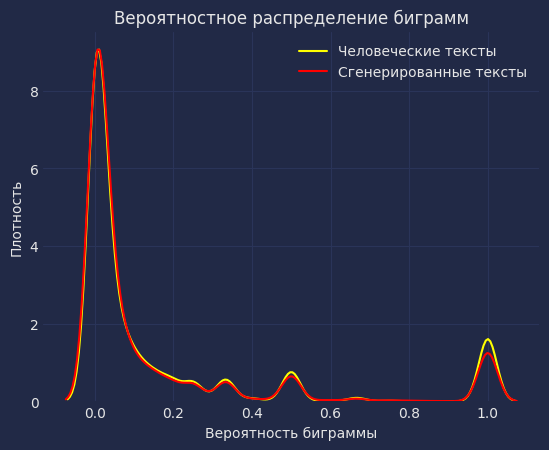

In [167]:
sns.kdeplot(list(bigram_probs_human.values()), color='yellow', label='Человеческие тексты')
sns.kdeplot(list(bigram_probs_neural.values()), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность биграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение биграмм')
plt.legend()
plt.show()

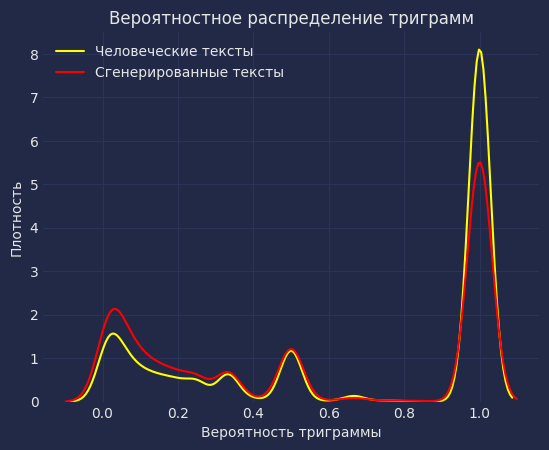

In [181]:
sns.kdeplot(np.array(list(trigram_probs_human.values())), color='yellow', label='Человеческие тексты')
sns.kdeplot(np.array(list(trigram_probs_neural.values())), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность триграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение триграмм')
plt.legend()
plt.show()

## **Letter bigrams and trigrams**

In [30]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text if token.isalpha()]
        corpus.append(text)
    return corpus

def get_ngrams_distribution(df, corpus, n_gram_size): 
    n_grams = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        current_corpus = corpus[index]
        for ind in range(len(current_corpus) - n_gram_size + 1): 
            n_grams[index].append(current_corpus[ind:ind + n_gram_size])
    return n_grams

def get_probabilities(df, n_grams_corpus):
    n_gram_counts = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        one_text_ngrams = n_grams_corpus[index]
        one_text_n_grams_count = {}
        for n_gram in one_text_ngrams: 
            one_text_n_grams_count[tuple(n_gram)] = one_text_n_grams_count.get(tuple(n_gram), 0) + 1
        
        one_text_base_ngram_counts = {}
        for ngram, freq in one_text_n_grams_count.items():
            one_text_base_ngram_counts[tuple(ngram[:-1])] = one_text_base_ngram_counts.get(tuple(ngram[:-1]), 0) + freq

        one_text_n_gram_frequencies = {tuple(ngram): freq / one_text_base_ngram_counts[tuple(ngram[:-1])]
                                    for ngram, freq in one_text_n_grams_count.items()}
        
        n_gram_counts[index] = one_text_n_gram_frequencies.values()

    return n_gram_counts

In [31]:
equal_corpus = get_word_corpus(equal_df)
different_corpus = get_word_corpus(different_df)

In [48]:
equal_bigrams = get_ngrams_distribution(equal_df, equal_corpus, 2)
different_bigrams = get_ngrams_distribution(different_df, different_corpus, 2)

In [ ]:
equal_trigrams = get_ngrams_distribution(equal_df, equal_corpus, 3)
different_trigrams = get_ngrams_distribution(different_df, different_corpus, 3)

In [56]:
equal_probabilities_bigrams = get_probabilities(equal_df, list(equal_bigrams.values()))
equal_probabilities_trigrams = get_probabilities(equal_df, list(equal_trigrams.values()))

different_probabilities_bigrams = get_probabilities(different_df, list(different_bigrams.values()))
different_probabilities_trigrams = get_probabilities(different_df, list(different_trigrams.values()))

In [ ]:
from scipy.stats import ks_2samp, entropy

In [ ]:
# entropy for bigrams 
entropy(list(bigram_probs_human.values())), entropy(list(bigram_probs_neural.values()))

In [ ]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

## **Basic statistics**

In [160]:
@dataclass
class TextStatsCollection:
    n_letters: List[int] = field(default_factory=list)
    n_syllables: List[int] = field(default_factory=list)
    n_words: List[int] = field(default_factory=list)
    n_words_per_sentence: List[float] = field(default_factory=list)
    n_simple_words: List[int] = field(default_factory=list)
    n_simple_words_per_sentence: List[float] = field(default_factory=list)
    n_monosyllable_words: List[int] = field(default_factory=list)
    n_monosyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_polysyllable_words: List[int] = field(default_factory=list)
    n_polysyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_long_words: List[int] = field(default_factory=list)
    n_long_words_per_sentence: List[float] = field(default_factory=list)
    n_complex_words: List[int] = field(default_factory=list)
    n_complex_words_per_sentence: List[float] = field(default_factory=list)
    n_unique_words_per_sentence: List[float] = field(default_factory=list)
    n_sents: List[int] = field(default_factory=list)
    n_punctuations: List[int] = field(default_factory=list)
    n_punctuations_per_sentence: List[float] = field(default_factory=list)

In [161]:
def get_statistics(df):
    stats = TextStatsCollection()
    
    for text in df.text: 
        bs = BasicStats(text)
        stats.n_letters.append(bs.n_letters / bs.n_words)
        stats.n_syllables.append(bs.n_syllables / bs.n_words)
        stats.n_words.append(bs.n_words)
        stats.n_words_per_sentence.append(bs.n_words / bs.n_sents)
        stats.n_simple_words.append(bs.n_simple_words / bs.n_words)
        stats.n_simple_words_per_sentence.append(bs.n_simple_words / bs.n_sents)
        stats.n_monosyllable_words.append(bs.n_monosyllable_words / bs.n_words)
        stats.n_monosyllable_words_per_sentence.append(bs.n_monosyllable_words / bs.n_sents)
        stats.n_polysyllable_words.append(bs.n_polysyllable_words / bs.n_words)
        stats.n_polysyllable_words_per_sentence.append(bs.n_polysyllable_words / bs.n_sents)
        stats.n_long_words.append(bs.n_long_words / bs.n_words)
        stats.n_long_words_per_sentence.append(bs.n_long_words / bs.n_sents)
        stats.n_complex_words.append(bs.n_complex_words / bs.n_words)
        stats.n_complex_words_per_sentence.append(bs.n_complex_words / bs.n_sents)
        stats.n_unique_words_per_sentence.append(bs.n_unique_words / bs.n_sents)
        stats.n_sents.append(bs.n_sents / bs.n_words)
        stats.n_punctuations.append(bs.n_punctuations / bs.n_words)
        stats.n_punctuations_per_sentence.append(bs.n_punctuations / bs.n_sents)
    
    return stats

In [162]:
statistics = get_statistics(out_df)

In [163]:
# Basic statistics for equal thematics
out_df['n_letters'] = statistics.n_letters
out_df['n_syllables'] = statistics.n_syllables
out_df['n_words'] = statistics.n_words
out_df['n_words_per_sentence'] = statistics.n_words_per_sentence
out_df['n_simple_words'] = statistics.n_simple_words
out_df['n_simple_words_per_sentence'] = statistics.n_simple_words_per_sentence
out_df['n_monosyllable_words'] = statistics.n_monosyllable_words
out_df['n_monosyllable_words_per_sentence'] = statistics.n_monosyllable_words_per_sentence
out_df['n_polysyllable_words'] = statistics.n_polysyllable_words
out_df['n_polysyllable_words_per_sentence'] = statistics.n_polysyllable_words_per_sentence
out_df['n_long_words'] = statistics.n_long_words
out_df['n_long_words_per_sentence'] = statistics.n_long_words_per_sentence
out_df['n_complex_words'] = statistics.n_complex_words
out_df['n_complex_words_per_sentence'] = statistics.n_complex_words_per_sentence
out_df['n_unique_words_per_sentence'] = statistics.n_unique_words_per_sentence
out_df['n_sents'] = statistics.n_sents
out_df['n_punctuations'] = statistics.n_punctuations
out_df['n_punctuations_per_sentence'] = statistics.n_punctuations_per_sentence

In [164]:
out_df.head()

text  n_letters  n_syllables  \
0  Президент США Джо Байден подписал документ о з...   6.126214     2.611650   
1  Организация Объединенных Наций (ООН) не облада...   6.300971     2.699029   
2  Житель США более девяти минут удерживал работа...   5.993377     2.569536   
3  Жительница Васильевского острова умерла в боль...   4.981308     2.102804   
4  По данным билайна, помимо Пушкинского и Кировс...   5.861224     2.322449   

   n_words  n_words_per_sentence  n_simple_words  n_simple_words_per_sentence  \
0      103             14.714286        0.563107                     8.285714   
1      103             14.714286        0.708738                    10.428571   
2      151             12.583333        0.695364                     8.750000   
3      107              9.727273        0.738318                     7.181818   
4      245             16.333333        0.628571                    10.266667   

   n_monosyllable_words  n_monosyllable_words_per_sentence  \
0              0.145631                           2.142857   
1              0.233010                           3.428571   
2              0.165563                           2.083333   
3              0.214953                           2.090909   
4              0.171429                           2.800000   

   n_polysyllable_words  n_polysyllable_words_per_sentence  n_long_words  \
0              0.728155                          10.714286      0.533981   
1              0.737864                          10.857143      0.563107   
2              0.754967                           9.500000      0.549669   
3              0.663551                           6.454545      0.467290   
4              0.697959                          11.400000      0.514286   

   n_long_words_per_sentence  n_complex_words  n_complex_words_per_sentence  \
0                   7.857143         0.310680                      4.571429   
1                   8.285714         0.262136                      3.857143   
2                   6.916667         0.225166                      2.833333   
3                   4.545455         0.140187                      1.363636   
4                   8.400000         0.240816                      3.933333   

   n_unique_words_per_sentence   n_sents  n_punctuations  \
0                    10.571429  0.067961        0.145631   
1                    12.000000  0.067961        0.252427   
2                    10.500000  0.079470        0.145695   
3                     8.090909  0.102804        0.308411   
4                    12.133333  0.061224        0.200000   

   n_punctuations_per_sentence  
0                     2.142857  
1                     3.714286  
2                     1.833333  
3                     3.000000  
4                     3.266667

## **Readability scores**

In [166]:
def get_readability_scores(df):
    flesch_kincaid_grade = []
    flesch_reading_easy = []
    # coleman_liau_index = []
    # smog_index = []
    # automated_readability_index = []
    # lix = []

    for index in range(len(df.text)):
        rs = ReadabilityStats(df.text.iloc[index])
        flesch_kincaid_grade.append(rs.flesch_kincaid_grade)
        flesch_reading_easy.append(rs.flesch_reading_easy)
        # coleman_liau_index.append(rs.coleman_liau_index)
        # smog_index.append(rs.smog_index)
        # automated_readability_index.append(rs.automated_readability_index)
        # lix.append(rs.lix)
    return flesch_kincaid_grade, flesch_reading_easy

In [167]:
readability_scores = get_readability_scores(out_df)

In [168]:
# Readability scores fot equal thematics
out_df['flesch_kincaid_grade'] = readability_scores[0]
out_df['flesch_reading_easy'] = readability_scores[1]
# out_df['coleman_liau_index'] = readability_scores[2]
# out_df['smog_index'] = readability_scores[3]
# out_df['automated_readability_index'] = readability_scores[4]
# out_df['lix'] = readability_scores[5]

In [169]:
out_df.head()

text  n_letters  n_syllables  \
0  Президент США Джо Байден подписал документ о з...   6.126214     2.611650   
1  Организация Объединенных Наций (ООН) не облада...   6.300971     2.699029   
2  Житель США более девяти минут удерживал работа...   5.993377     2.569536   
3  Жительница Васильевского острова умерла в боль...   4.981308     2.102804   
4  По данным билайна, помимо Пушкинского и Кировс...   5.861224     2.322449   

   n_words  n_words_per_sentence  n_simple_words  n_simple_words_per_sentence  \
0      103             14.714286        0.563107                     8.285714   
1      103             14.714286        0.708738                    10.428571   
2      151             12.583333        0.695364                     8.750000   
3      107              9.727273        0.738318                     7.181818   
4      245             16.333333        0.628571                    10.266667   

   n_monosyllable_words  n_monosyllable_words_per_sentence  \
0              0.145631                           2.142857   
1              0.233010                           3.428571   
2              0.165563                           2.083333   
3              0.214953                           2.090909   
4              0.171429                           2.800000   

   n_polysyllable_words  ...  n_long_words  n_long_words_per_sentence  \
0              0.728155  ...      0.533981                   7.857143   
1              0.737864  ...      0.563107                   8.285714   
2              0.754967  ...      0.549669                   6.916667   
3              0.663551  ...      0.467290                   4.545455   
4              0.697959  ...      0.514286                   8.400000   

   n_complex_words  n_complex_words_per_sentence  n_unique_words_per_sentence  \
0         0.310680                      4.571429                    10.571429   
1         0.262136                      3.857143                    12.000000   
2         0.225166                      2.833333                    10.500000   
3         0.140187                      1.363636                     8.090909   
4         0.240816                      3.933333                    12.133333   

    n_sents  n_punctuations  n_punctuations_per_sentence  \
0  0.067961        0.145631                     2.142857   
1  0.067961        0.252427                     3.714286   
2  0.079470        0.145695                     1.833333   
3  0.102804        0.308411                     3.000000   
4  0.061224        0.200000                     3.266667   

   flesch_kincaid_grade  flesch_reading_easy  
0              9.685049            30.746234  
1             10.322913            25.494778  
2              8.333449            36.047528  
3              3.526831            67.811041  
4              8.367211            46.022483  

[5 rows x 21 columns]

In [170]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **Lexical diversity scores**

In [171]:
def get_lexical_diversity_scores(df):
    mtld = []
    hdd = []

    for index in range(len(df.text)):
        ds = DiversityStats(df.text.iloc[index])
        mtld.append(ds.mtld)
        hdd.append(ds.hdd)
    return mtld, hdd

In [172]:
lexical_diversity= get_lexical_diversity_scores(out_df)

In [173]:
# Lexical diversity scores fot equal thematics
out_df['mtld'] = lexical_diversity[0]
out_df['hdd'] = lexical_diversity[1]

In [174]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **Repetitiveness**

In [175]:
most_frequent_words_df = pd.read_csv('most_frequent_russian_words.csv', encoding='utf-8')
most_frequent_words = most_frequent_words_df['Лемма']

In [26]:
punctuation_marks = ['.', ',', '?', '!', ';', ':', "'", '"', '(', ')', '[', ']', '{', '}', '-', '–', '—', '/', '\\', '*', '&', '%', '$', '#', '@', '+', '=', '<', '>', '|', '~', '^', '`']

def lemmatize(df):
    lemmatized_corpora = []
    mystem = Mystem()
    for text in df.text:
        lemmas = mystem.lemmatize(text)
        lemmatized_text = ''.join(lemmas)
        lemmatized_corpora.append(lemmatized_text)
    df['lemmatized_text'] = lemmatized_corpora
    return df


def get_unique_words(df):
    number_unique_words = {}
    for index in range(len(df.lemmatized_text)):
        text = df.lemmatized_text.iloc[index]
        freq_per_text = {}
        tokens = tokenize(text)
        for token in tokens:
            if token.text in punctuation_marks:
                continue
            elif token.text not in freq_per_text:
                freq_per_text[token.text] = 0
            freq_per_text[token.text] += 1
        number_unique_words[index] = len(freq_per_text.keys()) / df.n_words.iloc[index]
    return number_unique_words

def get_top_list_words(df):
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = text.split(' ')
        for word in most_frequent_words:
            if word in tokens:
                counter_dict[index] += 1 / df.n_words.iloc[index]
    return counter_dict

def get_number_of_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = tokenize(text)
        for token in tokens:
            if token.text in russian_stopwords:
                print(token.text)
                counter_dict[index] += 1 
    return counter_dict

def get_number_of_unique_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = tokenize(text)
        unique_stop_words = {}
        for token in tokens:
            if token.text in russian_stopwords: 
                if token.text not in unique_stop_words:
                    unique_stop_words[token.text] = 0
                unique_stop_words[token.text] += 1
        counter_dict[index] = unique_stop_words.keys()
    return counter_dict

In [179]:
out_df['number_of_unique_words'] = get_unique_words(out_df)
out_df['number_of_top_list_words'] = get_top_list_words(out_df)
out_df['number_of_stop_words'] = get_number_of_stop_words(out_df)
out_df['number_of_unique_stop_words'] = get_number_of_unique_stop_words(out_df)

100%|██████████| 14/14 [00:00<00:00, 2382.16it/s]


In [22]:
example_df = pd.DataFrame()
example_df['text'] = ["""В Купчино, одном из районов города, произошло несчастное происшествие, связанное с ребенком, который захлебнулся в сауне. Инцидент произошел вчера вечером в частной сауне, где семья отдыхала после рабочей недели. По предварительной информации, маленький ребенок, четырехлетний мальчик, случайно утонул в бассейне сауны, когда его родители отвернулись на несколько минут. Сразу же после обнаружения происшествия, родители немедленно вызвали медицинскую помощь. На место происшествия прибыли медики и спасатели, которые немедленно приступили к оказанию первой помощи ребенку. После проведения реанимационных мероприятий, малыш был доставлен в ближайшую больницу, где его состояние оценивают как тяжелое, но стабильное. Полиция начала расследование происшествия, чтобы выяснить обстоятельства и причины этой трагедии. Предварительно, все указывает на то, что это был несчастный случай, вызванный невнимательностью родителей. Местные власти уже привлекли внимание к проблеме безопасности в общественных местах, особенно тех, где присутствует риск для детей. Предпринимаются меры для повышения осведомленности о безопасности и контроля за детьми, чтобы избежать подобных случаев в будущем. Это трагическое событие напоминает всем нам о важности постоянного наблюдения за детьми, особенно вблизи воды или в других опасных местах. Такие происшествия можно предотвратить, если соблюдать все необходимые меры предосторожности и быть внимательными к окружающей среде."""]

In [23]:
example_df = lemmatize(example_df)

In [24]:
example_df.head()

text  \
0  В Купчино, одном из районов города, произошло ...   

                                     lemmatized_text  
0  в купчино, один из район город, происходить не...

In [27]:
get_number_of_unique_stop_words(example_df)

100%|██████████| 1/1 [00:00<00:00, 843.42it/s]


{0: dict_keys(['в', 'один', 'из', 'с', 'где', 'после', 'по', 'когда', 'его', 'на', 'же', 'и', 'к', 'быть', 'как', 'но', 'чтобы', 'этот', 'все', 'то', 'что', 'уже', 'тот', 'для', 'о', 'за', 'мы', 'или', 'другой', 'такой', 'можно', 'если'])}

In [180]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **NER**

In [181]:
class NERMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.ner = NER.load('vocab/slovnet_ner_news_v1.tar')
        self.ner.navec(navec)

    def get_ners(self):
        unique_ner = {}
        number_of_ner_per_text = {}
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            unique_ner_per_text = {}
            unique_ner_type_per_text = {}
            markup = self.ner(text)
            for span in markup.spans:
                if text[span.start:span.stop] not in unique_ner_per_text:
                    unique_ner_per_text[text[span.start:span.stop]] = 0
                unique_ner_per_text[text[span.start:span.stop]] += 1

            for span in markup.spans:
                if span.type not in unique_ner_type_per_text:
                    unique_ner_type_per_text[span.type] = 0
                unique_ner_type_per_text[span.type] += 1

            unique_ner[index] = len(unique_ner_per_text.keys()) / self.df.n_words.iloc[index] # количество уникальных текстовых неров в тексте: Миша, Маша, Саша
            number_of_ner_per_text[index] = sum(list(unique_ner_type_per_text.values())) / self.df.n_words.iloc[index]  # общее количество неров в тексте 

        return unique_ner, number_of_ner_per_text

    def get_mean_ner_per_sentence(self):
        mean_ner_per_sentence = []
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            number_of_ner = []
            sentenized_text = list(sentenize(text))
            for sentence in sentenized_text:
                sentence = sentence.text
                markup = self.ner(sentence)
                number_of_ner.append(len(markup.spans))
            mean_ner_per_sentence.append(np.mean(number_of_ner))
        return mean_ner_per_sentence # среднее количество неров в тексте из расчета на предложение

In [182]:
ner_markuper= NERMarkuper(out_df)
ners_equal = ner_markuper.get_ners()

out_df['unique_ner'] = ners_equal[0]
out_df['number_of_ner_per_text'] = ners_equal[1]
out_df['mean_ner_per_sentence'] = ner_markuper.get_mean_ner_per_sentence()

100%|██████████| 14/14 [00:00<00:00, 61.88it/s]


## **POS**

In [183]:
class POSMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.morph = Morph.load('vocab/slovnet_morph_news_v1.tar', batch_size=4)
        self.morph.navec(navec)
        self.chunks = self.preprocess()

    def preprocess(self):
        all_chunks = []
        for text in self.df.text:
            text_chunks = []
            for sent in sentenize(text):
                tokens = [_.text for _ in tokenize(sent.text)]
                text_chunks.append(tokens)
            all_chunks.append(text_chunks)
        return all_chunks

    def get_morph_stats(self): 
        number_nouns = {i: 0 for i in range(len(self.chunks))}
        number_verbs = {i: 0 for i in range(len(self.chunks))}
        number_adj = {i: 0 for i in range(len(self.chunks))}
        number_pronouns = {i: 0 for i in range(len(self.chunks))}
        number_nums = {i: 0 for i in range(len(self.chunks))}
        for i in range(len(self.chunks)): 
            chunk = self.chunks[i]
            for markup in self.morph.map(chunk): 
                for token in markup.tokens:
                    if token.pos == 'NOUN':
                        number_nouns[i] = number_nouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'VERB':
                        number_verbs[i] = number_verbs.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'ADJ':
                        number_adj[i] = number_adj.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'PROPN':
                        number_pronouns[i] = number_pronouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'NUM':
                        number_nums[i] = number_nums.get(i, 0) + 1 / self.df.n_words.iloc[i]
        return number_nouns, number_verbs, number_adj, number_pronouns, number_nums

    def get_functional_words(self):
        functional_words_count = []
        for i in range(len(self.chunks)):
            chunk = self.chunks[i]
            functional_words_per_text = 0
            for markup in self.morph.map(chunk): 
                for token in markup.tokens:
                    if token.pos == 'ADP' or token.pos == 'CCONJ' or token.pos == 'PART':
                        functional_words_per_text += 1 / self.df.n_words.iloc[i]
            functional_words_count.append(functional_words_per_text)
        return functional_words_count

In [184]:
morph_markuper = POSMarkuper(out_df)
morph_markup = morph_markuper.get_morph_stats()

out_df['number_nouns'] = morph_markup[0]
out_df['number_verbs'] = morph_markup[1]
out_df['number_adj'] = morph_markup[2]
out_df['number_pronouns'] = morph_markup[3]
out_df['number_nums'] = morph_markup[4]
out_df['number_of_func_words'] = morph_markuper.get_functional_words()

In [185]:
out_df.head()

text  n_letters  n_syllables  \
0  Президент США Джо Байден подписал документ о з...   6.126214     2.611650   
1  Организация Объединенных Наций (ООН) не облада...   6.300971     2.699029   
2  Житель США более девяти минут удерживал работа...   5.993377     2.569536   
3  Жительница Васильевского острова умерла в боль...   4.981308     2.102804   
4  По данным билайна, помимо Пушкинского и Кировс...   5.861224     2.322449   

   n_words  n_words_per_sentence  n_simple_words  n_simple_words_per_sentence  \
0      103             14.714286        0.563107                     8.285714   
1      103             14.714286        0.708738                    10.428571   
2      151             12.583333        0.695364                     8.750000   
3      107              9.727273        0.738318                     7.181818   
4      245             16.333333        0.628571                    10.266667   

   n_monosyllable_words  n_monosyllable_words_per_sentence  \
0              0.145631                           2.142857   
1              0.233010                           3.428571   
2              0.165563                           2.083333   
3              0.214953                           2.090909   
4              0.171429                           2.800000   

   n_polysyllable_words  ...  number_of_unique_stop_words  unique_ner  \
0              0.728155  ...                     0.097087    0.058252   
1              0.737864  ...                     0.203883    0.087379   
2              0.754967  ...                     0.119205    0.066225   
3              0.663551  ...                     0.186916    0.046729   
4              0.697959  ...                     0.122449    0.077551   

   number_of_ner_per_text  mean_ner_per_sentence  number_nouns  number_verbs  \
0                0.077670               1.142857      0.349515      0.145631   
1                0.106796               1.571429      0.203883      0.165049   
2                0.066225               0.833333      0.284768      0.172185   
3                0.046729               0.454545      0.308411      0.149533   
4                0.077551               1.333333      0.338776      0.118367   

   number_adj  number_pronouns  number_nums  number_of_func_words  
0    0.155340         0.077670     0.000000              0.213592  
1    0.097087         0.165049     0.009709              0.165049  
2    0.092715         0.099338     0.066225              0.119205  
3    0.093458         0.028037     0.046729              0.186916  
4    0.126531         0.036735     0.053061              0.212245  

[5 rows x 37 columns]

In [186]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **ROUGE-1, ROUGE-2, ROUGE-L and BLEU**

In [187]:
rouge = load('rouge')

def get_metric(df):
    mystem = Mystem()
    rouge_metrics = []
    rouge_1_metrics = []
    rouge_2_metrics = []
    rouge_l_metrics = []
    for index in tqdm(range(len(df.text))):
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        predictions = []
        references = []
        for i in range(len(sentences) - 1):
            predictions.append(''.join(mystem.lemmatize(sentences[i].text)[:-2]))
            references.append(''.join(mystem.lemmatize(sentences[i + 1].text)[:-2]))
        rouge_metrics = get_rouge(predictions, references)
        rouge_1_metrics.append(rouge_metrics['rouge1'])
        rouge_2_metrics.append(rouge_metrics['rouge2'])
        rouge_l_metrics.append(rouge_metrics['rougeL'])

    return rouge_1_metrics, rouge_2_metrics, rouge_l_metrics

def get_rouge(predictions, references):
    result = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.text.lower() for token in tokenize(x)])
    return result

In [188]:
out_df['rouge_1'] = metrics[0]
out_df['rouge_2'] = metrics[1]
out_df['rouge_l'] = metrics[2]

In [189]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **Parallel Structures** 

In [190]:
model = spacy.load("ru_core_news_sm")

In [191]:
def make_syntax_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.dep_ == 'punct':
                    continue
                else: 
                    sentence_with_markup.append(f'{token.pos_}_{token.dep_}')
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [192]:
import collections

import numpy as np


class Score(
    collections.namedtuple("Score", ["precision", "recall", "fmeasure"])):
  """Tuple containing precision, recall, and f-measure values."""


def fmeasure(precision, recall):
    """Computes f-measure given precision and recall values."""

    if precision + recall > 0:
        return 2 * precision * recall / (precision + recall)
    else:
        return 0.0


class CustomRougeLScorer:
  def __init__(self, min_subseq_len=2):
    self.min_subseq_len = min_subseq_len

  def calculate(self, predictions, targets, tokenization):
    """ """
    if len(predictions) != len(targets):
      raise ValueError("The lengths of predictions and targets don't match.")

    tokenized_predictions = [tokenization(prediction) for prediction in predictions]
    tokenized_targets = [tokenization(target) for target in targets]

    scores = [self.score(tokenized_predictions[i], tokenized_targets[i]) for i in range(len(tokenized_predictions))]

    # precision = np.mean([score["rougeL"][0] for score in scores])
    # recall = np.mean([score["rougeL"][1] for score in scores])
    fmeasure = np.mean([score["rougeL"][2] for score in scores])

    return fmeasure


  def score(self, target_tokens, prediction_tokens):
    """Scores LCS Rouge, focusing on contiguous subsequences longer than min_subseq_len."""
    result = {}

    lcs_length = self._contiguous_lcs_length(target_tokens, prediction_tokens)
    if lcs_length < self.min_subseq_len:
      result["rougeL"] = Score(precision=0, recall=0, fmeasure=0)
      return result

    precision = lcs_length / len(prediction_tokens)
    recall = lcs_length / len(target_tokens)
    fmeasure_result = fmeasure(precision, recall)

    result["rougeL"] = Score(precision=precision, recall=recall, fmeasure=fmeasure_result)

    return result


  def _contiguous_lcs_length(self, tokens1, tokens2):
    """Finds the length of the longest contiguous subsequence."""
    dp = [[0] * (len(tokens2) + 1) for _ in range(len(tokens1) + 1)]

    # Populate the matrix based on common, contiguous words
    longest = 0
    for i in range(1, len(tokens1) + 1):
      for j in range(1, len(tokens2) + 1):
        if tokens1[i - 1] == tokens2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1] + 1
          if dp[i][j] >= self.min_subseq_len:
            longest = max(longest, dp[i][j])
        else:
          dp[i][j] = 0  # Reset for non-matching tokens

    return longest

In [193]:
def get_parallel_structures(df): 
    rouge_scorer = CustomRougeLScorer()
    rouge = []
    for index in tqdm(range(len(df.syntax_markup))):
        predictions = []
        references = []
        text = df.syntax_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge.append(rouge_scorer.calculate(predictions, references, lambda x: x.split(' ')))
    return rouge

In [194]:
def make_morph_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.pos_ == 'PUNCT':
                    continue 
                    # sentence_with_markup.append(token.text)
                else: 
                    sentence_with_markup.append(token.pos_)
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [195]:
def get_pos_repetitiveness(df): 
    rouge_1 = []
    rouge_2 = []
    rouge_l = []
    for index in tqdm(range(len(df.morph_markup))):
        predictions = []
        references = []
        text = df.morph_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge_metrics = get_rouge(predictions, references)
        rouge_1.append(rouge_metrics['rouge1'])
        rouge_2.append(rouge_metrics['rouge2'])
        rouge_l.append(rouge_metrics['rougeL'])
    return rouge_1, rouge_2, rouge_l

In [196]:
def get_rouge_l(predictions, references):
    results = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.lower() for token in x.split(' ')])
    return np.mean(results["rougeL"])

In [197]:
out_df['syntax_markup'] = make_syntax_markup(out_df).values()

100%|██████████| 14/14 [00:00<00:00, 14.57it/s]


In [198]:
out_df['parallel_structures_level'] = get_parallel_structures(out_df)

100%|██████████| 14/14 [00:00<00:00, 3354.10it/s]


In [199]:
out_df['morph_markup'] = make_morph_markup(out_df).values()

100%|██████████| 14/14 [00:00<00:00, 14.62it/s]


In [200]:
morph_rouge_result = get_pos_repetitiveness(out_df)

100%|██████████| 14/14 [00:00<00:00, 23.62it/s]


In [201]:
out_df['morph_rouge_1'] = morph_rouge_result[0]
out_df['morph_rouge_2'] = morph_rouge_result[1]
out_df['morph_rouge_l'] = morph_rouge_result[2]

In [202]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               14 non-null     object 
 1   n_letters                          14 non-null     float64
 2   n_syllables                        14 non-null     float64
 3   n_words                            14 non-null     int64  
 4   n_words_per_sentence               14 non-null     float64
 5   n_simple_words                     14 non-null     float64
 6   n_simple_words_per_sentence        14 non-null     float64
 7   n_monosyllable_words               14 non-null     float64
 8   n_monosyllable_words_per_sentence  14 non-null     float64
 9   n_polysyllable_words               14 non-null     float64
 10  n_polysyllable_words_per_sentence  14 non-null     float64
 11  n_long_words                       14 non-null     float64
 

## **Кореференция**

In [21]:
nlp = spacy.load("ru_core_news_sm")
nlp.add_pipe("xx_coref", config={"chunk_size": 2500, "chunk_overlap": 2, "device": 0})

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
models/crosslingual-coreference/minilm/model.tar.gz: 358490KB [00:14, 25106.54KB/s]                            


Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/225M [00:00<?, ?B/s]

Some weights of the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-st

In [22]:
def get_clusters(df):
    long_texts = []
    clusters = []
    mean_cluster_length = []
    for i in tqdm(range(len(df.text))):
        text = df.text[i]
        try: 
            doc = nlp(text)
        except:
            print('Error')
            clusters.append('Error')
            mean_cluster_length.append('Error')
            continue
        clusters.append(len(doc._.coref_clusters))
        cluster_lengths = []
        for cluster in doc._.coref_clusters:
            cluster_lengths.append(len(cluster))
        mean_cluster_length.append(np.mean(cluster_lengths))
    return clusters, mean_cluster_length

In [24]:
clusters_neural, mean_cluster_length_neural = get_clusters(news_different_df)

 32%|███▏      | 1027/3167 [09:46<20:14,  1.76it/s] /opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3167/3167 [31:34<00:00,  1.67it/s]


In [25]:
# with open('coref_chains_different_news.csv', 'w', newline='') as csvfile:
#     fieldnames = ['text_id', 'num_clusters', 'mean_cluster_length']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for index in range(len(news_different_df.text)):
#         writer.writerow({
#             'text_id': index,
#             'num_clusters': f'{clusters_neural[index]}',
#             'mean_cluster_length': f'{mean_cluster_length_neural[index]}'
#         })

In [86]:
equal_directory = 'coref_chains_different_news.csv'
different_directory = 'coref_chains_equal_news.csv'

In [87]:
equal_coreference_df = pd.read_csv(equal_directory)
different_coreference_df = pd.read_csv(different_directory)

In [88]:
equal_coreference_df.head()

text_id  num_clusters  mean_cluster_length
0        0            10             3.000000
1        1             2             2.500000
2        2             7             3.857143
3        3             9             3.111111
4        4             8             3.500000

In [89]:
equal_df['num_coref_clusters'] = equal_coreference_df['num_clusters']
equal_df['mean_cluster_length'] = equal_coreference_df['mean_cluster_length']

In [90]:
different_df['num_coref_clusters'] = different_coreference_df['num_clusters']
different_df['mean_cluster_length'] = different_coreference_df['mean_cluster_length']

In [203]:
out_df['num_coref_clusters'] = [3, 7, 3, 3, 5, 3, 9, 4, 2, 4, 5, 11, 10, 5]
out_df['mean_cluster_length'] = [3.3333333333333335,
 2.857142857142857,
 3.3333333333333335,
 4.0,
 2.8,
 2.6666666666666665,
 2.888888888888889,
 7.5,
 2.0,
 3.0,
 2.2,
 4.2727272727272725,
 3.3,
 2.2]

In [92]:
equal_df.to_csv('equal_news_all_features.csv', index=False)

In [93]:
different_df.to_csv('different_news_all_features.csv', index=False)

In [148]:
equal_df_news = pd.read_csv('equal_news_all_features.csv')
equal_df_essay = pd.read_csv('equal_essay_all_features.csv')
equal_df_blogs = pd.read_csv('equal_blogs_all_features.csv')

In [97]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   n_letters                          8961 non-null   float64
 1   n_syllables                        8961 non-null   float64
 2   n_words_per_sentence               8961 non-null   float64
 3   n_simple_words                     8961 non-null   float64
 4   n_simple_words_per_sentence        8961 non-null   float64
 5   n_monosyllable_words               8961 non-null   float64
 6   n_monosyllable_words_per_sentence  8961 non-null   float64
 7   n_polysyllable_words               8961 non-null   float64
 8   n_polysyllable_words_per_sentence  8961 non-null   float64
 9   n_long_words                       8961 non-null   float64
 10  n_long_words_per_sentence          8961 non-null   float64
 11  n_complex_words                    8961 non-null   float

(None, None)

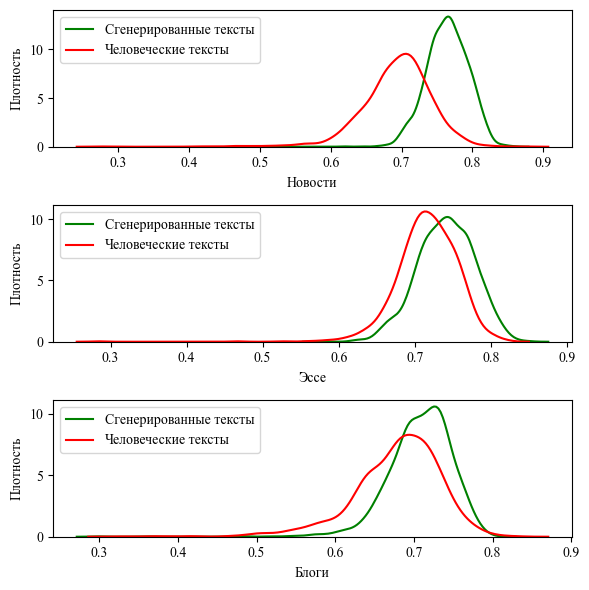

In [206]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

plt.subplot(3, 1, 1)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_news[equal_df_news["class"] == 1]["n_polysyllable_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df_news[equal_df_news["class"] == 0]["n_polysyllable_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Новости')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса SMOG', fontsize=14)

plt.subplot(3, 1, 2)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 1]["n_polysyllable_words"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 0]["n_polysyllable_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Эссе')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса LIX', fontsize=14)

plt.subplot(3, 1, 3)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 1]["n_polysyllable_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 0]["n_polysyllable_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Блоги')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса удобочитаемости', fontsize=14)

plt.tight_layout()
plt.show()

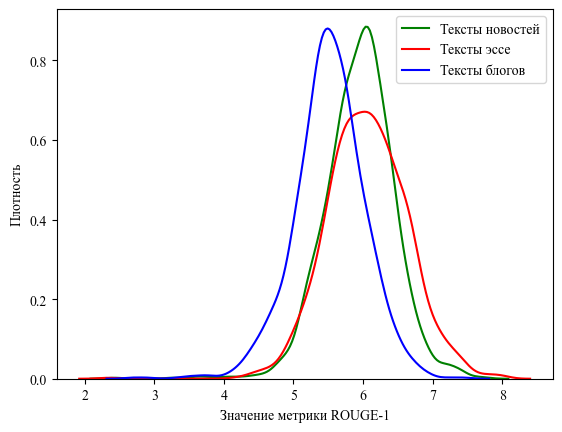

In [197]:
sns.kdeplot(equal_df_news[equal_df_news["class"] == 0]["n_letters"], color='green', label='Тексты новостей', clip=(0, None))
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 0]["n_letters"], color='red', label='Тексты эссе', clip=(0, None))
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 0]["n_letters"], color='blue', label='Тексты блогов', clip=(0, None))
plt.xlabel('Значение метрики ROUGE-1')
plt.ylabel('Плотность')
plt.legend()

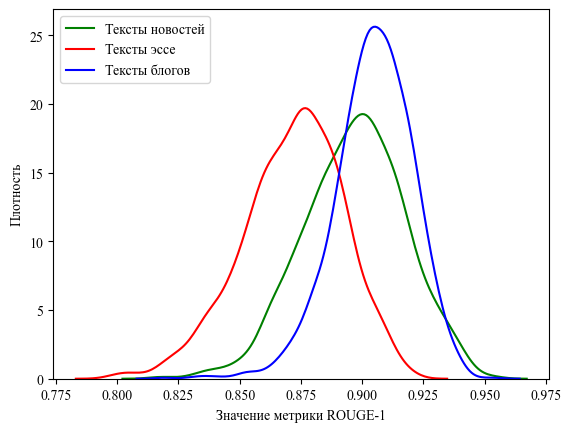

In [123]:
sns.kdeplot(equal_df_news[equal_df_news["class"] == 1]["hdd"], color='green', label='Тексты новостей', clip=(0, None))
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 1]["hdd"], color='red', label='Тексты эссе', clip=(0, None))
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 1]["hdd"], color='blue', label='Тексты блогов', clip=(0, None))
plt.xlabel('Значение метрики ROUGE-1')
plt.ylabel('Плотность')
plt.legend()

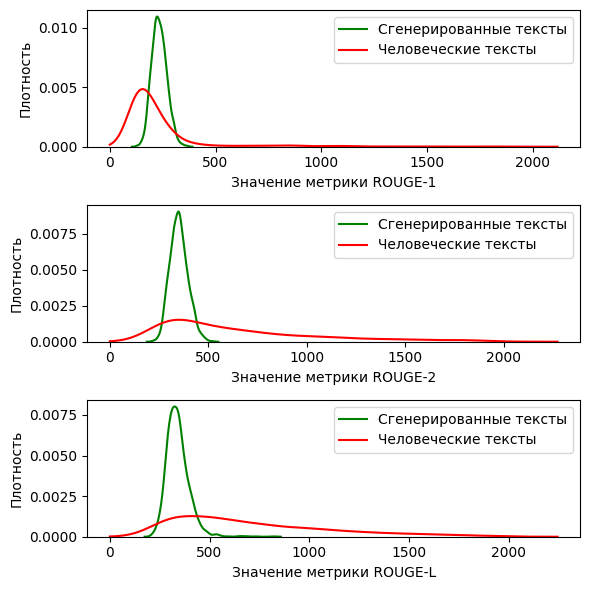

In [17]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

plt.subplot(3, 1, 1)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_news[equal_df_news["class"] == 1]["n_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df_news[equal_df_news["class"] == 0]["n_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Значение метрики ROUGE-1')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса SMOG', fontsize=14)

plt.subplot(3, 1, 2)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 1]["n_words"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df_essay[equal_df_essay["class"] == 0]["n_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Значение метрики ROUGE-2')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса LIX', fontsize=14)

plt.subplot(3, 1, 3)  # Two rows, one column, second subplot
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 1]["n_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df_blogs[equal_df_blogs["class"] == 0]["n_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Значение метрики ROUGE-L')
plt.ylabel('Плотность')
plt.legend()
# plt.title('Распределение значений индекса удобочитаемости', fontsize=14)

plt.tight_layout()
plt.show()

In [9]:
equal_df_news.info(), equal_df_essay.info(), equal_df_blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               3247 non-null   object 
 1   class                              3247 non-null   int64  
 2   n_letters                          3247 non-null   float64
 3   n_syllables                        3247 non-null   float64
 4   n_words                            3247 non-null   int64  
 5   n_words_per_sentence               3247 non-null   float64
 6   n_simple_words                     3247 non-null   float64
 7   n_simple_words_per_sentence        3247 non-null   float64
 8   n_monosyllable_words               3247 non-null   float64
 9   n_monosyllable_words_per_sentence  3247 non-null   float64
 10  n_polysyllable_words               3247 non-null   float64
 11  n_polysyllable_words_per_sentence  3247 non-null   float

(None, None, None)

In [149]:
different_df_news = pd.read_csv('different_news_all_features.csv')
different_df_essay = pd.read_csv('different_essay_all_features.csv')
different_df_blogs = pd.read_csv('different_blogs_all_features.csv')

In [150]:
different_df_news.info(), different_df_essay.info(), different_df_blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               3167 non-null   object 
 1   class                              3167 non-null   int64  
 2   n_letters                          3167 non-null   float64
 3   n_syllables                        3167 non-null   float64
 4   n_words                            3167 non-null   int64  
 5   n_words_per_sentence               3167 non-null   float64
 6   n_simple_words                     3167 non-null   float64
 7   n_simple_words_per_sentence        3167 non-null   float64
 8   n_monosyllable_words               3167 non-null   float64
 9   n_monosyllable_words_per_sentence  3167 non-null   float64
 10  n_polysyllable_words               3167 non-null   float64
 11  n_polysyllable_words_per_sentence  3167 non-null   float

(None, None, None)

In [151]:
equal_df = pd.concat([equal_df_news, equal_df_essay, equal_df_blogs])
different_df = pd.concat([different_df_news, different_df_essay, different_df_blogs])

In [108]:
np.mean(equal_df[equal_df["class"] == 1]["n_words"]), np.mean(equal_df[equal_df["class"] == 0]["n_words"])

(304.03643807574207, 519.47791952895)

In [13]:
np.mean(different_df[different_df["class"] == 1]["n_words"]), np.mean(different_df[different_df["class"] == 0]["n_words"])

(297.2466346153846, 480.48915009041593)

In [14]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

In [17]:
equal_df.num_coref_clusters.iloc[0]

0.027586206896551724

In [152]:
new_num_coref_clusters_equal = []
for i in range(len(equal_df.text)): 
    new_num_coref_clusters_equal.append(equal_df.num_coref_clusters.iloc[i] / equal_df.n_words.iloc[i])

In [153]:
equal_df['num_coref_clusters'] = new_num_coref_clusters_equal

In [154]:
new_num_coref_clusters_different = []
for i in range(len(different_df.text)): 
    new_num_coref_clusters_different.append(different_df.num_coref_clusters.iloc[i] / different_df.n_words.iloc[i])

In [155]:
different_df['num_coref_clusters'] = new_num_coref_clusters_different

In [20]:
new_num_coref_clusters_out = []
for i in range(len(out_df.text)): 
    new_num_coref_clusters_out.append(out_df.num_coref_clusters.iloc[i] / out_df.n_words.iloc[i])

NameError: name 'out_df' is not defined

In [205]:
out_df['num_coref_clusters'] = new_num_coref_clusters_out

### **Анализ признаков**

In [96]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

(None, None)

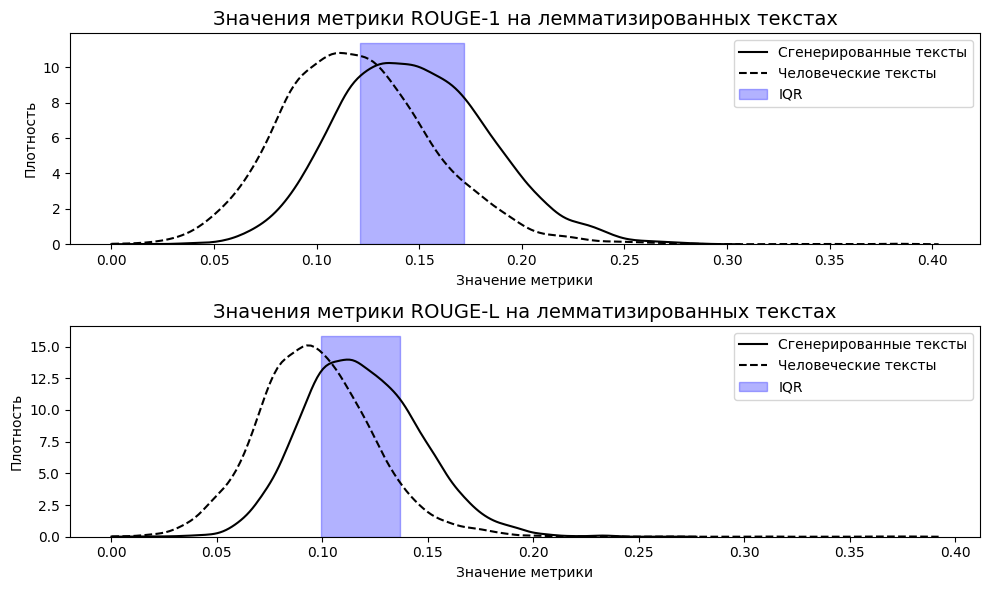

In [26]:
import numpy as np

# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_1"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_1"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 25)
q3 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 75)

# Plot IQR shading
plt.fill_betweenx(np.linspace(0, plt.ylim()[1], 100), q1, q3, color='blue', alpha=0.3, label='IQR')

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-1 на лемматизированных текстах', fontsize=14)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_l"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_l"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_l"], 25)
q3 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_l"], 75)

# Plot IQR shading
plt.fill_betweenx(np.linspace(0, plt.ylim()[1], 100), q1, q3, color='blue', alpha=0.3, label='IQR')

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-L на лемматизированных текстах', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_1"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_1"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 25)
q3 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 75)

# Plot IQR shading with non-continuous hatching
plt.fill_betweenx(np.linspace(0, plt.ylim()[1], 100), q1, q3, color='blue', alpha=0.3, label='IQR', hatch='x' * 5)

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-1 на лемматизированных текстах', fontsize=14)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_l"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_l"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_l"], 25)
q3 = np.percentile(equal_df[equal_df["class"] == 1]["rouge_l"], 75)

# Plot IQR shading with non-continuous hatching
plt.fill_betweenx(np.linspace(0, plt.ylim()[1], 100), q1, q3, color='blue', alpha=0.3, label='IQR', hatch='x' * 5)

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-L на лемматизированных текстах', fontsize=14)

plt.tight_layout()
plt.show()

In [33]:
q1_human = np.percentile(equal_df[equal_df["class"] == 0]["number_of_unique_stop_words"], 25)
q3_human = np.percentile(equal_df[equal_df["class"] == 0]["number_of_unique_stop_words"], 75)

q1_neural = np.percentile(equal_df[equal_df["class"] == 1]["number_of_unique_stop_words"], 25)
q3_neural = np.percentile(equal_df[equal_df["class"] == 1]["number_of_unique_stop_words"], 75)

In [35]:
q3_human - q1_human,  q3_neural - q1_neural

(0.0484902497905956, 0.02462478375387679)

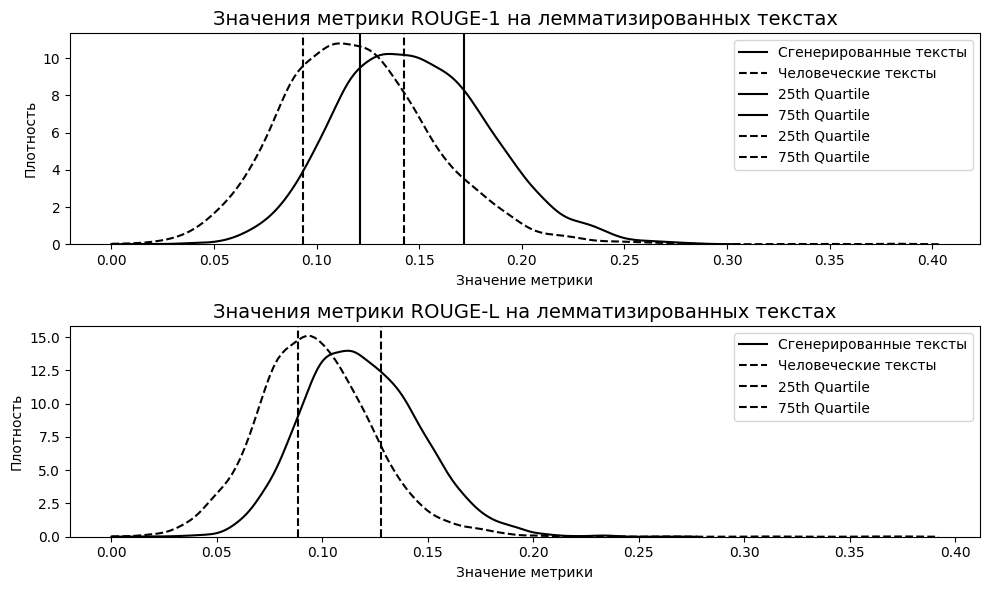

In [25]:
import numpy as np

# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_1"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_1"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1_human = np.percentile(equal_df[equal_df["class"] == 0]["rouge_1"], 25)
q3_human = np.percentile(equal_df[equal_df["class"] == 0]["rouge_1"], 75)

q1_neural = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 25)
q3_neural = np.percentile(equal_df[equal_df["class"] == 1]["rouge_1"], 75)

# Plot quartiles
plt.axvline(q1_neural, color='black', linestyle='-', label='25th Quartile')
plt.axvline(q3_neural, color='black', linestyle='-', label='75th Quartile')

plt.axvline(q1_human, color='black', linestyle='--', label='25th Quartile')
plt.axvline(q3_human, color='black', linestyle='--', label='75th Quartile')

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-1 на лемматизированных текстах', fontsize=14)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_l"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_l"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')

# Calculate quartiles
q1 = np.percentile(equal_df["rouge_l"], 25)
q3 = np.percentile(equal_df["rouge_l"], 75)

# Plot quartiles
plt.axvline(q1, color='black', linestyle='--', label='25th Quartile')
plt.axvline(q3, color='black', linestyle='--', label='75th Quartile')

plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-L на лемматизированных текстах', fontsize=14)

plt.tight_layout()
plt.show()

In [20]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

In [135]:
equal_df.iloc[1711]

text                                 В Купчино, одном из районов города, произошло ...
class                                                                                1
n_letters                                                                     6.650538
n_syllables                                                                   2.811828
n_words                                                                            186
n_words_per_sentence                                                              15.5
n_simple_words                                                                0.607527
n_simple_words_per_sentence                                                   9.416667
n_monosyllable_words                                                          0.172043
n_monosyllable_words_per_sentence                                             2.666667
n_polysyllable_words                                                          0.763441
n_polysyllable_words_per_sentence          

In [136]:
filtered_df = equal_df[(equal_df["class"] == 1) & (equal_df["number_of_unique_stop_words"] > 0.17)]
# result = filtered_df["text"]
# print(result.iloc[0])
filtered_df.text.iloc[0]

'В Купчино, одном из районов города, произошло несчастное происшествие, связанное с ребенком, который захлебнулся в сауне. Инцидент произошел вчера вечером в частной сауне, где семья отдыхала после рабочей недели. По предварительной информации, маленький ребенок, четырехлетний мальчик, случайно утонул в бассейне сауны, когда его родители отвернулись на несколько минут. Сразу же после обнаружения происшествия, родители немедленно вызвали медицинскую помощь. На место происшествия прибыли медики и спасатели, которые немедленно приступили к оказанию первой помощи ребенку. После проведения реанимационных мероприятий, малыш был доставлен в ближайшую больницу, где его состояние оценивают как тяжелое, но стабильное. Полиция начала расследование происшествия, чтобы выяснить обстоятельства и причины этой трагедии. Предварительно, все указывает на то, что это был несчастный случай, вызванный невнимательностью родителей. Местные власти уже привлекли внимание к проблеме безопасности в общественных 

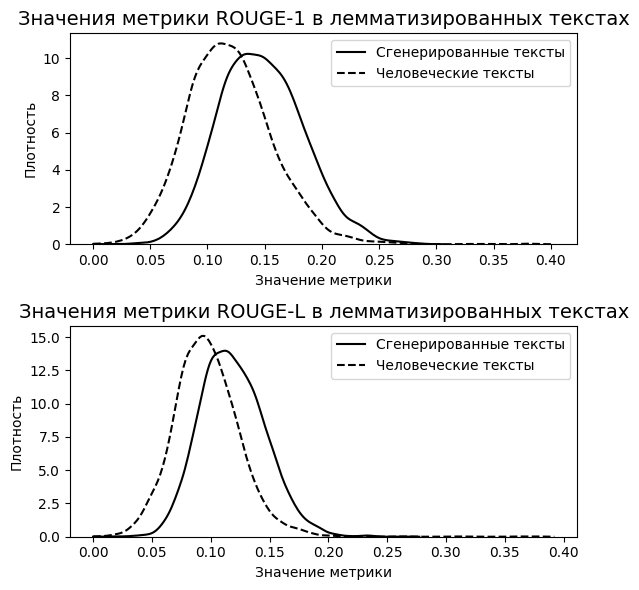

In [68]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(6, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_1"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_1"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-1 в лемматизированных текстах', fontsize=14)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_l"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_l"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Значение метрики')
plt.ylabel('Плотность')
plt.title('Значения метрики ROUGE-L в лемматизированных текстах', fontsize=14)

plt.tight_layout()
plt.show()

In [512]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_of_ner_per_text"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_of_ner_per_text"]))

ModeResult(mode=0.0, count=1359)
ModeResult(mode=0.0, count=139)


(None, None)

In [513]:
print(st.mode(equal_df[equal_df["class"] == 1]["mean_ner_per_sentence"])), print(st.mode(equal_df[equal_df["class"] == 0]["mean_ner_per_sentence"]))

ModeResult(mode=0.0, count=1162)
ModeResult(mode=0.0, count=97)


(None, None)

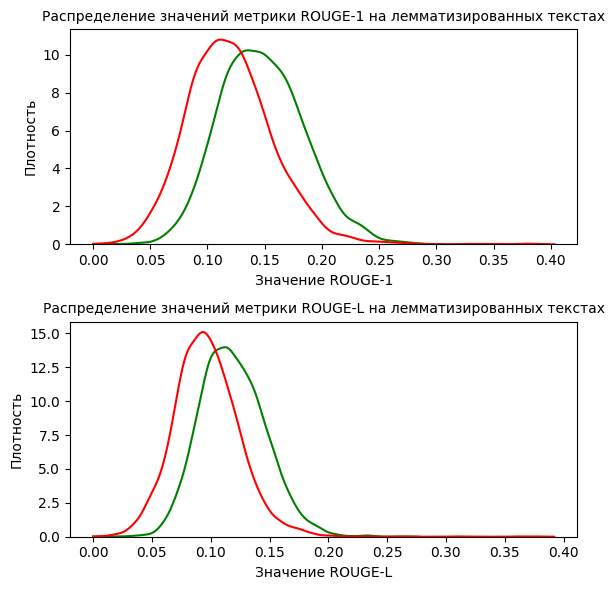

In [415]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(6, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_1"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_1"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Значение ROUGE-1')
plt.ylabel('Плотность')
plt.title('Распределение значений метрики ROUGE-1 на лемматизированных текстах', fontsize=10)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["rouge_l"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["rouge_l"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Значение ROUGE-L')
plt.ylabel('Плотность')
plt.title('Распределение значений метрики ROUGE-L на лемматизированных текстах', fontsize=10)

# plt.subplot(3, 1, 3)
# sns.kdeplot(equal_df[equal_df["class"] == 1]["number_verbs"], color='green', label='Сгенерированные тексты', clip=(0, None))
# sns.kdeplot(equal_df[equal_df["class"] == 0]["number_verbs"], color='red', label='Человеческие тексты', clip=(0, None))
# plt.xlabel('Среднее количество глаголов в предложении')
# plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

In [416]:
np.max(equal_df[equal_df["class"] == 1]["rouge_1"]), np.max(equal_df[equal_df["class"] == 0]["rouge_1"])

(0.2860019554124245, 0.3817436086342583)

In [417]:
np.mean(equal_df[equal_df["class"] == 1]["rouge_1"]), np.mean(equal_df[equal_df["class"] == 0]["rouge_1"])

(0.14767771703077412, 0.11978491311708526)

In [418]:
np.max(equal_df[equal_df["class"] == 1]["rouge_l"]), np.max(equal_df[equal_df["class"] == 0]["rouge_l"])

(0.262205531817589, 0.3761048401676951)

In [419]:
np.mean(equal_df[equal_df["class"] == 1]["rouge_l"]), np.mean(equal_df[equal_df["class"] == 0]["rouge_l"])

(0.1188565443319621, 0.09689594567330843)

In [390]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_of_ner_per_text"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_of_ner_per_text"]))

ModeResult(mode=0.0, count=1359)
ModeResult(mode=0.0, count=139)


(None, None)

In [391]:
print(st.mode(equal_df[equal_df["class"] == 1]["mean_ner_per_sentence"])), print(st.mode(equal_df[equal_df["class"] == 0]["mean_ner_per_sentence"]))

ModeResult(mode=0.0, count=1162)
ModeResult(mode=0.0, count=97)


(None, None)

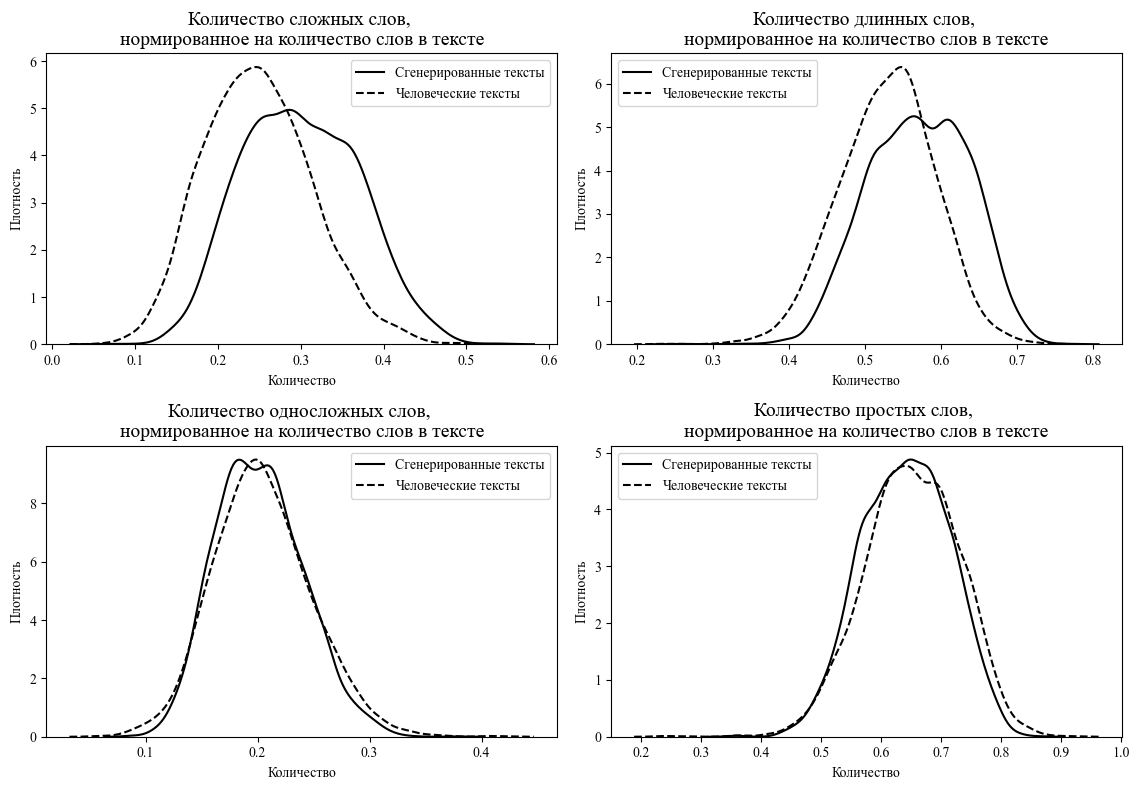

In [522]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.5, 8))  # Adjust the figure size as needed

# First column of subplots
plt.subplot(2, 2, 1)  # Three rows, two columns, first subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_complex_words"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_complex_words"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество сложных слов, \nнормированное на количество слов в тексте', fontsize=14)

plt.subplot(2, 2, 2)  # Three rows, two columns, third subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_long_words"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_long_words"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество длинных слов, \nнормированное на количество слов в тексте', fontsize=14)

plt.subplot(2, 2, 3)  # Three rows, two columns, fifth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_monosyllable_words"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_monosyllable_words"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество односложных слов, \nнормированное на количество слов в тексте', fontsize=14)

# Second column of subplots
plt.subplot(2, 2, 4)  # Three rows, two columns, second subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_simple_words"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_simple_words"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество простых слов, \nнормированное на количество слов в тексте', fontsize=14)

# plt.suptitle('Распределения классических стилометрических статистик', fontsize=16)

plt.tight_layout()
plt.show()

In [464]:
np.mean(equal_df[equal_df["class"] == 1]["n_simple_words"]), np.mean(equal_df[equal_df["class"] == 0]["n_simple_words"])

(0.640682842401271, 0.6512172551062593)

In [465]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_simple_words"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_simple_words"]))

0.6666666666666666
0.6666666666666666


(None, None)

In [466]:
np.mean(equal_df[equal_df["class"] == 1]["n_complex_words"]), np.mean(equal_df[equal_df["class"] == 0]["n_complex_words"])

(0.29984813603812027, 0.24849891980728916)

In [467]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_complex_words"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_complex_words"]))

0.3333333333333333
0.25


(None, None)

In [468]:
np.mean(equal_df[equal_df["class"] == 1]["n_letters"]), np.mean(equal_df[equal_df["class"] == 0]["n_letters"])

(6.279403222068507, 5.836900174519747)

In [470]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_letters"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_letters"]))

7.0
6.0


(None, None)

In [469]:
np.mean(equal_df[equal_df["class"] == 1]["n_sents"]), np.mean(equal_df[equal_df["class"] == 0]["n_sents"])

(0.06423704909055747, 0.06521707835411965)

In [471]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_sents"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_sents"]))

0.0625
0.0714285714285714


(None, None)

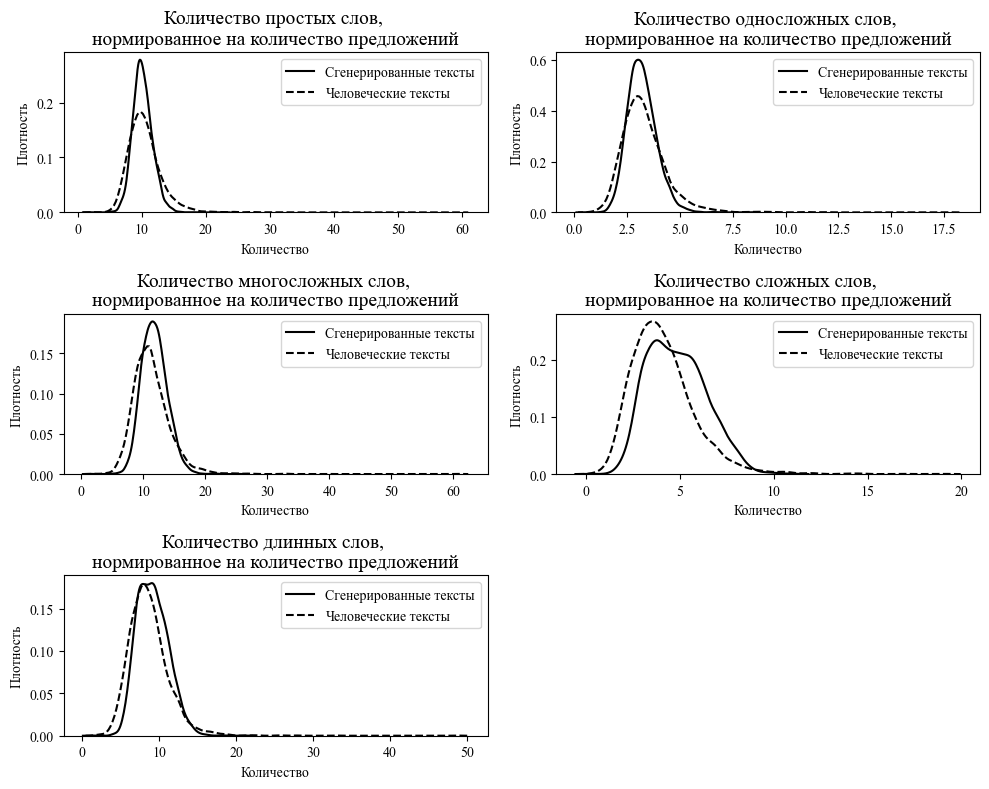

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# First column of subplots
plt.subplot(3, 2, 1)  # Three rows, two columns, first subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_simple_words_per_sentence"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_simple_words_per_sentence"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество простых слов, \nнормированное на количество предложений', fontsize=14)

plt.subplot(3, 2, 3)  # Three rows, two columns, third subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_polysyllable_words_per_sentence"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_polysyllable_words_per_sentence"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество многосложных слов, \nнормированное на количество предложений', fontsize=14)

plt.subplot(3, 2, 5)  # Three rows, two columns, fifth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_long_words_per_sentence"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_long_words_per_sentence"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество длинных слов, \nнормированное на количество предложений', fontsize=14)

# Second column of subplots
plt.subplot(3, 2, 2)  # Three rows, two columns, second subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_monosyllable_words_per_sentence"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_monosyllable_words_per_sentence"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество односложных слов, \nнормированное на количество предложений', fontsize=14)

plt.subplot(3, 2, 4)  # Three rows, two columns, fourth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_complex_words_per_sentence"], color='black', label='Сгенерированные тексты', linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_complex_words_per_sentence"], color='black', label='Человеческие тексты', linestyle='--')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.legend()
plt.title('Количество сложных слов, \nнормированное на количество предложений', fontsize=14)

plt.tight_layout()
plt.show()

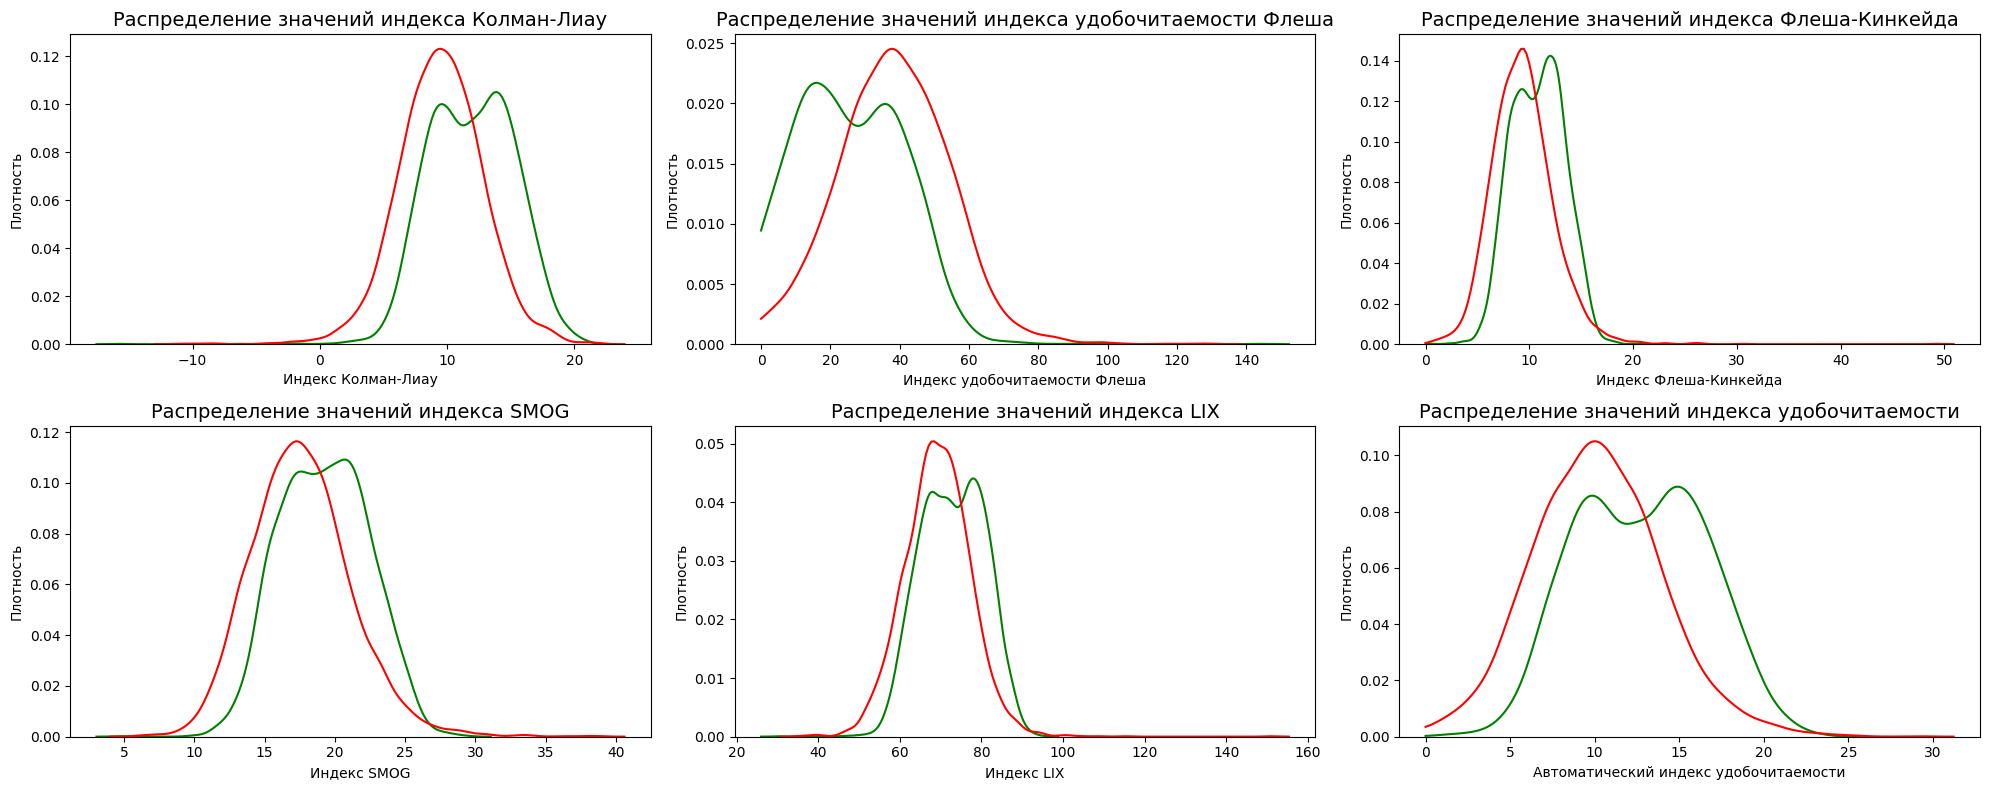

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))  # Adjust the figure size as needed

# First row of subplots
plt.subplot(2, 3, 1)  # Two rows, three columns, first subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["coleman_liau_index"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["coleman_liau_index"], color='red', label='Человеческие тексты')
plt.xlabel('Индекс Колман-Лиау')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса Колман-Лиау', fontsize=14)

plt.subplot(2, 3, 2)  # Two rows, three columns, second subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["flesch_reading_easy"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["flesch_reading_easy"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Индекс удобочитаемости Флеша')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса удобочитаемости Флеша', fontsize=14)

plt.subplot(2, 3, 3)  # Two rows, three columns, third subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["flesch_kincaid_grade"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["flesch_kincaid_grade"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Индекс Флеша-Кинкейда')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса Флеша-Кинкейда', fontsize=14)

# Second row of subplots
plt.subplot(2, 3, 4)  # Two rows, three columns, fourth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["smog_index"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["smog_index"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Индекс SMOG')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса SMOG', fontsize=14)

plt.subplot(2, 3, 5)  # Two rows, three columns, fifth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["lix"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["lix"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Индекс LIX')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса LIX', fontsize=14)

plt.subplot(2, 3, 6)  # Two rows, three columns, sixth subplot
sns.kdeplot(equal_df[equal_df["class"] == 1]["automated_readability_index"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["automated_readability_index"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Автоматический индекс удобочитаемости')
plt.ylabel('Плотность')
plt.title('Распределение значений индекса удобочитаемости', fontsize=14)

plt.tight_layout()
plt.show()

In [298]:
np.max(equal_df[equal_df["class"] == 1]["number_nums"]), np.max(equal_df[equal_df["class"] == 0]["number_nums"])

(0.1108786610878662, 0.2664194915254239)

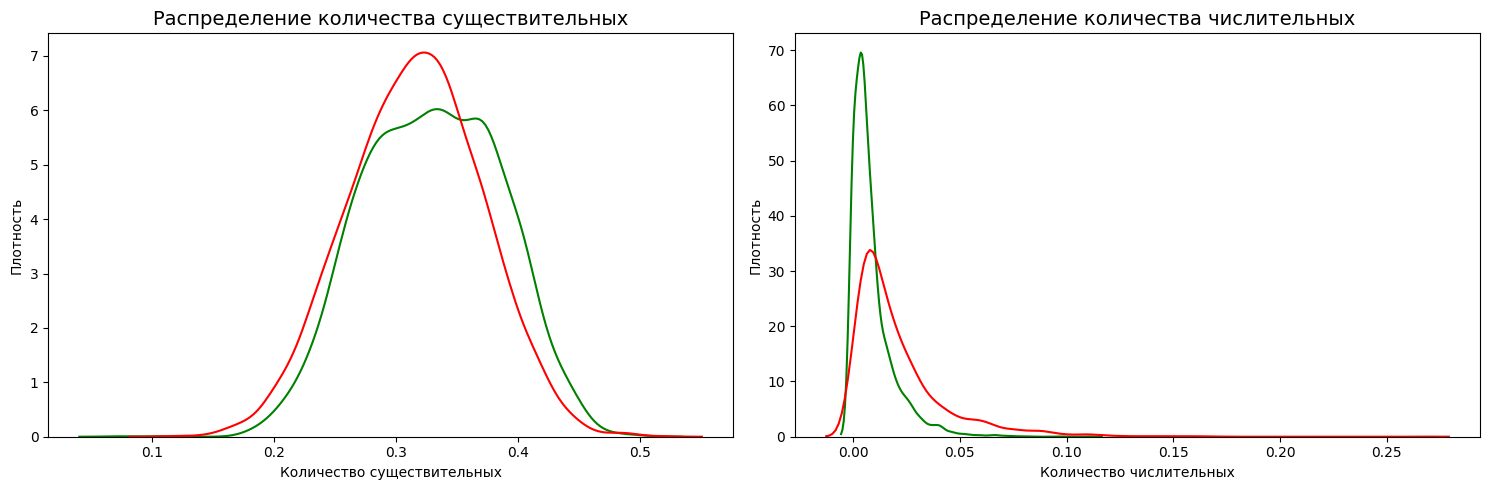

In [21]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(15, 5))

# Subplot for the equal_rf model
plt.subplot(1, 2, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_nouns"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_nouns"], color='red', label='Человеческие тексты')
plt.xlabel('Количество существительных')
plt.ylabel('Плотность')
plt.title('Распределение количества существительных', fontsize=14)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(1, 2, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_nums"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_nums"], color='red', label='Человеческие тексты')
plt.xlabel('Количество числительных')
plt.ylabel('Плотность')
plt.title('Распределение количества числительных', fontsize=14)

plt.tight_layout()
plt.show()

In [33]:
np.mean(all_df[all_df["class"] == 1]["number_nouns"]), np.mean(all_df[all_df["class"] == 0]["number_nouns"])

(96.91033720287452, 154.26264538815255)

In [34]:
np.mean(all_df[all_df["class"] == 1]["number_nums"]), np.mean(all_df[all_df["class"] == 0]["number_nums"])

(2.800663349917081, 9.7535839870165)

In [35]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_nouns"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_nouns"]))

ModeResult(mode=87, count=111)
ModeResult(mode=51, count=36)


(None, None)

In [37]:
np.max(all_df[all_df["class"] == 1]["number_nums"]), np.max(all_df[all_df["class"] == 0]["number_nums"])

(57, 503)

In [36]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_nums"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_nums"]))

ModeResult(mode=1, count=1245)
ModeResult(mode=2, count=410)


(None, None)

In [ ]:
np.mean(equal_df[equal_df["class"] == 1]["parallel_structures_level"]), np.mean(equal_df[equal_df["class"] == 0]["parallel_structures_level"])

In [441]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

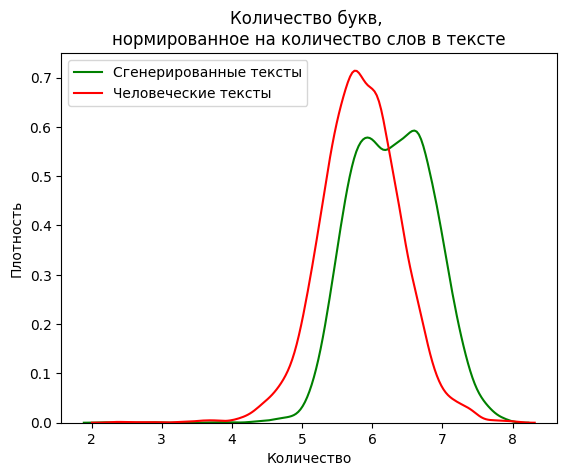

In [443]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_letters"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_letters"], color='red', label='Человеческие тексты')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество букв, \nнормированное на количество слов в тексте')
plt.legend()
plt.show()

In [451]:
np.mean(equal_df[equal_df["class"] == 1]["number_adj"]), np.mean(equal_df[equal_df["class"] == 0]["number_adj"])

(0.12877331287694646, 0.1183733705812578)

In [452]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_adj"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_adj"]))

ModeResult(mode=0.1111111111111111, count=22)
ModeResult(mode=0.1, count=14)


(None, None)

In [32]:
for i in range(len(equal_df.mean_cluster_length)): 
    if equal_df.mean_cluster_length.iloc[i] == 30 and equal_df['class'].iloc[i] == 1: 
        print(equal_df.text.iloc[i])

Моя мама – это самый важный и великий человек в моей жизни. Я бы хотел рассказать о ней и о том, как она влияет на меня и находится рядом со мной во всех сферах моей жизни. С самого детства моя мама была для меня опорой и поддержкой. Она всегда была рядом, когда мне было трудно или когда я нуждался в совете. Мама всегда находила время и возможность выслушать меня и помочь решить любую проблему. Она не только мама, но и настоящий друг, который всегда готов поддержать и принять меня таким, какой я есть. Моя мама обладает внутренней силой и мудростью, которые всегда вдохновляют меня. Она – пример того, каким человеком можно стать, если верить в себя и не останавливаться перед преградами. Моя мама всегда идет вперед и не боится столкновений с трудностями, она заставляет меня верить, что все возможно, если стараться и не сдаваться. Одно из самых впечатляющих качеств моей мамы – ее любовь и самоотдача. Она готова пожертвовать всем для меня и моих братьев и сестер. Моя мама всегда бескорыстно

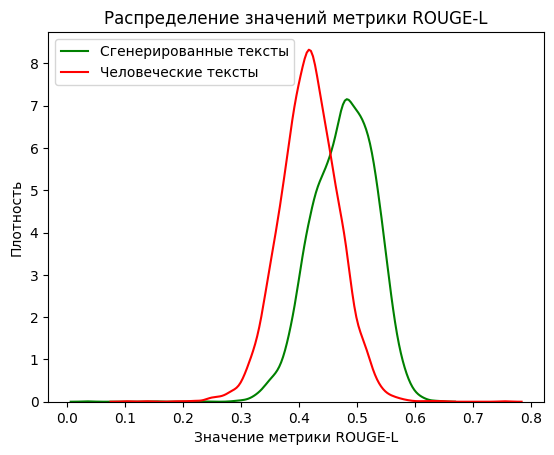

In [22]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["morph_rouge_l"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["morph_rouge_l"], color='red', label='Человеческие тексты')
plt.xlabel('Значение метрики ROUGE-L')
plt.ylabel('Плотность')
plt.title('Распределение значений метрики ROUGE-L')
plt.legend()
plt.show()

In [151]:
np.mean(equal_df[equal_df["class"] == 1]["parallel_structures_level"]), np.mean(equal_df[equal_df["class"] == 0]["parallel_structures_level"])

(0.31142987357094726, 0.25914640618400014)

In [132]:
np.max(equal_df[equal_df["class"] == 1]["mean_cluster_length"]), np.max(equal_df[equal_df["class"] == 0]["mean_cluster_length"])

(30.0, 14.846153846153848)

In [108]:
np.mean(equal_df[equal_df["class"] == 1]["mean_cluster_length"]), np.mean(equal_df[equal_df["class"] == 0]["mean_cluster_length"])

(3.774601256975566, 3.196785833186027)

In [110]:
import scipy.stats as st

In [111]:
print(st.mode(equal_df[equal_df["class"] == 1]["mean_cluster_length"])), print(st.mode(equal_df[equal_df["class"] == 0]["mean_cluster_length"]))

ModeResult(mode=2.0, count=208)
ModeResult(mode=3.0, count=205)


(None, None)

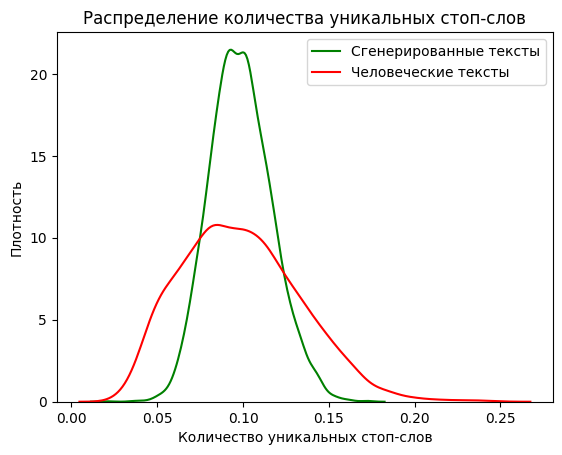

In [392]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_of_unique_stop_words"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_of_unique_stop_words"], color='red', label='Человеческие тексты')
plt.xlabel('Количество уникальных стоп-слов')
plt.ylabel('Плотность')
plt.title('Распределение количества уникальных стоп-слов')
plt.legend()
plt.show()

In [393]:
np.mean(equal_df[equal_df["class"] == 1]["number_of_unique_stop_words"]), np.mean(equal_df[equal_df["class"] == 0]["number_of_unique_stop_words"])

(0.09875041660669863, 0.09870590208584398)

In [394]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_of_unique_stop_words"])), print(st.mode(equal_df[equal_df["class"] == 0]["number_of_unique_stop_words"]))

ModeResult(mode=0.1, count=42)
ModeResult(mode=0.1111111111111111, count=17)


(None, None)

In [14]:
np.max(equal_df[equal_df["class"] == 1]["hdd"]), np.max(equal_df[equal_df["class"] == 0]["hdd"])

(0.9533558224315066, 0.9664114053360092)

In [15]:
np.min(equal_df[equal_df["class"] == 1]["hdd"]), np.min(equal_df[equal_df["class"] == 0]["hdd"])

(0.7975606842189125, 0.6566122975754087)

In [16]:
np.mean(equal_df[equal_df["class"] == 1]["hdd"]), np.mean(equal_df[equal_df["class"] == 0]["hdd"])

(0.8919051791243622, 0.9167918252541787)

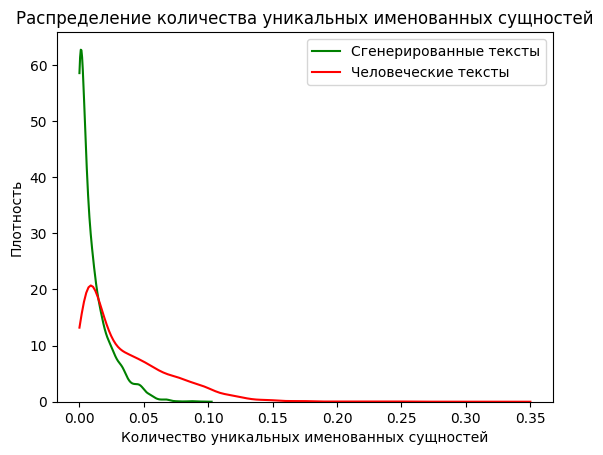

In [178]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["unique_ner"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["unique_ner"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Количество уникальных именованных сущностей')
plt.ylabel('Плотность')
plt.title('Распределение количества уникальных именованных сущностей')
plt.legend()
plt.show()

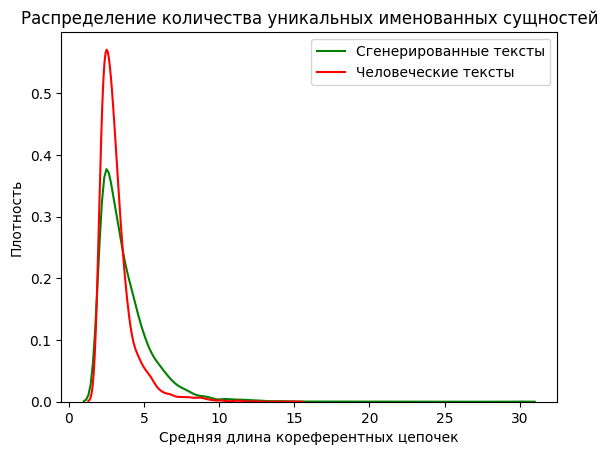

In [179]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["mean_cluster_length"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["mean_cluster_length"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Средняя длина кореферентных цепочек')
plt.ylabel('Плотность')
plt.title('Распределение количества уникальных именованных сущностей')
plt.legend()
plt.show()

In [175]:
np.mean(equal_df[equal_df["class"] == 1]["unique_ner"]), np.mean(equal_df[equal_df["class"] == 0]["unique_ner"])

(0.010981029586631188, 0.03577749518330033)

In [177]:
np.max(equal_df[equal_df["class"] == 1]["unique_ner"]), np.max(equal_df[equal_df["class"] == 0]["unique_ner"])

(0.0953271028037383, 0.3305084745762712)

In [22]:
counter = 0 

for index in range(len(equal_df.unique_ner)): 
    if equal_df.unique_ner.iloc[index] == 0 and equal_df['class'].iloc[index] == 0: 
        counter += 1
counter

139

In [176]:
print(st.mode(equal_df[equal_df["class"] == 1]["unique_ner"])), print(st.mode(equal_df[equal_df["class"] == 0]["unique_ner"]))

0.0
0.0


(None, None)

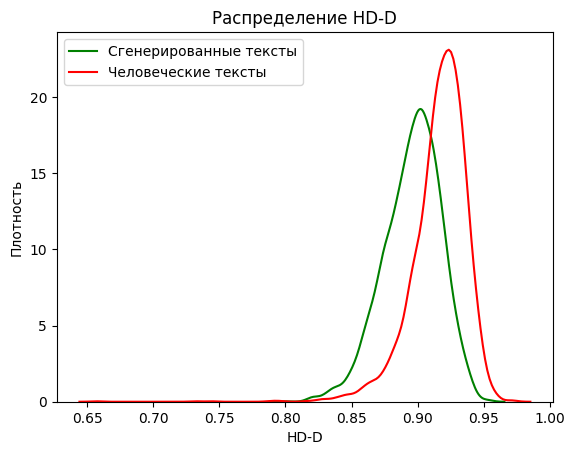

In [273]:
sns.kdeplot(different_df[different_df["class"] == 1]["hdd"], color='green', label='Сгенерированные тексты')
sns.kdeplot(different_df[different_df["class"] == 0]["hdd"], color='red', label='Человеческие тексты')
plt.xlabel('HD-D')
plt.ylabel('Плотность')
plt.title('Распределение HD-D')
plt.legend()
plt.savefig('text_lengths_distribution')
plt.show()

In [276]:
np.mean(different_df[different_df["class"] == 1]["hdd"]), np.mean(different_df[different_df["class"] == 0]["hdd"])

(0.8957435600089665, 0.9161251556137605)

In [275]:
print(st.mode(different_df[different_df["class"] == 1]["hdd"])), print(st.mode(different_df[different_df["class"] == 0]["hdd"]))

ModeResult(mode=0.8003276793033006, count=1)
ModeResult(mode=0.9043527408752634, count=2)


(None, None)

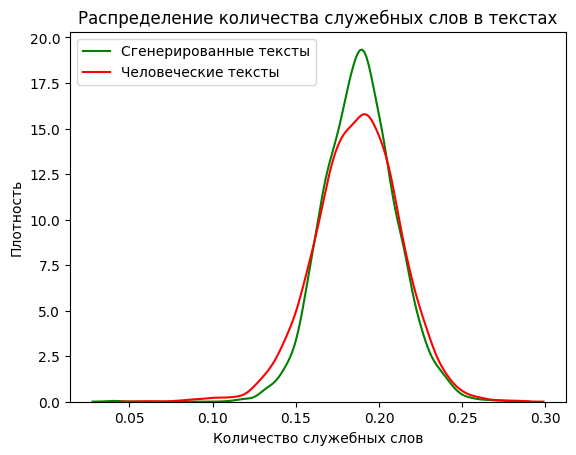

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the KDE plots with clipping
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_of_func_words"], color='green', label='Сгенерированные тексты', ax=ax, clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_of_func_words"], color='red', label='Человеческие тексты', ax=ax, clip=(0, None))

# Set labels and title
plt.xlabel('Количество служебных слов')
plt.ylabel('Плотность')
plt.title('Распределение количества служебных слов в текстах')

# Add legend
plt.legend()

# Save and show plot
plt.savefig('text_lengths_distribution')
plt.show()


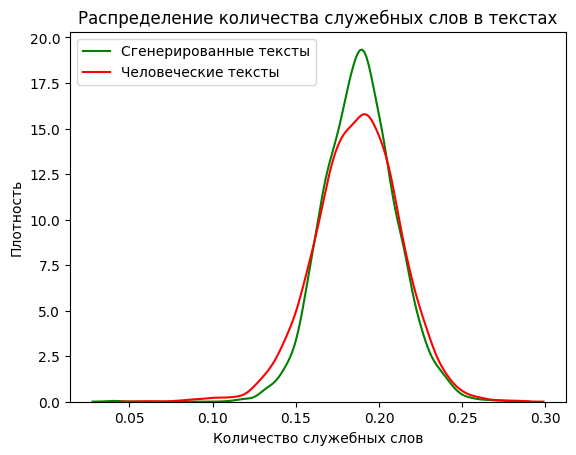

In [121]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_of_func_words"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_of_func_words"], color='red', label='Человеческие тексты')
plt.xlabel('Количество служебных слов')
plt.ylabel('Плотность')
plt.title('Распределение количества служебных слов в текстах')
plt.legend()
plt.savefig('text_lengths_distribution')
plt.show()

In [122]:
np.max(equal_df[equal_df["class"] == 1]["number_of_func_words"]), np.max(equal_df[equal_df["class"] == 0]["number_of_func_words"])

(0.2780748663101609, 0.2844827586206896)

In [123]:
np.mean(equal_df[equal_df["class"] == 1]["number_of_func_words"]), np.mean(equal_df[equal_df["class"] == 0]["number_of_func_words"])

(0.1884555829586106, 0.18704783763200203)

In [167]:
from scipy import stats as st

In [168]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_of_func_words"]))

ModeResult(mode=0.0, count=1567)


In [171]:
print(st.mode(equal_df[equal_df["class"] == 0]["number_of_func_words"]))

ModeResult(mode=0.0, count=342)


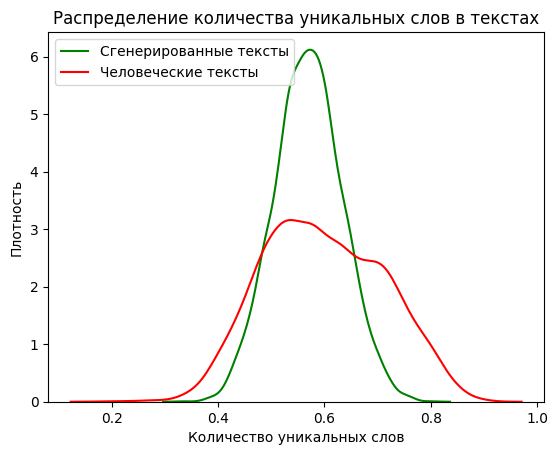

In [380]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_of_unique_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_of_unique_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Количество уникальных слов')
plt.ylabel('Плотность')
plt.title('Распределение количества уникальных слов в текстах')
plt.legend()
plt.show()

In [381]:
np.max(equal_df[equal_df["class"] == 1]["number_of_unique_words"]), np.max(equal_df[equal_df["class"] == 0]["number_of_unique_words"])

(0.8014184397163121, 0.9067796610169492)

In [382]:
np.mean(equal_df[equal_df["class"] == 1]["number_of_unique_words"]), np.mean(equal_df[equal_df["class"] == 0]["number_of_unique_words"])

(0.5696441819565013, 0.5978791873127771)

In [383]:
np.min(equal_df[equal_df["class"] == 1]["number_of_unique_words"]), np.min(equal_df[equal_df["class"] == 0]["number_of_unique_words"])

(0.3318840579710145, 0.1871657754010695)

In [384]:
print(st.mode(equal_df[equal_df["class"] == 1]["number_of_unique_words"]))

ModeResult(mode=0.6, count=22)


In [385]:
print(st.mode(equal_df[equal_df["class"] == 0]["number_of_unique_words"]))

ModeResult(mode=0.6666666666666666, count=13)


In [107]:
np.mean(equal_df[equal_df["class"] == 1]["morph_rouge_1"]), np.mean(equal_df[equal_df["class"] == 0]["morph_rouge_1"])

(0.6109181828839895, 0.527528988617726)

In [108]:
np.min(equal_df[equal_df["class"] == 1]["morph_rouge_1"]), np.min(equal_df[equal_df["class"] == 0]["morph_rouge_1"])

(0.0355187648440243, 0.1145359200842082)

In [109]:
np.max(equal_df[equal_df["class"] == 1]["morph_rouge_1"]), np.max(equal_df[equal_df["class"] == 0]["morph_rouge_1"])

(0.8101237542414013, 0.8011476759831391)

In [18]:
print(st.mode(equal_df[equal_df["class"] == 1]["morph_rouge_1"])), print(st.mode(equal_df[equal_df["class"] == 0]["morph_rouge_1"]))

ModeResult(mode=0.0355187648440243, count=1)
ModeResult(mode=0.442147736063035, count=2)


(None, None)

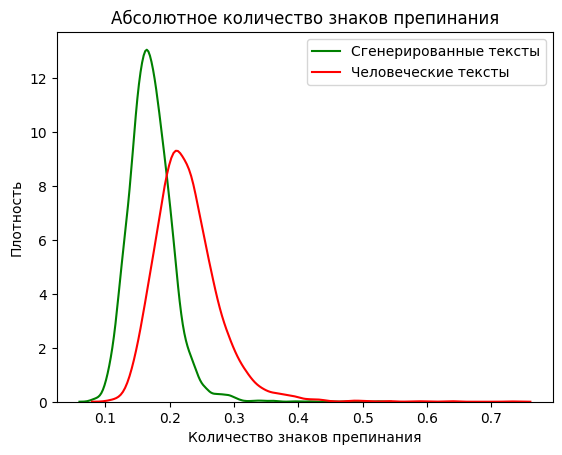

In [187]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_punctuations"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_punctuations"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Количество знаков препинания')
plt.ylabel('Плотность')
plt.title('Абсолютное количество знаков препинания')
plt.legend()
plt.show()

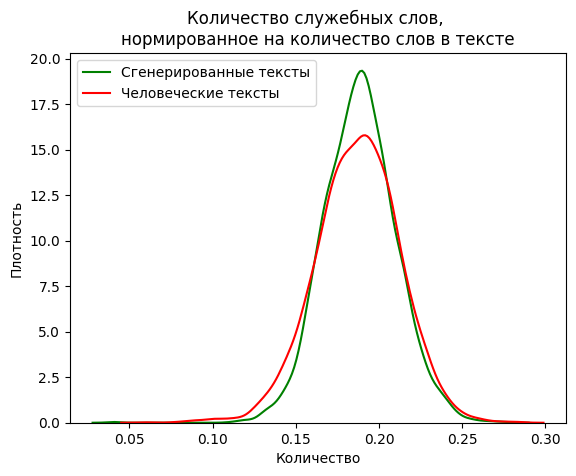

In [459]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["number_of_func_words"], color='green', label='Сгенерированные тексты', clip=(0, None))
sns.kdeplot(equal_df[equal_df["class"] == 0]["number_of_func_words"], color='red', label='Человеческие тексты', clip=(0, None))
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество служебных слов, \nнормированное на количество слов в тексте')
plt.legend()
plt.show()

In [466]:
np.mean(equal_df[equal_df["class"] == 1]["n_letters"]), np.mean(equal_df[equal_df["class"] == 0]["number_of_stop_words"])

(6.279403222068507, 5.836900174519747)

In [467]:
np.max(equal_df[equal_df["class"] == 1]["n_letters"]), np.max(equal_df[equal_df["class"] == 0]["n_letters"])

(7.909502262443439, 7.988095238095238)

In [468]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_letters"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_letters"]))

ModeResult(mode=7.0, count=12)
ModeResult(mode=6.0, count=13)


(None, None)

In [500]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

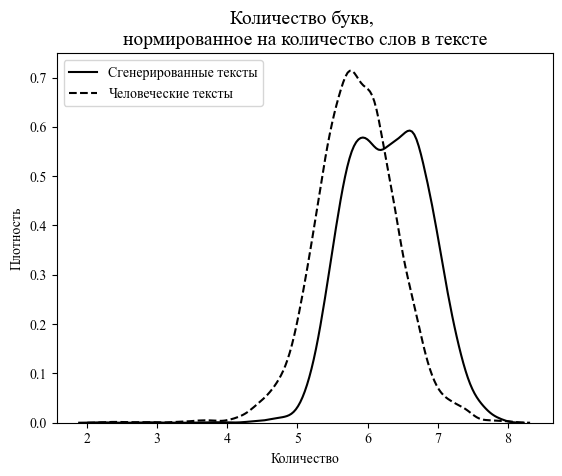

In [533]:
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_letters"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_letters"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество букв, \nнормированное на количество слов в тексте', fontsize=14)
plt.legend()
plt.show()

In [526]:
np.mean(equal_df[equal_df["class"] == 1]["flesch_kincaid_grade"]), np.mean(equal_df[equal_df["class"] == 0]["flesch_kincaid_grade"])

(10.841573334397765, 9.370512215376493)

In [527]:
np.median(equal_df[equal_df["class"] == 1]["flesch_kincaid_grade"]), np.median(equal_df[equal_df["class"] == 0]["flesch_kincaid_grade"])

(10.919598312236284, 9.227511199155806)

In [528]:
print(st.mode(equal_df[equal_df["class"] == 1]["flesch_kincaid_grade"])), print(st.mode(equal_df[equal_df["class"] == 0]["flesch_kincaid_grade"]))

ModeResult(mode=7.421006493506496, count=2)
ModeResult(mode=7.434168122694619, count=2)


(None, None)

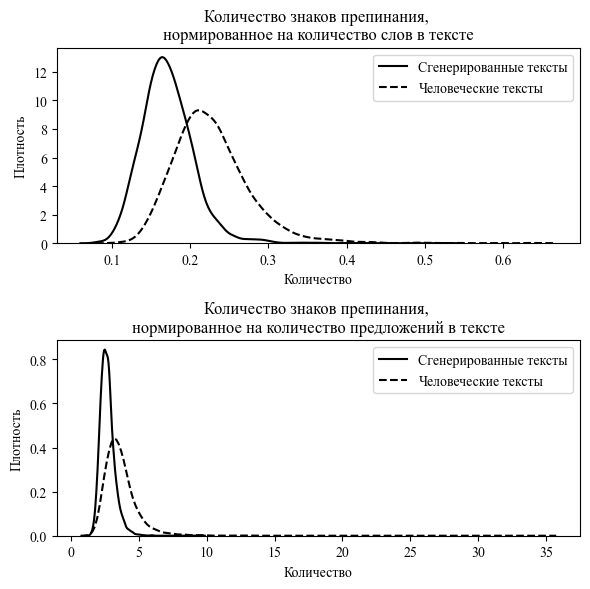

In [69]:
# First subplot for the top 10 important features with equal_rf
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(6, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_punctuations"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_punctuations"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество знаков препинания, \nнормированное на количество слов в тексте', fontsize=12)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["n_punctuations_per_sentence"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["n_punctuations_per_sentence"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество знаков препинания, \nнормированное на количество предложений в тексте', fontsize=12)

plt.tight_layout()
plt.show()

In [482]:
np.max(equal_df[equal_df["class"] == 1]["n_punctuations_per_sentence"]), np.max(equal_df[equal_df["class"] == 0]["n_punctuations_per_sentence"])

(9.571428571428571, 35.0)

In [485]:
np.mean(equal_df[equal_df["class"] == 1]["n_punctuations"]), np.mean(equal_df[equal_df["class"] == 0]["n_punctuations"])

(0.17120032777741853, 0.22722462232275017)

In [486]:
print(st.mode(equal_df[equal_df["class"] == 1]["n_punctuations"])), print(st.mode(equal_df[equal_df["class"] == 0]["n_punctuations"]))

ModeResult(mode=0.1666666666666666, count=50)
ModeResult(mode=0.2, count=21)


(None, None)

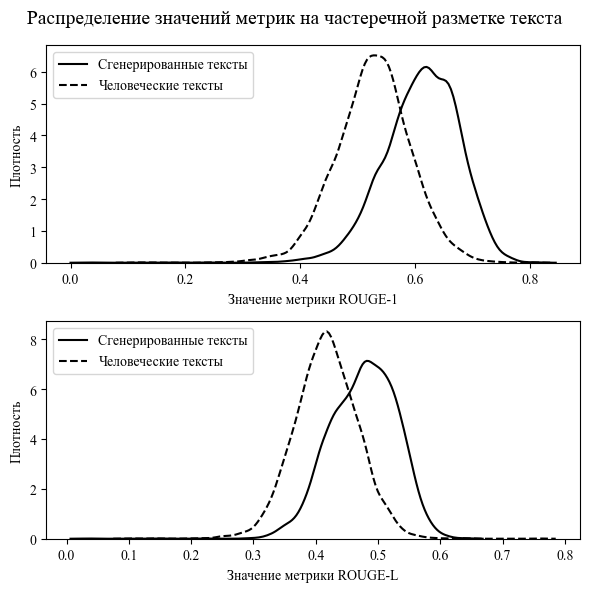

In [489]:
# First subplot for the top 10 important features with equal_rf
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(6, 6))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
sns.kdeplot(equal_df[equal_df["class"] == 1]["morph_rouge_1"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["morph_rouge_1"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Значение метрики ROUGE-1')
plt.ylabel('Плотность')
# plt.title('Распределение количества знаков препинания на количество слов', fontsize=10)

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
sns.kdeplot(equal_df[equal_df["class"] == 1]["morph_rouge_l"], color='black', label='Сгенерированные тексты', clip=(0, None), linestyle='-')
sns.kdeplot(equal_df[equal_df["class"] == 0]["morph_rouge_l"], color='black', label='Человеческие тексты', clip=(0, None), linestyle='--')
plt.legend()
plt.xlabel('Значение метрики ROUGE-L')
plt.ylabel('Плотность')
# plt.title('Распределение количества знаков препинания на предложение', fontsize=10)
plt.suptitle('Распределение значений метрик на частеречной разметке текста', fontsize=14)

plt.tight_layout()
plt.show()

In [375]:
np.mean(equal_df[equal_df["class"] == 1]["morph_rouge_l"]), np.mean(equal_df[equal_df["class"] == 0]["morph_rouge_l"])

(0.47618599616990775, 0.4166558189577487)

In [378]:
np.max(equal_df[equal_df["class"] == 1]["morph_rouge_l"]), np.max(equal_df[equal_df["class"] == 0]["morph_rouge_l"])

(0.6388596305392767, 0.7561548487115237)

In [379]:
np.max(equal_df[equal_df["class"] == 1]["morph_rouge_1"]), np.max(equal_df[equal_df["class"] == 0]["morph_rouge_1"])

(0.8095693765585407, 0.7992597352849558)

In [377]:
print(st.mode(equal_df[equal_df["class"] == 1]["morph_rouge_1"])), print(st.mode(equal_df[equal_df["class"] == 0]["morph_rouge_1"]))

ModeResult(mode=0.0344506608347438, count=1)
ModeResult(mode=0.4448236362228925, count=2)


(None, None)

In [376]:
print(st.mode(equal_df[equal_df["class"] == 1]["morph_rouge_l"])), print(st.mode(equal_df[equal_df["class"] == 0]["morph_rouge_l"]))

ModeResult(mode=0.0353652691022933, count=1)
ModeResult(mode=0.3379624803754781, count=2)


(None, None)

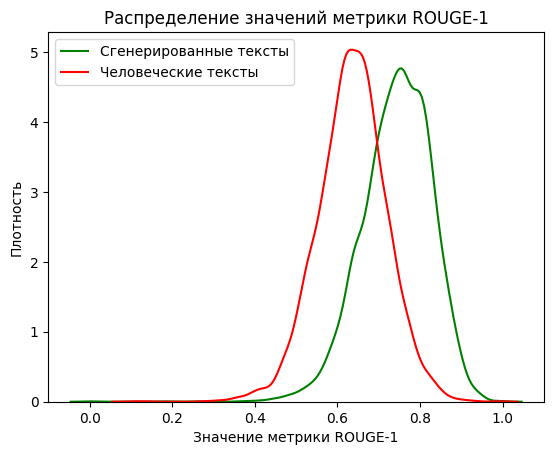

In [182]:
sns.kdeplot(equal_df_scaled[equal_df_scaled["class"] == 1]["morph_rouge_1"], color='green', label='Сгенерированные тексты')
sns.kdeplot(equal_df_scaled[equal_df_scaled["class"] == 0]["morph_rouge_1"], color='red', label='Человеческие тексты')
plt.xlabel('Значение метрики ROUGE-1')
plt.ylabel('Плотность')
plt.title('Распределение значений метрики ROUGE-1')
plt.legend()
plt.show()

## **Normalization**

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [157]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 3004
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               8961 non-null   object 
 1   class                              8961 non-null   int64  
 2   n_letters                          8961 non-null   float64
 3   n_syllables                        8961 non-null   float64
 4   n_words                            8961 non-null   int64  
 5   n_words_per_sentence               8961 non-null   float64
 6   n_simple_words                     8961 non-null   float64
 7   n_simple_words_per_sentence        8961 non-null   float64
 8   n_monosyllable_words               8961 non-null   float64
 9   n_monosyllable_words_per_sentence  8961 non-null   float64
 10  n_polysyllable_words               8961 non-null   float64
 11  n_polysyllable_words_per_sentence  8961 non-null   float

In [158]:
equal_df.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words', 'mean_cluster_length'], axis=1, inplace=True)
equal_df.reset_index(drop=True, inplace=True)

In [159]:
different_df.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words', 'mean_cluster_length'], axis=1, inplace=True)
different_df.reset_index(drop=True, inplace=True)

In [208]:
out_df.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
out_df.reset_index(drop=True, inplace=True)

In [160]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   class                              8961 non-null   int64  
 1   n_letters                          8961 non-null   float64
 2   n_syllables                        8961 non-null   float64
 3   n_words_per_sentence               8961 non-null   float64
 4   n_simple_words                     8961 non-null   float64
 5   n_simple_words_per_sentence        8961 non-null   float64
 6   n_monosyllable_words               8961 non-null   float64
 7   n_monosyllable_words_per_sentence  8961 non-null   float64
 8   n_polysyllable_words               8961 non-null   float64
 9   n_polysyllable_words_per_sentence  8961 non-null   float64
 10  n_long_words                       8961 non-null   float64
 11  n_long_words_per_sentence          8961 non-null   float

(None, None)

In [161]:
class_equal = equal_df['class']
class_different = different_df['class']

In [162]:
equal_df.drop(['class'], axis=1, inplace=True)
equal_df.reset_index(drop=True, inplace=True)

In [163]:
different_df.drop(['class'], axis=1, inplace=True)
different_df.reset_index(drop=True, inplace=True)

In [164]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   n_letters                          8961 non-null   float64
 1   n_syllables                        8961 non-null   float64
 2   n_words_per_sentence               8961 non-null   float64
 3   n_simple_words                     8961 non-null   float64
 4   n_simple_words_per_sentence        8961 non-null   float64
 5   n_monosyllable_words               8961 non-null   float64
 6   n_monosyllable_words_per_sentence  8961 non-null   float64
 7   n_polysyllable_words               8961 non-null   float64
 8   n_polysyllable_words_per_sentence  8961 non-null   float64
 9   n_long_words                       8961 non-null   float64
 10  n_long_words_per_sentence          8961 non-null   float64
 11  n_complex_words                    8961 non-null   float

(None, None)

In [165]:
X_train_equal, X_test_equal, y_train_equal, y_test_equal = train_test_split(equal_df, class_equal, test_size = 0.2, shuffle=True, stratify=class_equal)
X_train_equal, X_val_equal, y_train_equal, y_val_equal = train_test_split(X_train_equal, y_train_equal, test_size = 0.25, shuffle=True, stratify=y_train_equal)

In [166]:
X_train_different, X_test_different, y_train_different, y_test_different = train_test_split(different_df, class_different, test_size = 0.2, shuffle=True, stratify=class_different)
X_train_different, X_val_different, y_train_different, y_val_different = train_test_split(X_train_different, y_train_different, test_size = 0.25, shuffle=True, stratify=y_train_different)

In [167]:
y_train_different.value_counts()

1    2496
0    1990
Name: class, dtype: int64

In [168]:
X_train_equal.reset_index(inplace=True, drop=True)
X_test_equal.reset_index(inplace=True, drop=True)
X_val_equal.reset_index(inplace=True, drop=True)

y_train_equal.reset_index(inplace=True, drop=True)
y_test_equal.reset_index(inplace=True, drop=True)
y_val_equal.reset_index(inplace=True, drop=True)

In [169]:
X_train_different.reset_index(inplace=True, drop=True)
X_test_different.reset_index(inplace=True, drop=True)
X_val_different.reset_index(inplace=True, drop=True)

y_train_different.reset_index(inplace=True, drop=True)
y_test_different.reset_index(inplace=True, drop=True)
y_val_different.reset_index(inplace=True, drop=True)

In [170]:
scaler_train_equal = StandardScaler()
scaler_test_equal = StandardScaler()
scaler_val_equal = StandardScaler()

scaler_train_different = StandardScaler()
scaler_test_different = StandardScaler()
scaler_val_different = StandardScaler()

In [209]:
out_scaler = StandardScaler()

In [171]:
X_train_equal_scaled = pd.DataFrame(scaler_train_equal.fit_transform(X_train_equal), columns=X_train_equal.columns)
X_val_equal_scaled = pd.DataFrame(scaler_val_equal.fit_transform(X_val_equal), columns=X_val_equal.columns)
X_test_equal_scaled = pd.DataFrame(scaler_test_equal.fit_transform(X_test_equal), columns=X_test_equal.columns)

In [172]:
X_train_different_scaled = pd.DataFrame(scaler_train_different.fit_transform(X_train_different), columns=X_train_different.columns)
X_val_different_scaled = pd.DataFrame(scaler_val_different.fit_transform(X_val_different), columns=X_val_different.columns)
X_test_different_scaled = pd.DataFrame(scaler_test_different.fit_transform(X_test_different), columns=X_test_different.columns)

In [210]:
out_df_scaled = pd.DataFrame(out_scaler.fit_transform(out_df), columns=out_df.columns)

## **Models**

In [173]:
%pip install catboost==1.2
%pip install xgboost

  Using cached catboost-1.2-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached catboost-1.2-cp311-cp311-macosx_11_0_universal2.whl (25.6 MB)
  Attempting uninstall: catboost
    Found existing installation: catboost 1.2.1
    Uninstalling catboost-1.2.1:
      Successfully uninstalled catboost-1.2.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [174]:
import shap
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## **Random Forest**

### **Equal**

In [175]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [176]:
rf_equal = RandomForestClassifier(random_state=42)

grid_search_equal = GridSearchCV(estimator=rf_equal, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [177]:
best_params_equal = grid_search_equal.best_params_
best_score_equal = grid_search_equal.best_score_

print(f'These are the best parameters: {best_params_equal}')
print(f'This is the best score: {best_score_equal}')

These are the best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
This is the best score: 0.9347657811601822


In [178]:
best_equal_rf = RandomForestClassifier(**best_params_equal, random_state=42)
best_equal_rf.fit(X_train_equal_scaled, y_train_equal)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [179]:
y_pred_equal = best_equal_rf.predict(X_test_equal_scaled)
print("Classification Report:")
print(classification_report(y_test_equal, y_pred_equal))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       816
           1       0.95      0.93      0.94       977

    accuracy                           0.93      1793
   macro avg       0.93      0.93      0.93      1793
weighted avg       0.93      0.93      0.93      1793



In [180]:
preds_rf = best_equal_rf.predict(out_df_scaled)
preds_rf

NameError: name 'out_df_scaled' is not defined

In [181]:
columns_correspondence = {
    'n_letters': 'количество букв', 
    'n_syllables': "количество слогов",
    'n_words_per_sentence': "количество слов в предложении",
    'n_simple_words': "количество простых слов", 
    'n_simple_words_per_sentence': "количество простых слов в предложении", 
    'n_monosyllable_words': "количество односложных слов",
    'n_monosyllable_words_per_sentence': "количество односложных слов в предложении", 
    'n_polysyllable_words': "количество многосложных слов",
    'n_polysyllable_words_per_sentence': "количество многосложных слов в предложении", 
    'n_long_words': "количество длинных слов",
    'n_long_words_per_sentence': "количество длинных слов в предложении", 
    'n_complex_words': "количество сложных слов",
    'n_complex_words_per_sentence': "количество сложных слов в предложении", 
    'n_unique_words_per_sentence': "количество уникальных слов в предложении", 
    'n_sents': "количество предложений", 
    'n_punctuations': "количество знаков препинания",
    'n_punctuations_per_sentence': "количество знаков препинания в предложении", 
    'flesch_kincaid_grade': "индекс Флеша-Кинкейда",
    'flesch_reading_easy': "индекс удобочитаемости Флеша", 
    'mtld': "MTLD",
    'hdd': "HD-D",
    'number_of_unique_words': "количество уникальных слов", 
    'number_of_top_list_words': "количество наиболее частотных лемм",
    'number_of_stop_words': "количество стоп-слов", 
    'number_of_unique_stop_words': "количество уникальных стоп-слов", 
    'unique_ner': "количество уникальных именованных сущностей", 
    'number_of_ner_per_text': "количество именованных сущностей в тексте",
    'mean_ner_per_sentence': "среднее количество именованных сущностей в предложении", 
    'number_nouns': "количество существительных", 
    'number_verbs': "количество глаголов", 
    'number_adj': "количество прилагательных",
    'number_pronouns': "количество местоимений", 
    'number_nums': "количество числительных", 
    'number_of_func_words': "количество служебных слов", 
    'rouge_1': "ROUGE-1",
    'rouge_2': "ROUGE-2", 
    'rouge_l': "ROUGE-L", 
    'parallel_structures_level': "степень сходства синтаксической структуры", 
    'morph_rouge_1': "POS ROUGE-1",
    'morph_rouge_2': "POS ROUGE-2", 
    'morph_rouge_l': "POS ROUGE-L", 
    'num_coref_clusters': "количество кореферентных цепочек"
    }

In [182]:
len(columns_correspondence)

42

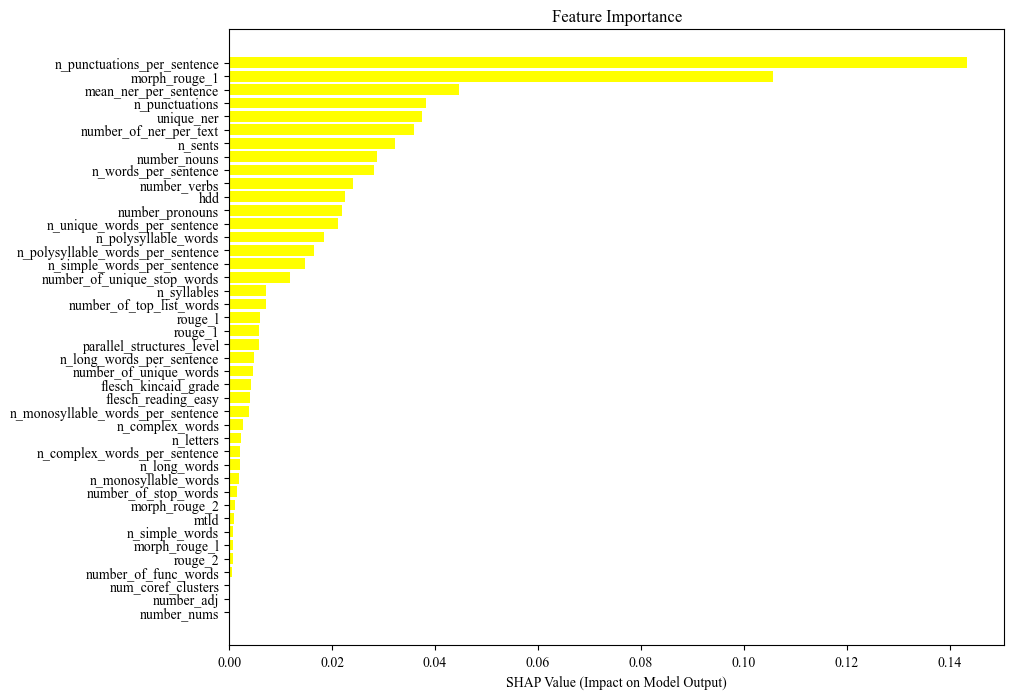

In [183]:
explainer_rf_equal = shap.Explainer(best_equal_rf)
shap_values_rf_equal = explainer_rf_equal.shap_values(X_test_equal_scaled)

importance_rf_equal = pd.Series(np.abs(shap_values_rf_equal[0]).mean(axis=1), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_rf_equal.index, importance_rf_equal.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

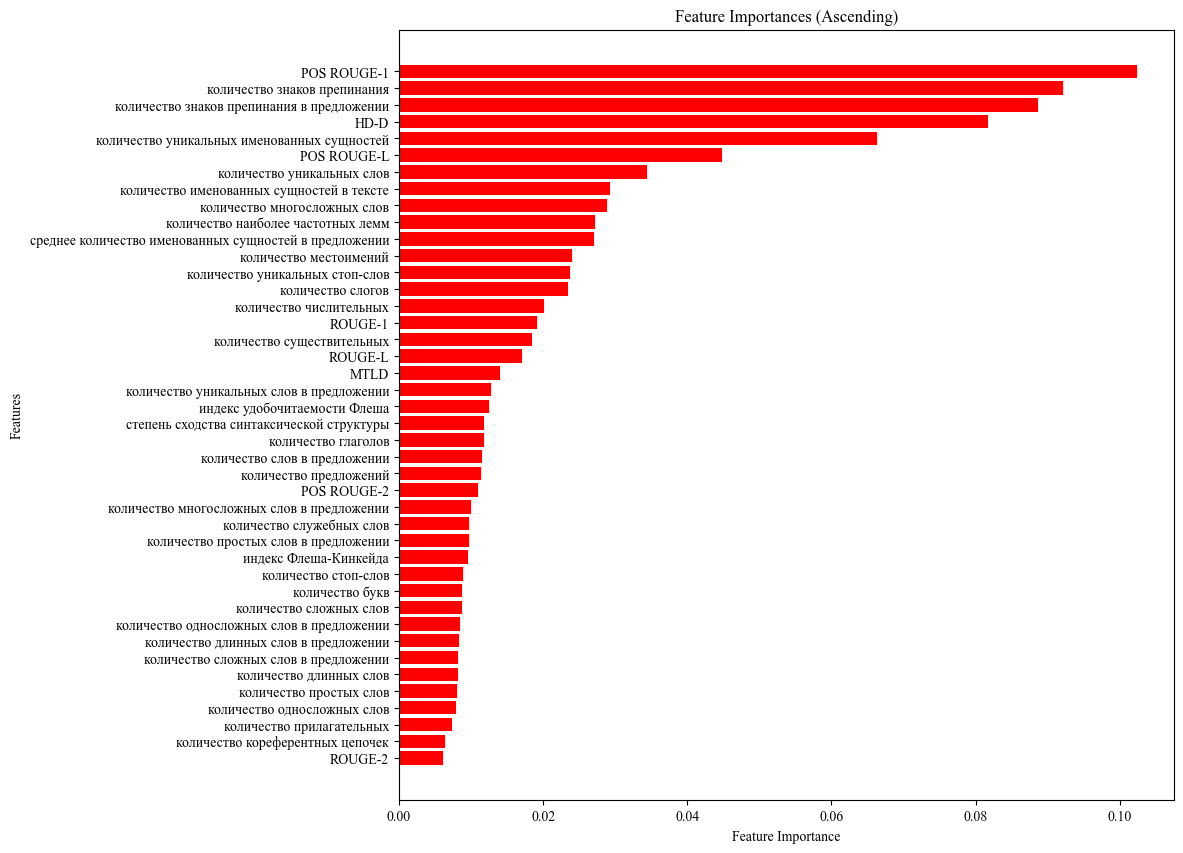

In [184]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

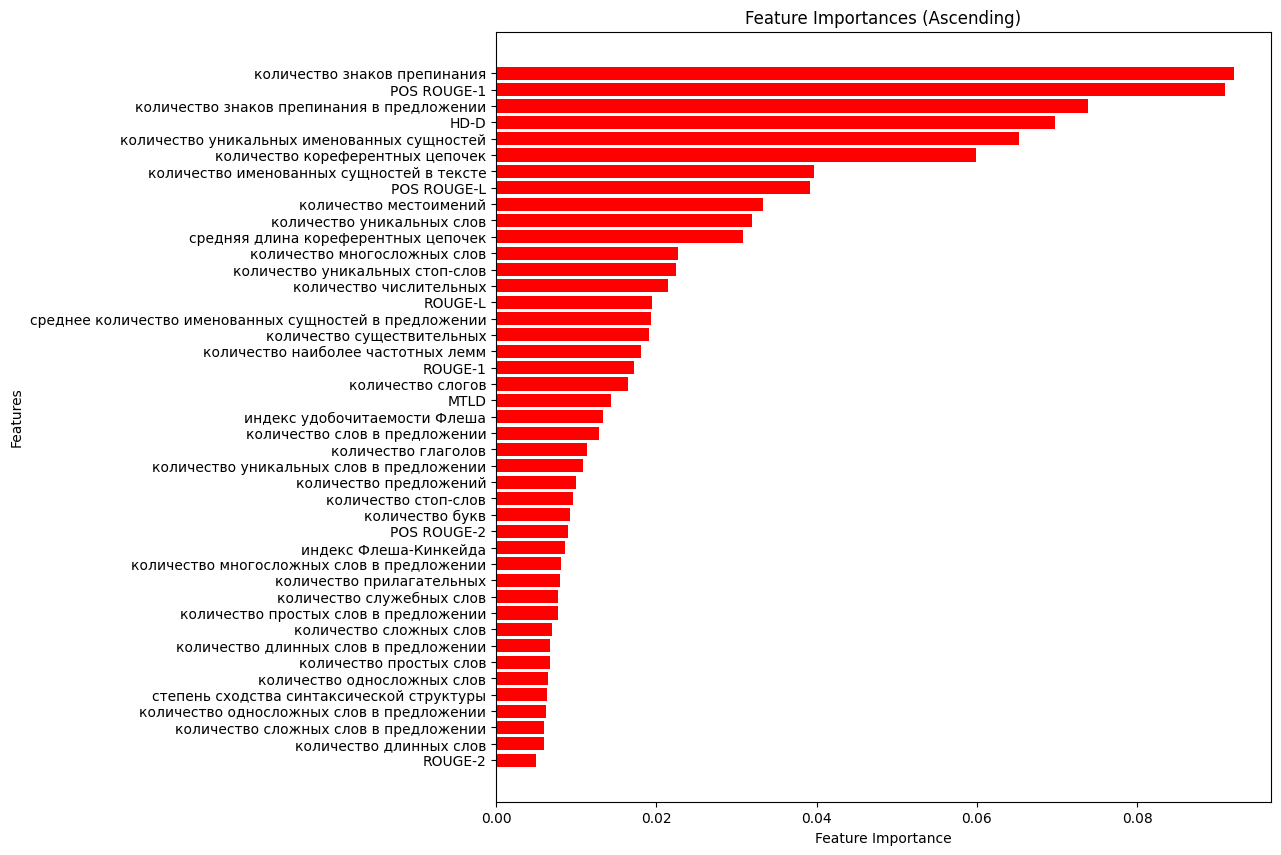

In [149]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

### **Different**

In [185]:
rf_different = RandomForestClassifier(random_state=42)

grid_search_different = GridSearchCV(estimator=rf_different, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [186]:
best_params_different = grid_search_different.best_params_
best_score_different = grid_search_different.best_score_

print(f'These are the best parameters: {best_params_different}')
print(f'This is the best score: {best_score_different}')

These are the best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
This is the best score: 0.9323862928870763


In [188]:
best_different_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)
best_different_rf.fit(X_train_different_scaled, y_train_different)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [189]:
y_pred_different = best_different_rf.predict(X_test_different_scaled)
print("Classification Report:")
print(classification_report(y_test_different, y_pred_different))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       664
           1       0.92      0.95      0.94       832

    accuracy                           0.93      1496
   macro avg       0.93      0.93      0.93      1496
weighted avg       0.93      0.93      0.93      1496



In [190]:
new_different_rf = RandomForestClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=42)
new_different_rf.fit(X_train_different_scaled, y_train_different)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [155]:
y_pred_different = new_different_rf.predict(X_test_different_scaled)
print("Classification Report:")
print(classification_report(y_test_different, y_pred_different))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       664
           1       0.87      0.91      0.89       832

    accuracy                           0.88      1496
   macro avg       0.88      0.87      0.87      1496
weighted avg       0.88      0.88      0.87      1496



In [471]:
best_different_rf.predict(out_df_scaled)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [472]:
explainer_different_rf = shap.Explainer(best_different_rf)
shap_values_different_rf = explainer_different_rf.shap_values(X_test_different_scaled)

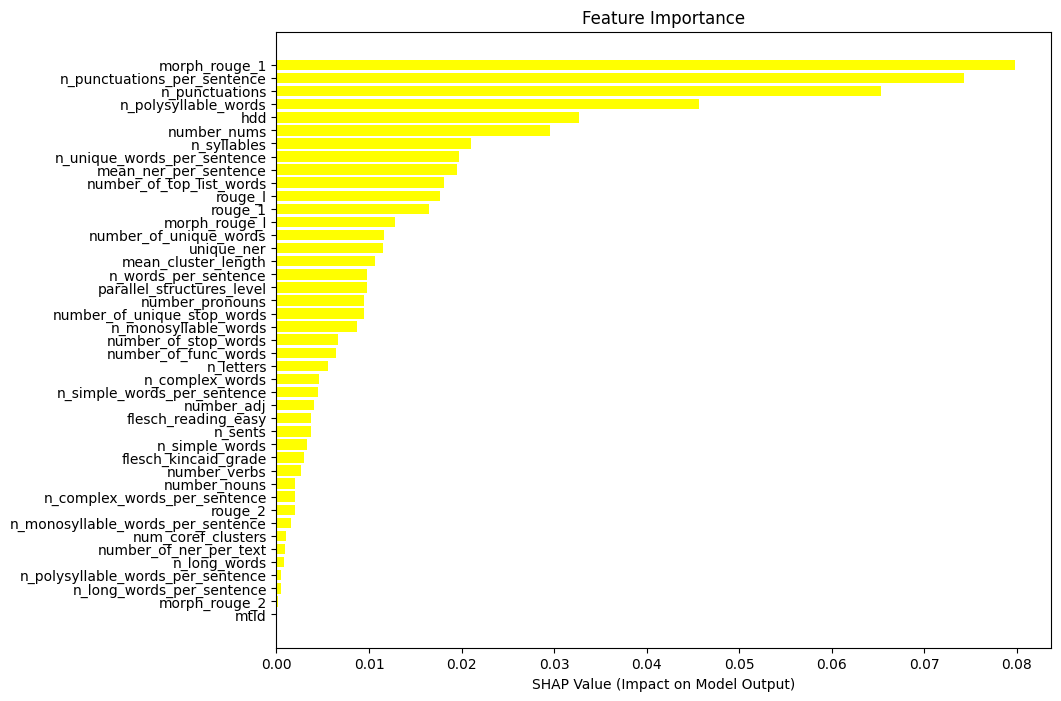

In [473]:
importance_different_df = pd.Series(np.abs(shap_values_different_rf[0]).mean(axis=1), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_different_df.index, importance_different_df.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

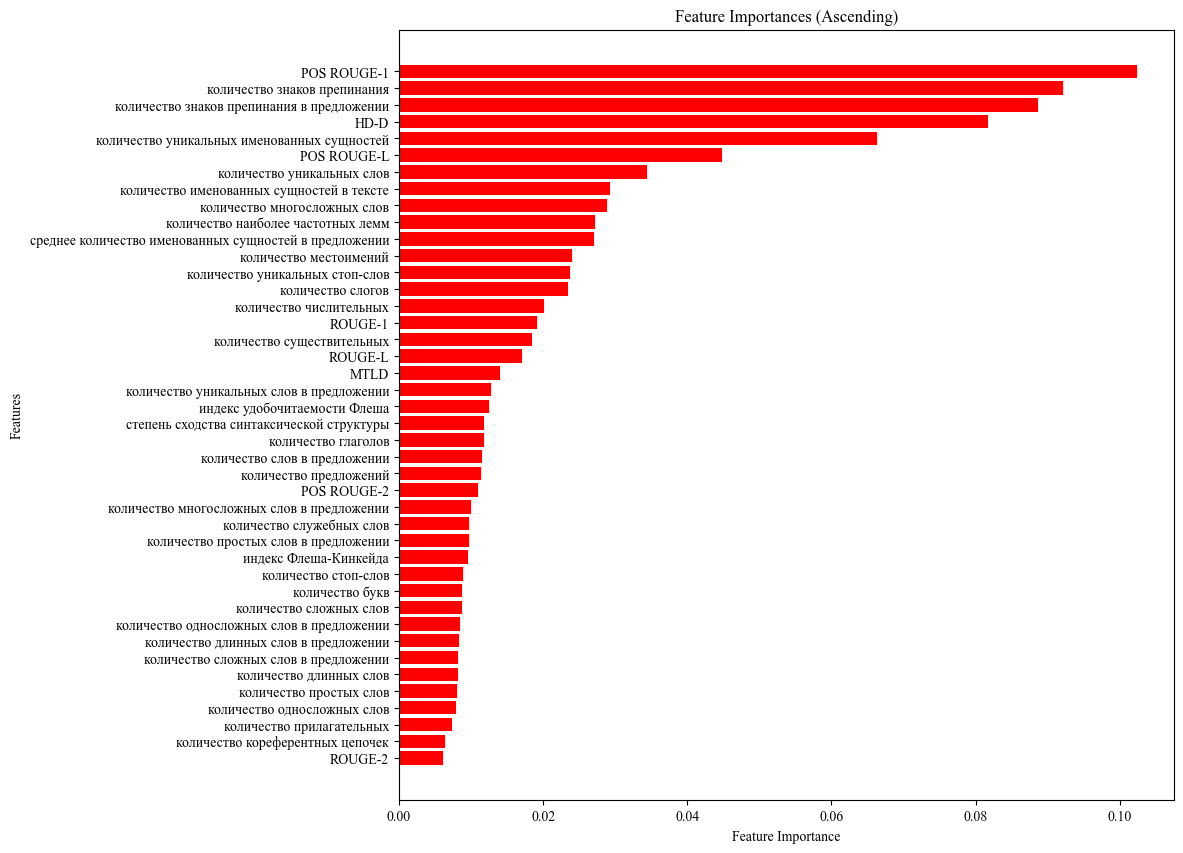

In [191]:
feature_importances_different_rf = best_different_rf.feature_importances_

feature_names_different_rf = list(columns_correspondence.values())

combined = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_different = sorted(combined, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_rf, sorted_feature_importances_different_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

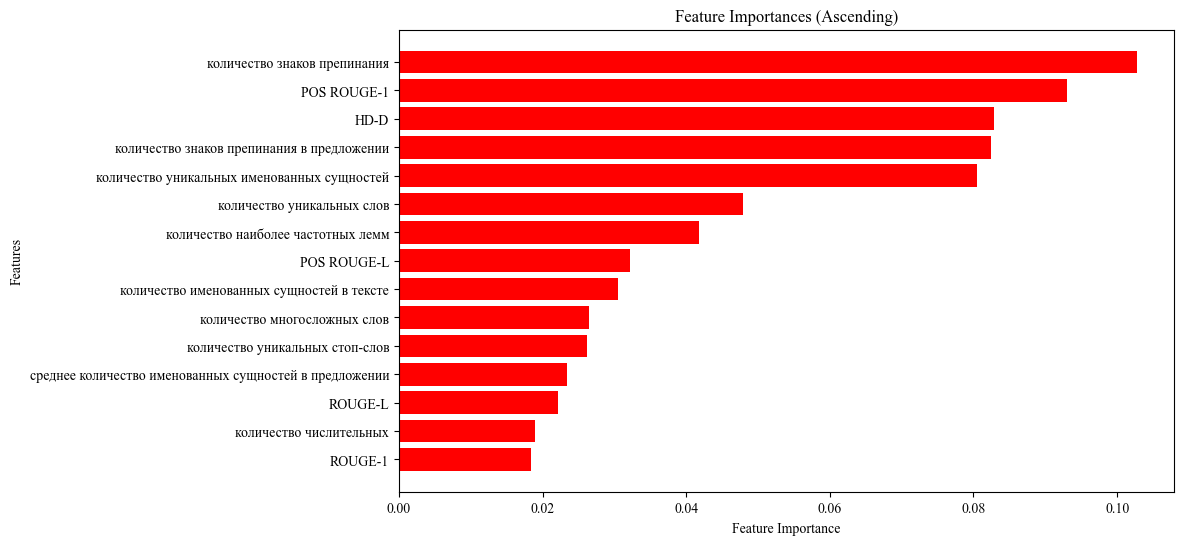

In [192]:
feature_importances_different_rf = best_different_rf.feature_importances_

feature_names_different_rf = list(columns_correspondence.values())

combined_different_rf = zip(feature_names_different_rf, feature_importances_different_rf)

# Sort combined list based on feature importance
sorted_combined_different_rf = sorted(combined_different_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different_rf)

top_10_feature_names_different_rf = sorted_feature_names_different_rf[:15]
top_10_feature_importances_different_rf = sorted_feature_importances_different_rf[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_different_rf, top_10_feature_importances_different_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

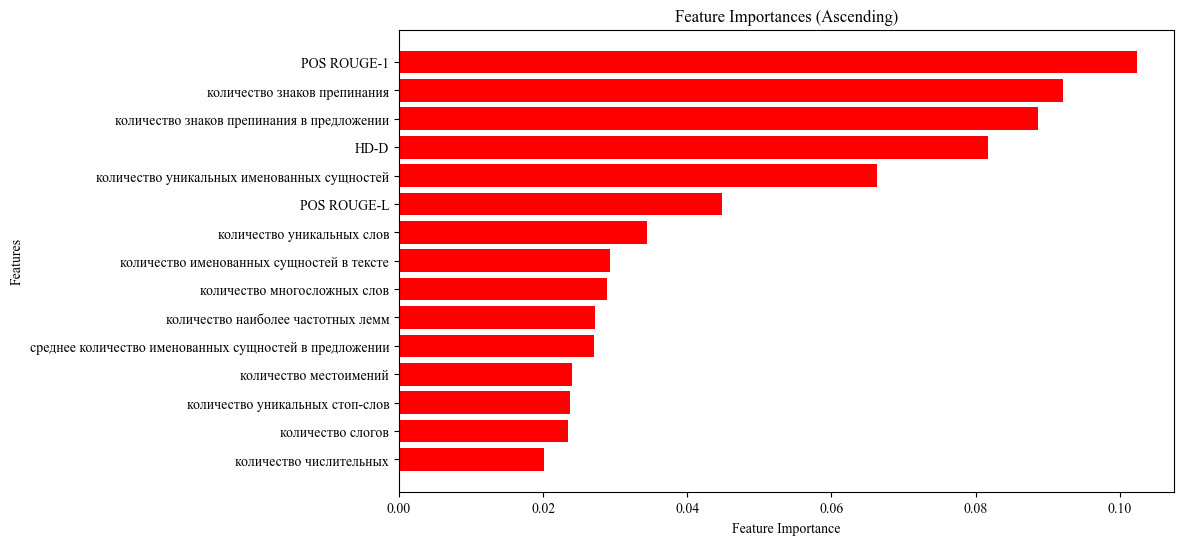

In [193]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Slice the lists to include only the top 15 features
top_10_feature_names_equal_rf = sorted_feature_names_equal_rf[:15]
top_10_feature_importances_equal_rf = sorted_feature_importances_equal_rf[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

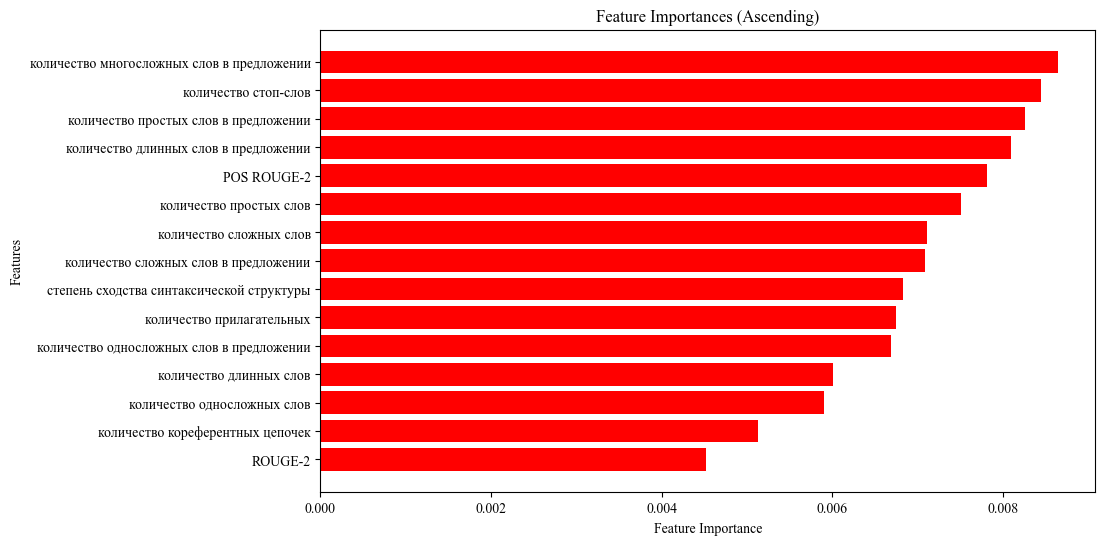

In [194]:
feature_importances_different_rf = best_different_rf.feature_importances_

feature_names_different_rf = list(columns_correspondence.values())

combined_different_rf = zip(feature_names_different_rf, feature_importances_different_rf)

# Sort combined list based on feature importance
sorted_combined_different_rf = sorted(combined_different_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_rf, sorted_feature_importances_different_rf= zip(*sorted_combined_different_rf)

top_10_least_important_feature_names_different_rf = sorted_feature_names_different_rf[-15:]
top_10_least_important_feature_importances_different_rf = sorted_feature_importances_different_rf[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_different_rf, top_10_least_important_feature_importances_different_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

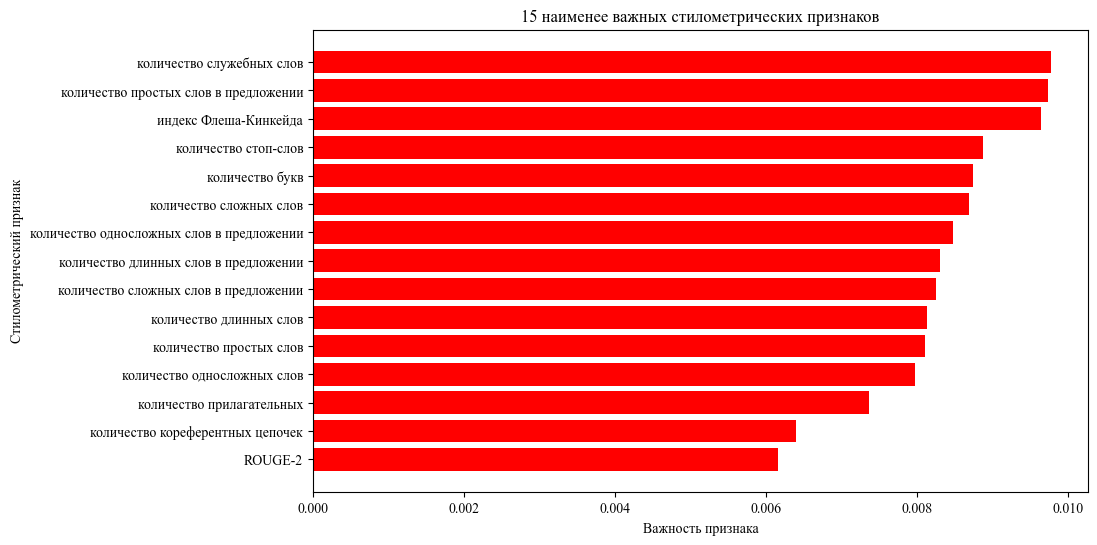

In [195]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Slice the lists to include only the top 10 features
top_10_least_important_feature_names_equal_rf= sorted_feature_names_equal_rf[-15:]
top_10_least_important_feature_importances_equal_rf = sorted_feature_importances_equal_rf[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_equal_rf, top_10_least_important_feature_importances_equal_rf, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Стилометрический признак')
plt.title('15 наименее важных стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

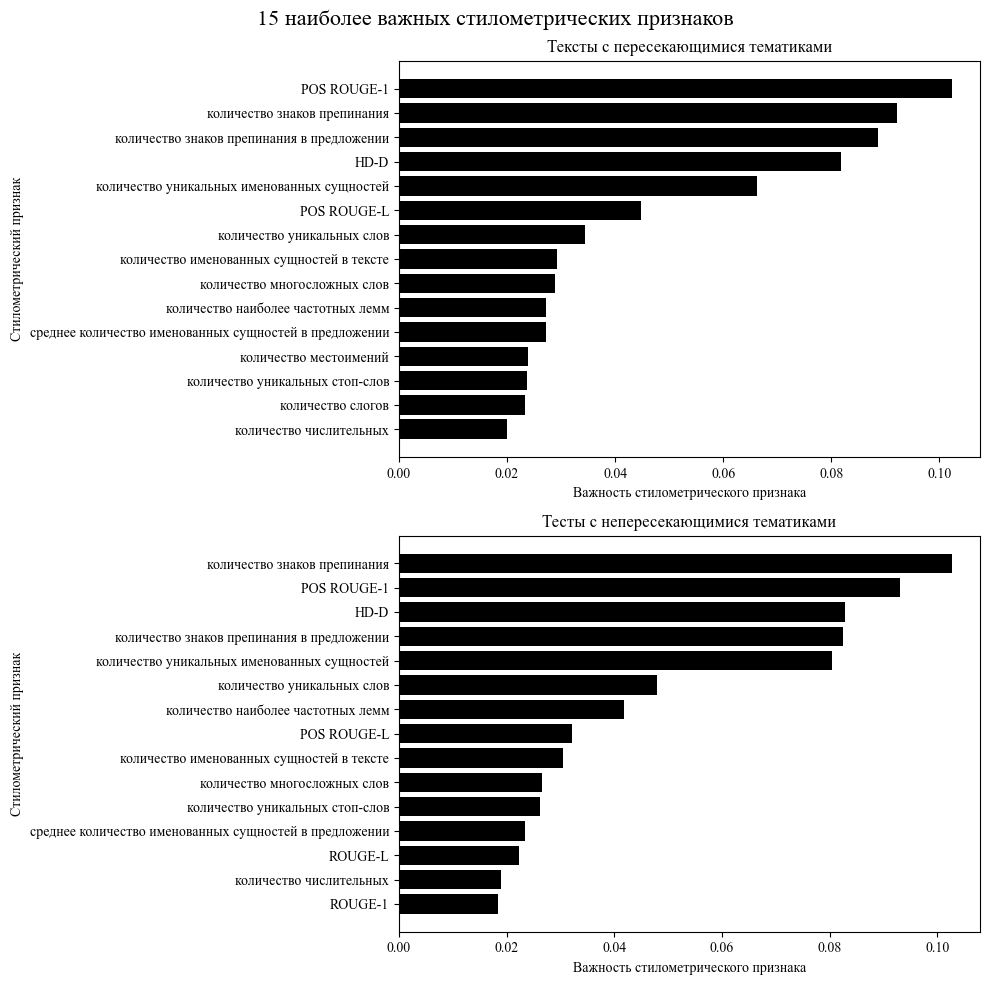

In [196]:
# First subplot for the top 10 important features with equal_rf
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 10))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
plt.barh(top_10_feature_names_different_rf, top_10_feature_importances_different_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тесты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наиболее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

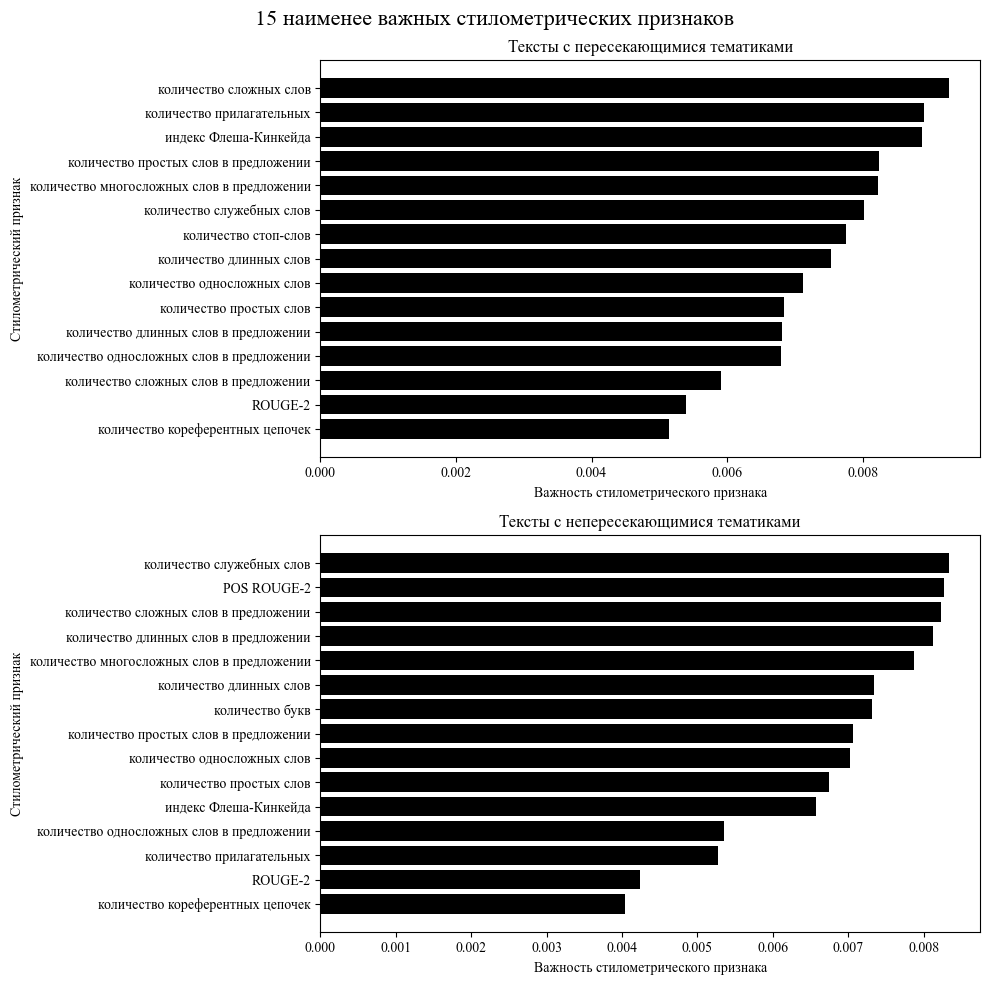

In [519]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 10))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
plt.barh(top_10_least_important_feature_names_equal_rf, top_10_least_important_feature_importances_equal_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
plt.barh(top_10_least_important_feature_names_different_rf, top_10_least_important_feature_importances_different_rf, color='black')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наименее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

### **CatBoost: equal**

In [227]:
catboost_params = {'depth': [4, 6, 8, 10],
                   'learning_rate': [0.01, 0.05, 0.1], 
                   }

In [228]:
catboost_model_equal = CatBoostClassifier(verbose=False)

catboost_grid_equal = GridSearchCV(catboost_model_equal, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x2ddd4cdd0>,
             param_grid={'depth': [4, 6, 8, 10],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [230]:
best_catboost_params_equal = catboost_grid_equal.best_params_
best_catboost_score_equal = catboost_grid_equal.best_score_

print(f'These are the best parameters: {best_catboost_params_equal}')
print(f'This is the best score: {best_catboost_score_equal}')

These are the best parameters: {'depth': 8, 'learning_rate': 0.05}
This is the best score: 0.9448752559562982


In [231]:
catboost_model_equal.set_params(**best_catboost_params_equal)
catboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
catboost_pred_equal = catboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, catboost_pred_equal))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.96      0.96      0.96       977

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



In [232]:
catboost_preds = catboost_model_equal.predict(out_df_scaled)
catboost_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

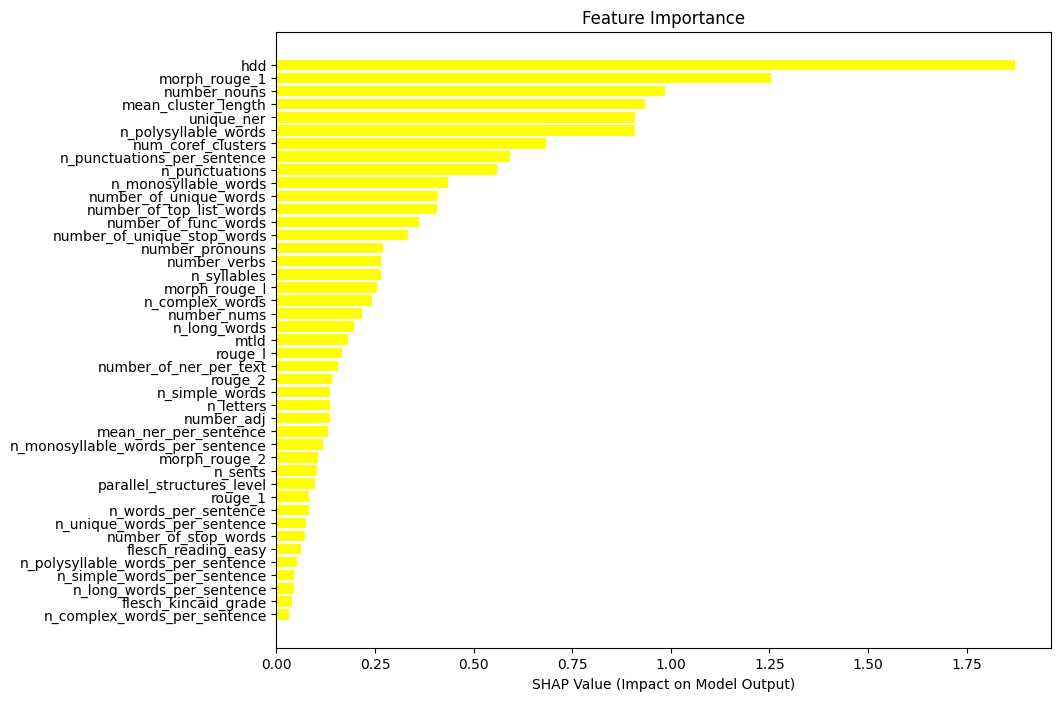

In [233]:
explainer_catboost_equal = shap.Explainer(catboost_model_equal)
shap_values_catboost_equal = explainer_catboost_equal.shap_values(X_test_equal_scaled)

importance_catboost_equal = pd.Series(np.abs(shap_values_catboost_equal).mean(axis=0), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_catboost_equal.index, importance_catboost_equal.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

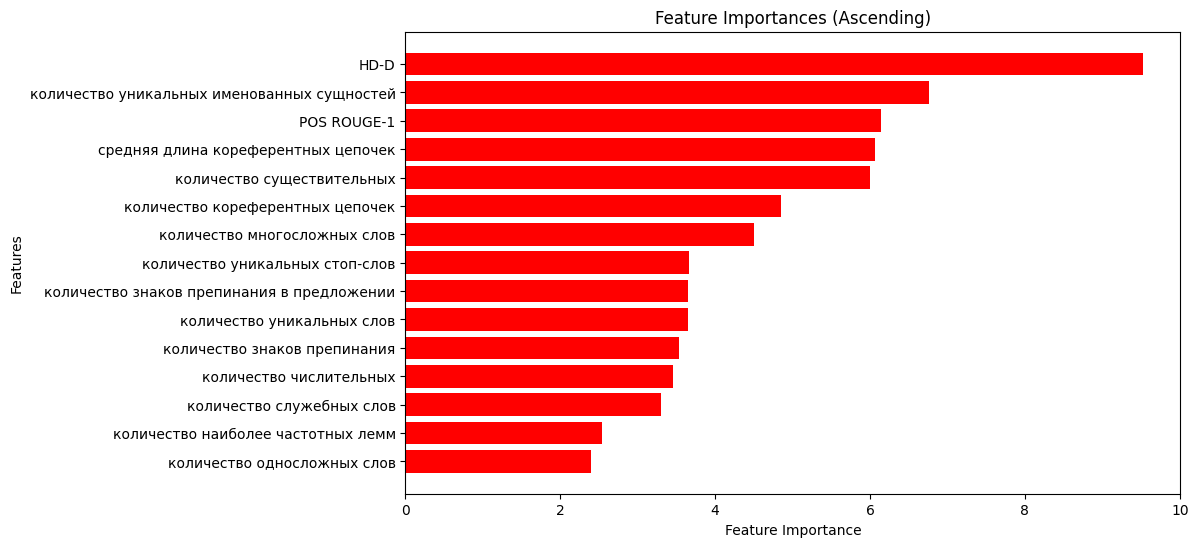

In [234]:
feature_importances_equal_catboost = catboost_model_equal.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_catboost = list(columns_correspondence.values())

combined_equal_catboost = zip(feature_names_equal_catboost, feature_importances_equal_catboost)

# Sort combined list based on feature importance
sorted_combined_equal_catboost = sorted(combined_equal_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost = zip(*sorted_combined_equal_catboost)

# Slice the lists to include only the top 15 features
top_10_feature_names_equal_catboost = sorted_feature_names_equal_catboost[:15]
top_10_feature_importances_equal_catboost = sorted_feature_importances_equal_catboost[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_equal_catboost, top_10_feature_importances_equal_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

In [235]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(catboost_model_equal)

# Calculate SHAP values for a specific example
shap_values = explainer.shap_values(X_test_equal_scaled)

# Choose the example you want to explain (let's say the first example)
example_index = 0

# Visualize the SHAP values for that example
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[example_index], X_test_equal_scaled.iloc[example_index])

### **CatBoost: different**

In [236]:
catboost_model_different = CatBoostClassifier(verbose=False)

catboost_grid_different = GridSearchCV(catboost_model_different, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x308043590>,
             param_grid={'depth': [4, 6, 8, 10],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [237]:
best_catboost_params_different = catboost_grid_different.best_params_
best_catboost_score_different = catboost_grid_different.best_score_

print(f'These are the best parameters: {best_catboost_params_different}')
print(f'This is the best score: {best_catboost_score_different}')

These are the best parameters: {'depth': 4, 'learning_rate': 0.1}
This is the best score: 0.9457105012468885


In [238]:
catboost_model_different.set_params(**best_catboost_params_different)
catboost_model_different.fit(X_train_different_scaled, y_train_different)
catboost_pred_different = catboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, catboost_pred_different))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       664
           1       0.96      0.97      0.96       832

    accuracy                           0.96      1496
   macro avg       0.96      0.96      0.96      1496
weighted avg       0.96      0.96      0.96      1496



In [239]:
catboost_model_different.predict(out_df_scaled)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

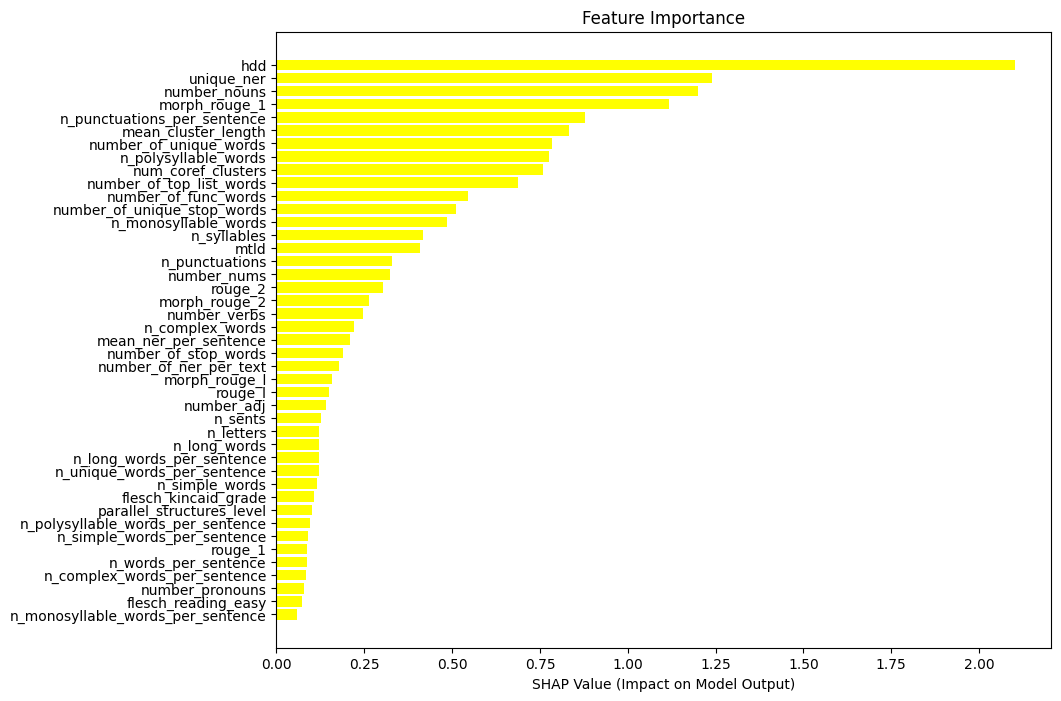

In [240]:
explainer_catboost_different = shap.Explainer(catboost_model_different)
shap_values_catboost_different = explainer_catboost_different.shap_values(X_test_different_scaled)

importance_catboost_different = pd.Series(np.abs(shap_values_catboost_different).mean(axis=0), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_catboost_different.index, importance_catboost_different.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

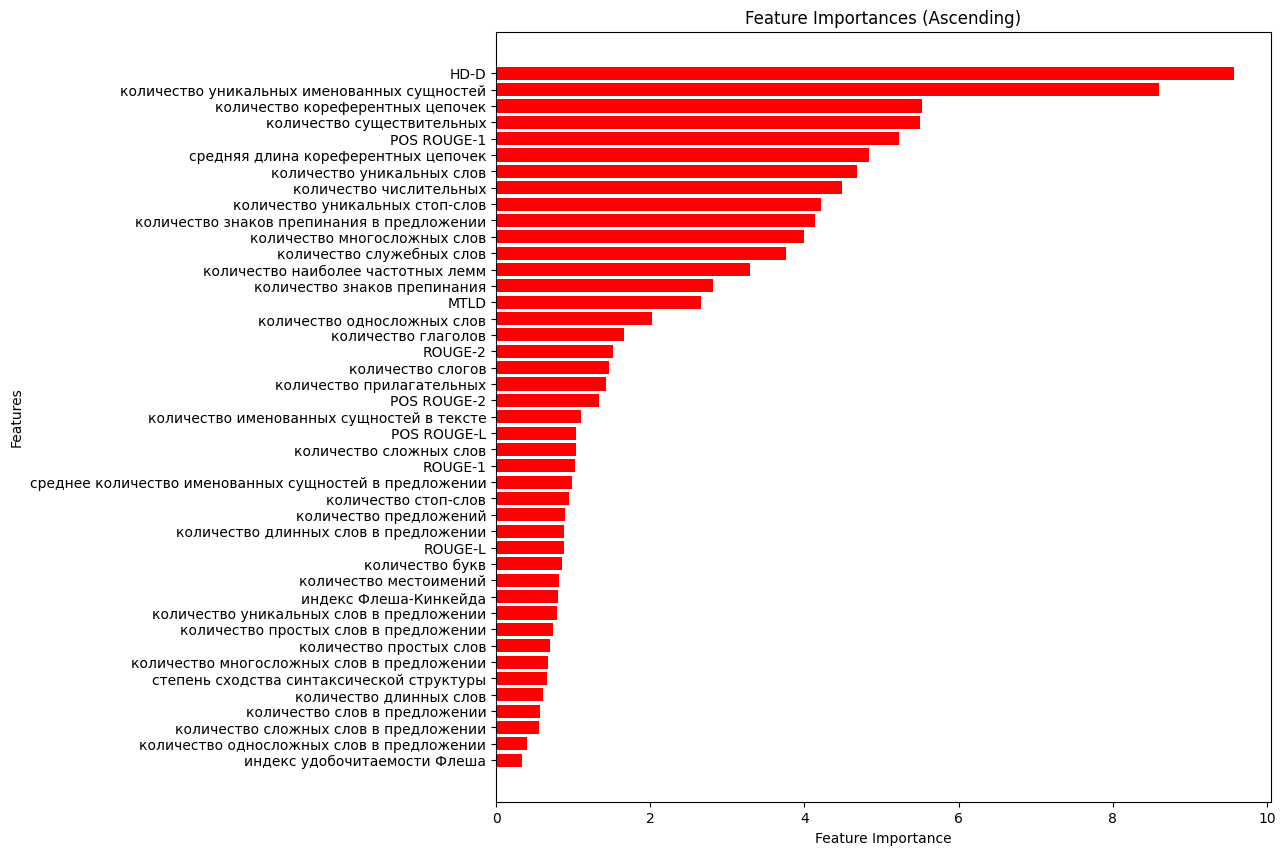

In [241]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

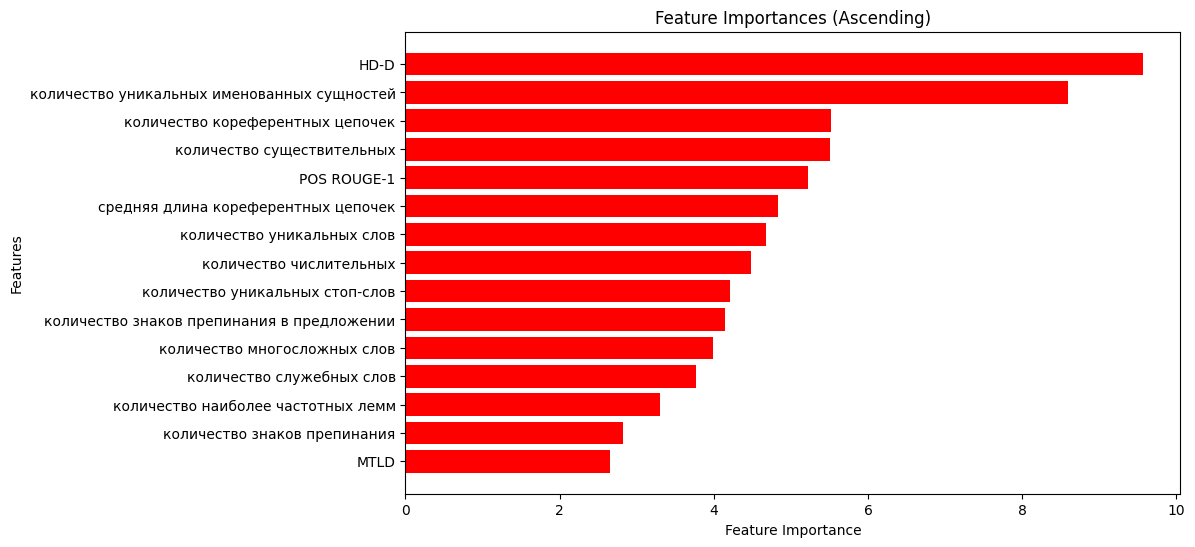

In [242]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

top_10_feature_names_different_catboost = sorted_feature_names_different_catboost[:15]
top_10_feature_importances_different_catboost = sorted_feature_importances_different_catboost[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_different_catboost, top_10_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

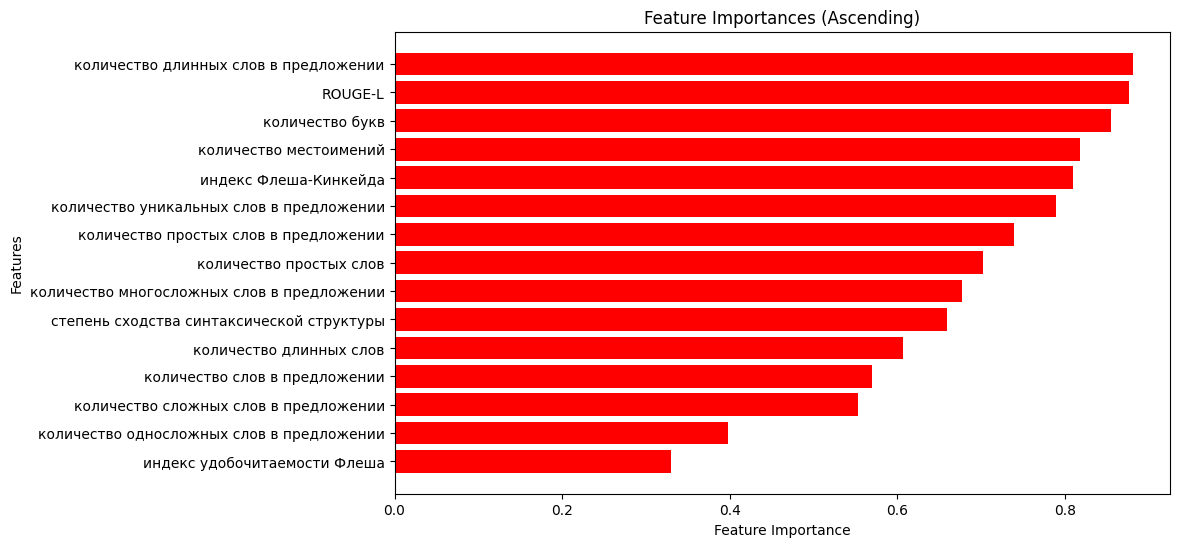

In [243]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

top_10_least_important_feature_names_different_catboost = sorted_feature_names_different_catboost[-15:]
top_10_least_important_feature_importances_different_catboost = sorted_feature_importances_different_catboost[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_different_catboost, top_10_least_important_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

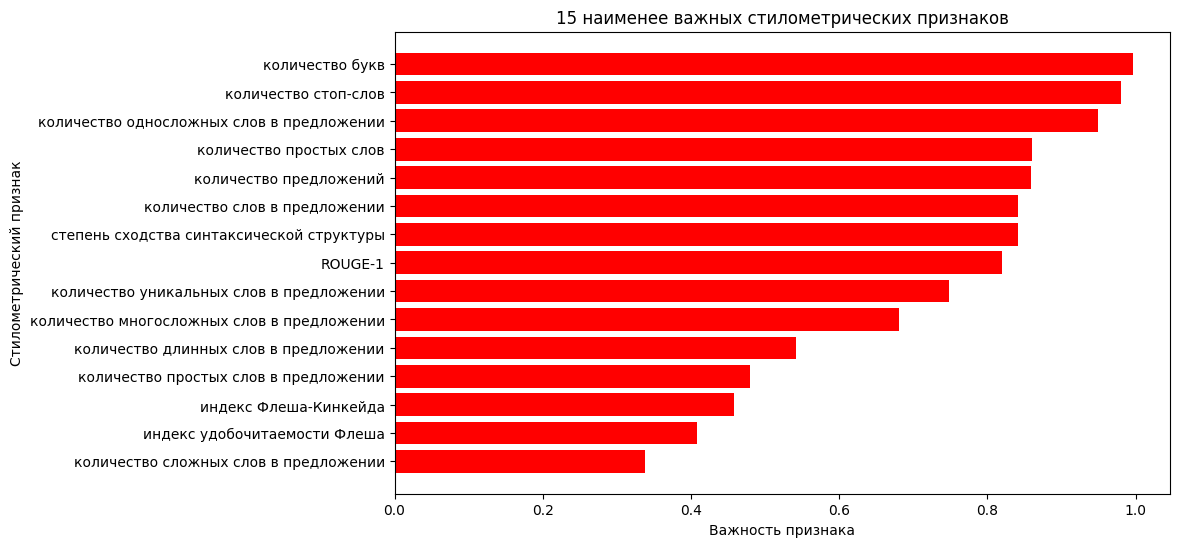

In [244]:
feature_importances_equal_catboost = catboost_model_equal.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_catboost = list(columns_correspondence.values())

combined_equal_catboost = zip(feature_names_equal_catboost, feature_importances_equal_catboost)

# Sort combined list based on feature importance
sorted_combined_equal_catboost = sorted(combined_equal_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost = zip(*sorted_combined_equal_catboost)

# Slice the lists to include only the top 10 features
top_10_least_important_feature_names_equal_catboost = sorted_feature_names_equal_catboost[-15:]
top_10_least_important_feature_importances_equal_catboost = sorted_feature_importances_equal_catboost[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_equal_catboost, top_10_least_important_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Стилометрический признак')
plt.title('15 наименее важных стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

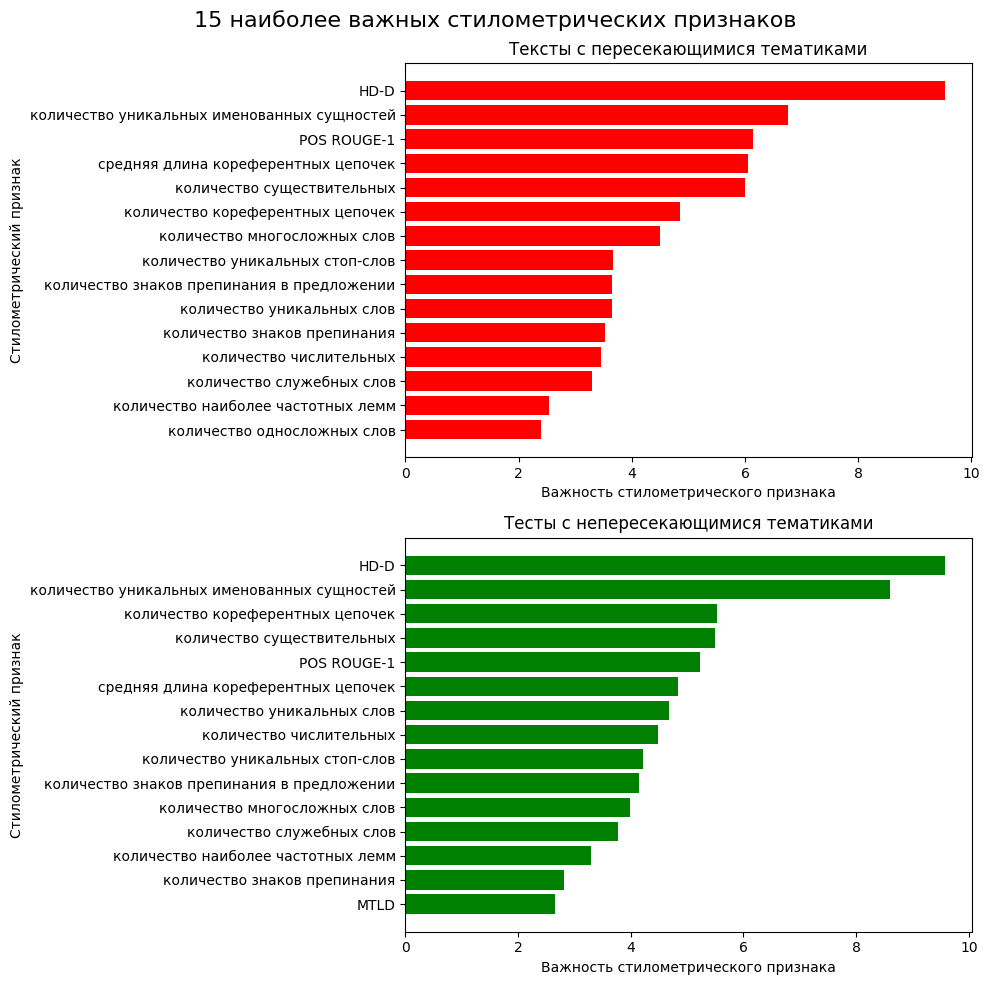

In [245]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 10))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
plt.barh(top_10_feature_names_equal_catboost, top_10_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
plt.barh(top_10_feature_names_different_catboost, top_10_feature_importances_different_catboost, color='green')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тесты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наиболее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

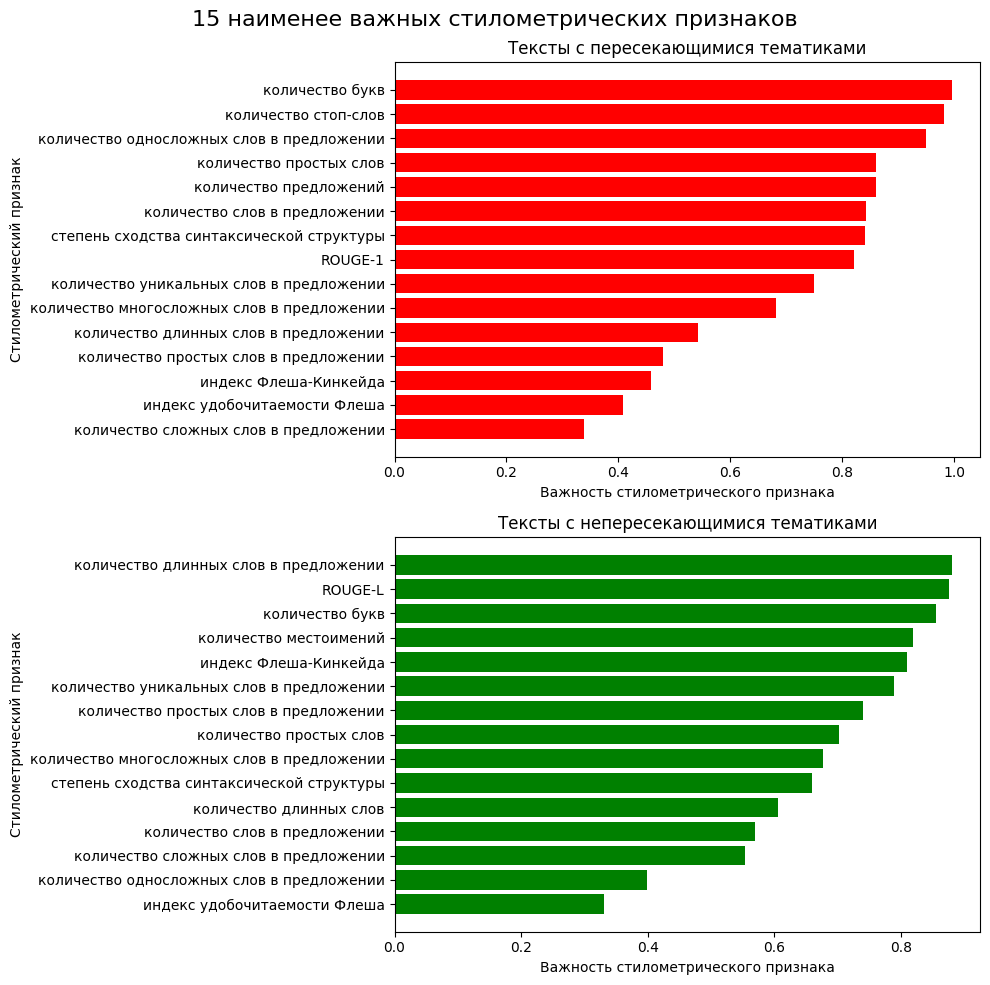

In [246]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(10, 10))

# Subplot for the equal_rf model
plt.subplot(2, 1, 1)
plt.barh(top_10_least_important_feature_names_equal_catboost, top_10_least_important_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(2, 1, 2)
plt.barh(top_10_least_important_feature_names_different_catboost, top_10_least_important_feature_importances_different_catboost, color='green')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Тексты с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наименее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

### **XGBoost Classifier: equal**

In [247]:
xgboost_params = {'max_depth': [4, 6, 8],
                  'learning_rate': [0.01, 0.05, 0.1]}

In [248]:
xgboost_model_equal = XGBClassifier()

xgboost_grid_equal = GridSearchCV(xgboost_model_equal, xgboost_params, cv=3)
xgboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8]})

In [249]:
best_xgboost_params_equal = xgboost_grid_equal.best_params_
best_xgboost_score_equal = xgboost_grid_equal.best_score_

print(f'These are the best parameters: {best_xgboost_params_equal}')
print(f'This is the best score: {best_xgboost_score_equal}')

These are the best parameters: {'learning_rate': 0.1, 'max_depth': 8}
This is the best score: 0.9386144770676124


In [250]:
xgboost_model_equal.set_params(**best_xgboost_params_equal)
xgboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
xgboost_pred_equal = xgboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, xgboost_pred_equal))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.96      0.96      0.96       977

    accuracy                           0.95      1793
   macro avg       0.95      0.95      0.95      1793
weighted avg       0.95      0.95      0.95      1793



In [251]:
xgboost_preds = xgboost_model_equal.predict(out_df_scaled)
xgboost_preds

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

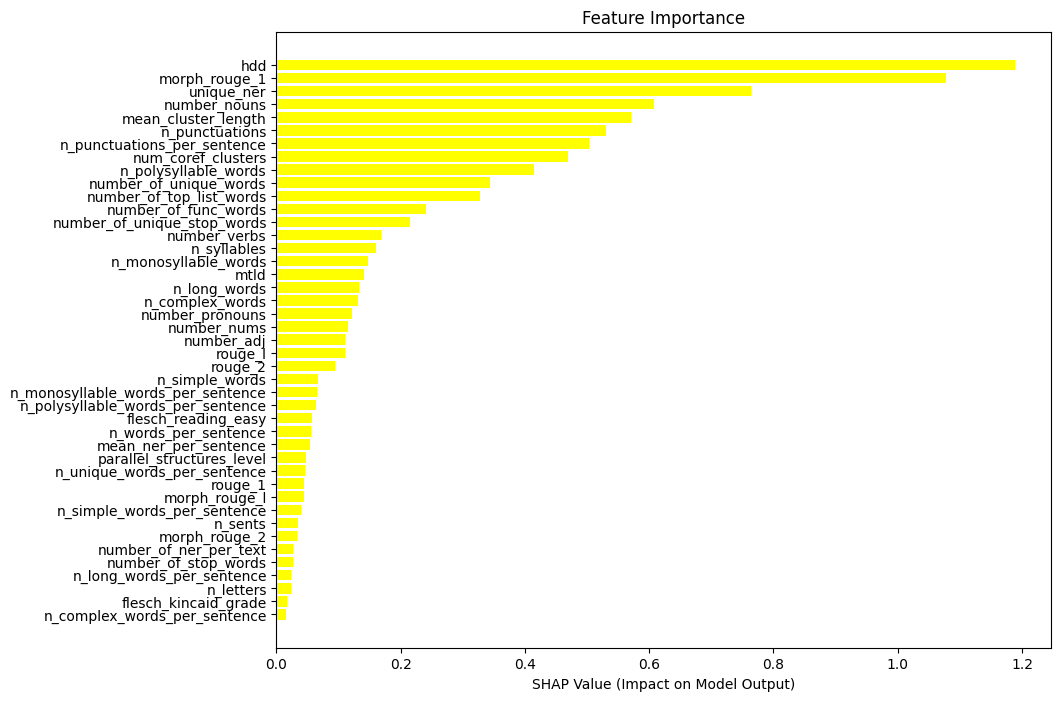

In [252]:
explainer_equal_xgb = shap.Explainer(xgboost_model_equal)
shap_values_equal_xgb = explainer_equal_xgb.shap_values(X_test_equal_scaled)

importance_equal_xgb = pd.Series(np.abs(shap_values_equal_xgb).mean(axis=0), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_equal_xgb.index, importance_equal_xgb.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

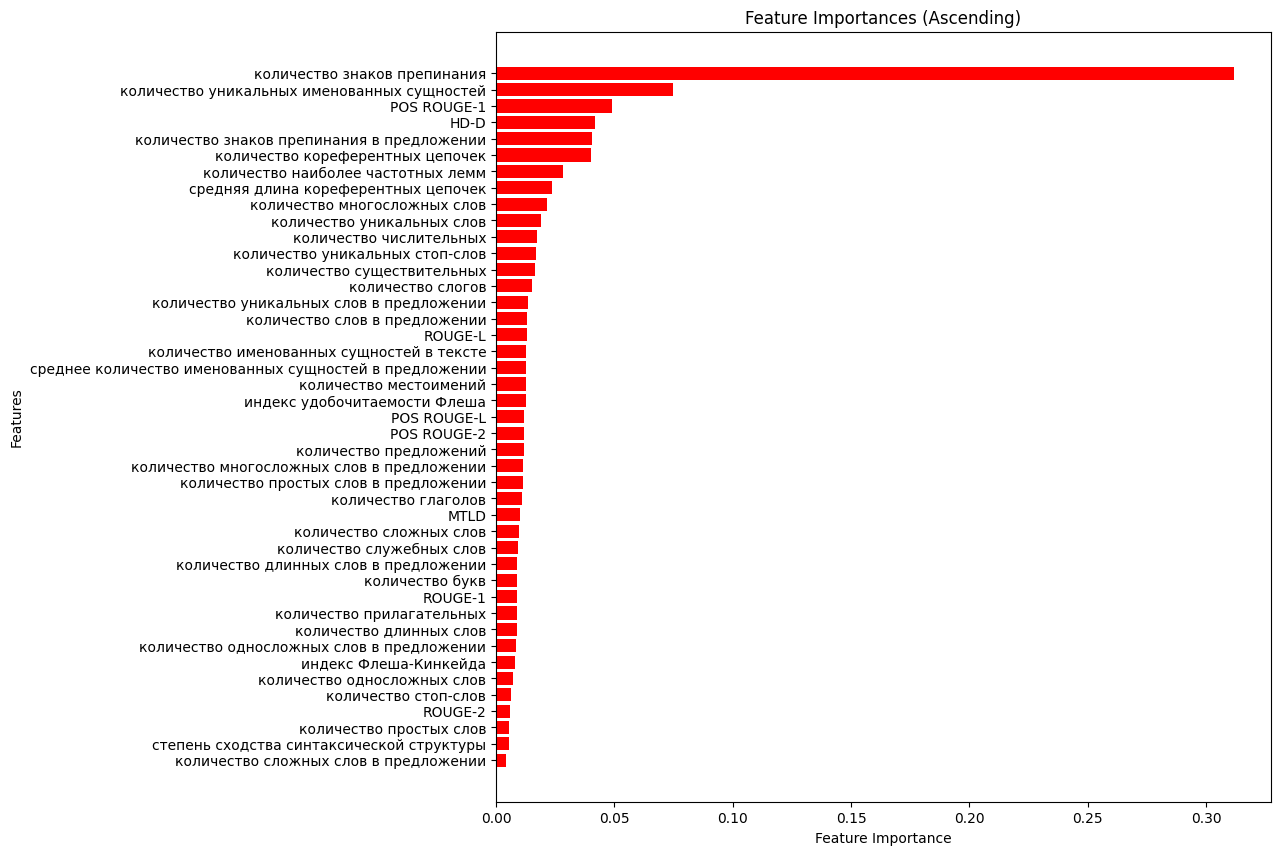

In [253]:
feature_importances_equal_xgb = xgboost_model_equal.feature_importances_

feature_names_equal_xgb =list(columns_correspondence.values())

combined_equal_xgb = zip(feature_names_equal_xgb, feature_importances_equal_xgb)

# Sort combined list based on feature importance
sorted_combined_equal_xgb  = sorted(combined_equal_xgb, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_xgb, sorted_feature_importances_equal_xgb = zip(*sorted_combined_equal_xgb)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_xgb, sorted_feature_importances_equal_xgb, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

### **XGBoost Classifier: different**

In [254]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_val_different_scaled and y_val_different are already defined and preprocessed

# Define the model
xgboost_model_different = XGBClassifier()

# Define the parameter grid to include lambda, alpha, and gamma for regularization
xgboost_params = {
    'lambda': [1, 1.5, 2],  # L2 regularization term on weights
    'alpha': [0, 0.5, 1],   # L1 regularization term on weights
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction required to make a further partition
    # You can add other parameters here as well, such as 'max_depth', 'min_child_weight', etc.
}

# Perform grid search
xgboost_grid_different = GridSearchCV(xgboost_model_different, xgboost_params, cv=3, scoring='f1_macro')
xgboost_grid_different.fit(X_val_different_scaled, y_val_different)

# After fitting, you can find the best parameters and the best score like this:
print("Best parameters:", xgboost_grid_different.best_params_)
print("Best score:", xgboost_grid_different.best_score_)

Best parameters: {'alpha': 0, 'gamma': 0.1, 'lambda': 1.5}
Best score: 0.9437932572636573


In [255]:
xgboost_preds = xgboost_grid_different.predict(out_df_scaled)
xgboost_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [256]:
xgboost_model_different = XGBClassifier()

xgboost_grid_different = GridSearchCV(xgboost_model_different, xgboost_params, cv=3)
xgboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 0.5, 1], 'gamma': [0, 0.1, 0.3],
                         'lambda': [1, 1.5, 2]})

In [257]:
best_xgboost_params_different = xgboost_grid_different.best_params_
best_xgboost_score_different = xgboost_grid_different.best_score_

print(f'These are the best parameters: {best_xgboost_params_different}')
print(f'This is the best score: {best_xgboost_score_different}')

These are the best parameters: {'alpha': 0, 'gamma': 0.1, 'lambda': 1.5}
This is the best score: 0.9445262680649117


In [258]:
xgboost_model_different.set_params(**best_xgboost_params_different)
xgboost_model_different.fit(X_train_different_scaled, y_train_different)
xgboost_pred_different = xgboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, xgboost_pred_different))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       664
           1       0.96      0.96      0.96       832

    accuracy                           0.96      1496
   macro avg       0.95      0.96      0.96      1496
weighted avg       0.96      0.96      0.96      1496



In [259]:
xgboost_preds = xgboost_model_different.predict(out_df_scaled)
xgboost_preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

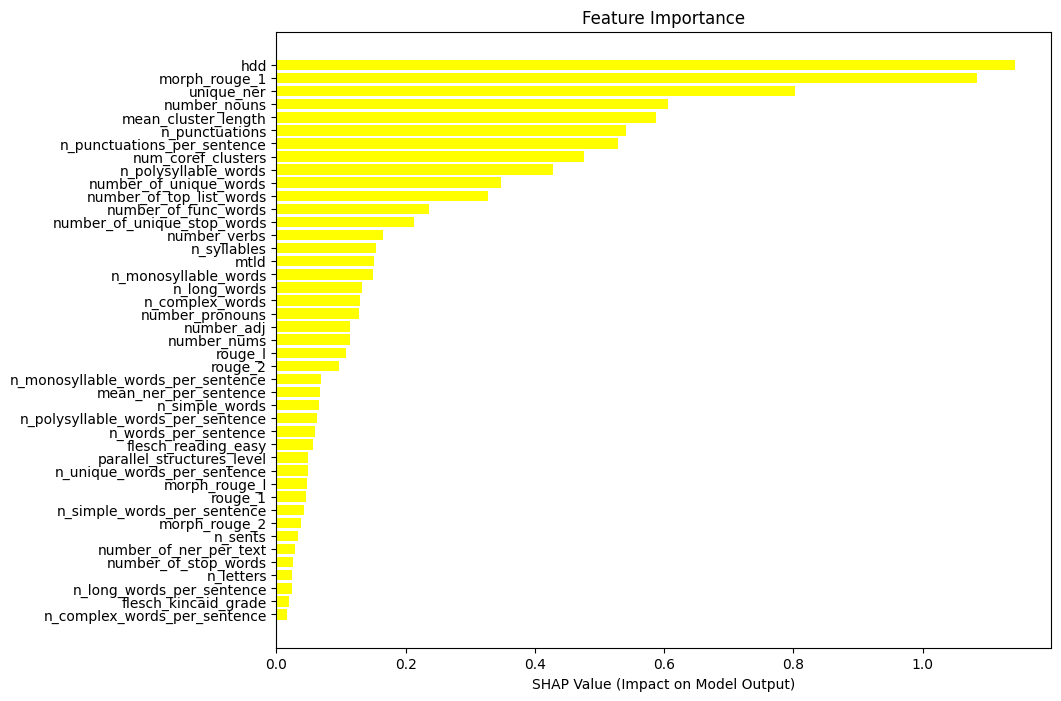

In [260]:
explainer_different_xgb = shap.Explainer(xgboost_model_different)
shap_values_different_xgb = explainer_equal_xgb.shap_values(X_test_different_scaled)

importance_different_xgb = pd.Series(np.abs(shap_values_different_xgb).mean(axis=0), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_different_xgb.index, importance_different_xgb.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

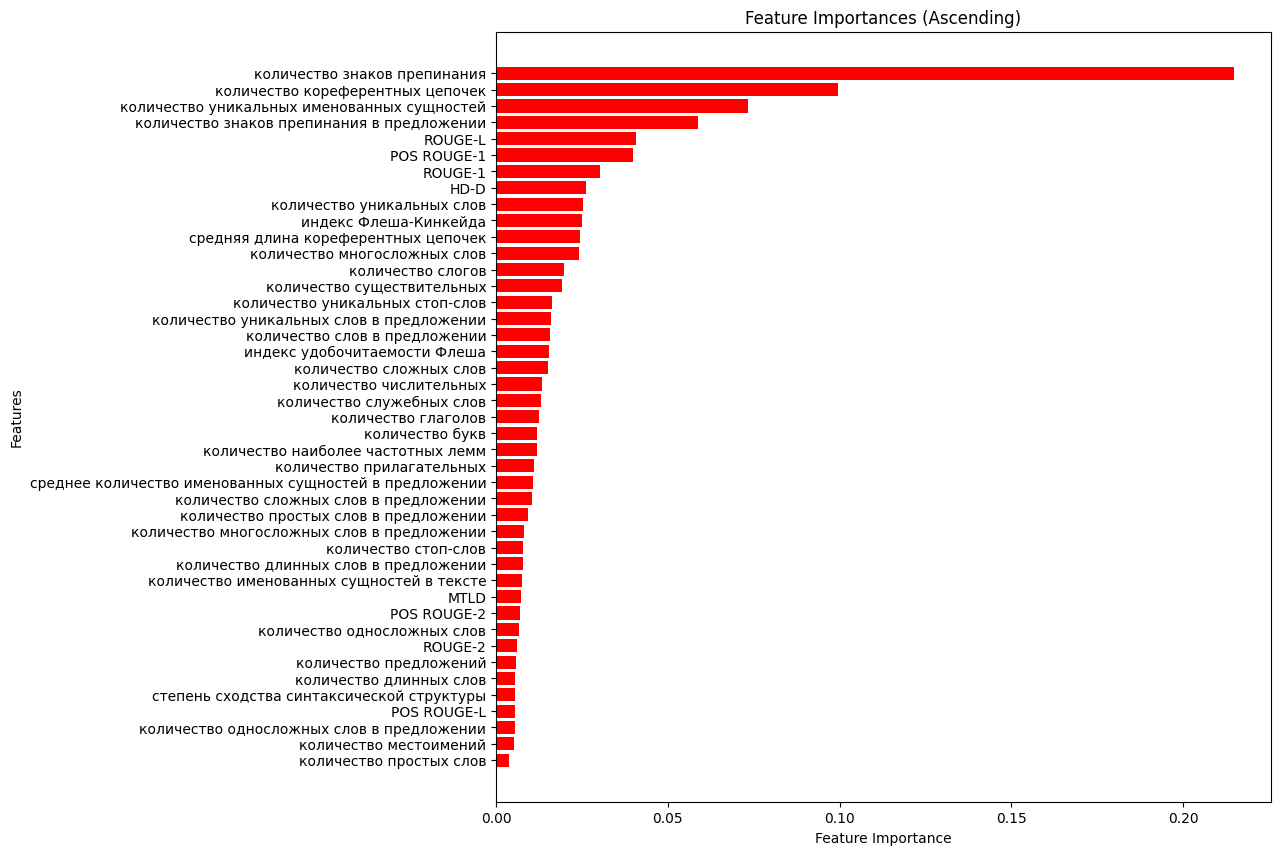

In [261]:
feature_importances_different_xgb = xgboost_model_different.feature_importances_

feature_names_different_xgb = list(columns_correspondence.values())

combined_different_xgb = zip(feature_names_different_xgb, feature_importances_different_xgb)

# Sort combined list based on feature importance
sorted_combined_different_xgb  = sorted(combined_different_xgb, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_xgb, sorted_feature_importances_different_xgb = zip(*sorted_combined_different_xgb)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_xgb, sorted_feature_importances_different_xgb, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()